In [1]:
#=======================================
## Tree-like neural network - Concrete
#=======================================

#----------------------------------------
# Set random seed for reproducibility.

seed = 543
from numpy import random
random.seed(seed)
from tensorflow import set_random_seed
set_random_seed(seed)

# Import classes and functions.

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model, load_model
from keras.layers import Input, Dense, concatenate, Dropout


C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#----------------------------------------
# Load the Concrete dataset.

dataset = np.loadtxt("CONCRETE-Training-Data.txt")

print(type(dataset))

print(dataset.shape)

x_group = [[7], [0], [7], [3], [0], [0], [3]]

X = dataset[:, 0:8]
Y = dataset[:, 8]

print(X.shape)
print(Y.shape)

X1 = dataset[:, x_group[0]]
X2 = dataset[:, x_group[1]]
X3 = dataset[:, x_group[2]]
X4 = dataset[:, x_group[3]]
X5 = dataset[:, x_group[4]]
X6 = dataset[:, x_group[5]]
X7 = dataset[:, x_group[6]]
Y = dataset[:, 8]

print(X1.shape)
print(X2.shape)
print(X3.shape)
print(X4.shape)
print(X5.shape)
print(X6.shape)
print(X7.shape)
print(Y.shape)


<class 'numpy.ndarray'>
(1030, 9)
(1030, 8)
(1030,)
(1030, 1)
(1030, 1)
(1030, 1)
(1030, 1)
(1030, 1)
(1030, 1)
(1030, 1)
(1030,)


In [3]:
#----------------------------------------
# Standardize the input and output data.

X_sample_mean = np.mean(X, axis = 0)
print(np.round(X_sample_mean, 4))

X_sample_std = np.std(X, axis = 0, ddof = 1)
print(np.round(X_sample_std, 4))

X1_sample_mean = X_sample_mean[x_group[0]]
print(np.round(X1_sample_mean, 4))

X1_sample_std = X_sample_std[x_group[0]]
print(np.round(X1_sample_std, 4))

X2_sample_mean = X_sample_mean[x_group[1]]
print(np.round(X2_sample_mean, 4))

X2_sample_std = X_sample_std[x_group[1]]
print(np.round(X2_sample_std, 4))

X3_sample_mean = X_sample_mean[x_group[2]]
print(np.round(X3_sample_mean, 4))

X3_sample_std = X_sample_std[x_group[2]]
print(np.round(X3_sample_std, 4))

X4_sample_mean = X_sample_mean[x_group[3]]
print(np.round(X4_sample_mean, 4))

X4_sample_std = X_sample_std[x_group[3]]
print(np.round(X4_sample_std, 4))

X5_sample_mean = X_sample_mean[x_group[4]]
print(np.round(X5_sample_mean, 4))

X5_sample_std = X_sample_std[x_group[4]]
print(np.round(X5_sample_std, 4))

X6_sample_mean = X_sample_mean[x_group[5]]
print(np.round(X6_sample_mean, 4))

X6_sample_std = X_sample_std[x_group[5]]
print(np.round(X6_sample_std, 4))

X7_sample_mean = X_sample_mean[x_group[6]]
print(np.round(X7_sample_mean, 4))

X7_sample_std = X_sample_std[x_group[6]]
print(np.round(X7_sample_std, 4))

Y_sample_mean = np.mean(Y, axis = 0)
print(np.round(Y_sample_mean, 4))

Y_sample_std = np.std(Y, axis = 0, ddof = 1)
print(np.round(Y_sample_std, 4))

standardize = lambda x: (x - np.mean(x, axis = 0)) / np.std(x, axis = 0, ddof = 1)

X_train = standardize(X)

X1_train = X_train[:, x_group[0]]
X2_train = X_train[:, x_group[1]]
X3_train = X_train[:, x_group[2]]
X4_train = X_train[:, x_group[3]]
X5_train = X_train[:, x_group[4]]
X6_train = X_train[:, x_group[5]]
X7_train = X_train[:, x_group[6]]

print(np.round(np.mean(X1_train, axis = 0), 4))
print(np.round(np.std(X1_train, axis = 0, ddof = 1), 4))

print(np.round(np.mean(X2_train, axis = 0), 4))
print(np.round(np.std(X2_train, axis = 0, ddof = 1), 4))

print(np.round(np.mean(X3_train, axis = 0), 4))
print(np.round(np.std(X3_train, axis = 0, ddof = 1), 4))

print(np.round(np.mean(X4_train, axis = 0), 4))
print(np.round(np.std(X4_train, axis = 0, ddof = 1), 4))

print(np.round(np.mean(X5_train, axis = 0), 4))
print(np.round(np.std(X5_train, axis = 0, ddof = 1), 4))

print(np.round(np.mean(X6_train, axis = 0), 4))
print(np.round(np.std(X6_train, axis = 0, ddof = 1), 4))

print(np.round(np.mean(X7_train, axis = 0), 4))
print(np.round(np.std(X7_train, axis = 0, ddof = 1), 4))

Y_train = standardize(Y)

print(np.round(np.mean(Y_train, axis = 0), 4))
print(np.round(np.std(Y_train, axis = 0, ddof = 1), 4))


[281.1679  73.8958  54.1883 181.5673   6.2047 972.9189 773.5805  45.6621]
[104.5064  86.2793  63.997   21.3542   5.9738  77.754   80.176   63.1699]
[45.6621]
[63.1699]
[281.1679]
[104.5064]
[45.6621]
[63.1699]
[181.5673]
[21.3542]
[281.1679]
[104.5064]
[281.1679]
[104.5064]
[181.5673]
[21.3542]
35.818
16.7057
[0.]
[1.]
[0.]
[1.]
[0.]
[1.]
[0.]
[1.]
[0.]
[1.]
[0.]
[1.]
[0.]
[1.]
0.0
1.0


In [4]:
#----------------------------------------
# Define 10-fold cross validation test index sets.

fold_num = 10

L = len(X_train)

quotient = L // fold_num
remainder = L % fold_num

fold_length = np.array([quotient]*fold_num)
if remainder > 0:
    fold_length[0:remainder] = fold_length[0:remainder] + 1

index_begin = np.zeros(fold_num, dtype = int)
index_begin[0] = 0

for j in range(1, fold_num):
    index_begin[j] = index_begin[j-1] + fold_length[j-1]

index = np.random.choice(np.arange(L), size = L, replace = False)


In [5]:
#----------------------------------------
# 10-fold cross validation

cv_mse = []
cv_mae = []

for k in range(fold_num):
    input_g1 = Input(shape = (1,))
    x1 = input_g1
    t1 = Dense(units = 3, kernel_initializer = "uniform", activation = "relu")(x1)
    t1 = Dropout(rate = 0.1)(t1)
    #
    y11 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t1)
    y12 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t1)
    #
    input_g2 = Input(shape = (1,))
    x2 = concatenate([y11, input_g2], axis = 1)  # column bind
    t2 = Dense(units = 4, kernel_initializer = "uniform", activation = "relu")(x2)
    t2 = Dropout(rate = 0.1)(t2)
    #
    y21 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t2)
    y22 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t2)
    #
    input_g3 = Input(shape = (1,))
    x3 = concatenate([y21, input_g3], axis = 1)  # column bind
    t3 = Dense(units = 4, kernel_initializer = "uniform", activation = "relu")(x3)
    t3 = Dropout(rate = 0.1)(t3)
    #
    y31 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t3)
    y32 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t3)
    #
    input_g6 = Input(shape = (1,))
    x6 = concatenate([y22, input_g6], axis = 1)  # column bind
    t6 = Dense(units = 5, kernel_initializer = "uniform", activation = "relu")(x6)
    t6 = Dropout(rate = 0.1)(t6)
    #
    y61 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t6)
    y62 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t6)
    #
    input_g9 = Input(shape = (1,))
    x9 = concatenate([y12, input_g9], axis = 1)  # column bind
    t9 = Dense(units = 5, kernel_initializer = "uniform", activation = "linear")(x9)
    t9 = Dropout(rate = 0.1)(t9)
    #
    y91 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t9)
    y92 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t9)
    #
    input_g10 = Input(shape = (1,))
    x10 = concatenate([y91, input_g10], axis = 1)  # column bind
    t10 = Dense(units = 4, kernel_initializer = "uniform", activation = "relu")(x10)
    t10 = Dropout(rate = 0.1)(t10)
    #
    y101 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t10)
    y102 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t10)
    #
    input_g13 = Input(shape = (1,))
    x13 = concatenate([y92, input_g13], axis = 1)  # column bind
    t13 = Dense(units = 4, kernel_initializer = "uniform", activation = "relu")(x13)
    t13 = Dropout(rate = 0.1)(t13)
    #
    y131 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t13)
    y132 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t13)
    #
    x_final =  concatenate([y31, y32, y61, y62, y101, y102, y131, y132], axis = 1)  # column bind
    y_final = Dense(units = 6, kernel_initializer = "uniform", activation = "relu")(x_final)
    y_final = Dropout(rate = 0.1)(y_final)
    y_final = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(y_final)
    response = y_final
    #
    model = Model(inputs = [input_g1, input_g2, input_g3, input_g6, input_g9, input_g10, input_g13], outputs = response)
    # Compile the model.
    model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])
    # Select index sets.
    seq_index = range(index_begin[k], (index_begin[k] + fold_length[k]))
    test_index = index[seq_index]
    train_index = np.delete(index, seq_index)
    # Fit the model.
    history = model.fit([X1_train[train_index], X2_train[train_index], X3_train[train_index]
    , X4_train[train_index], X5_train[train_index], X6_train[train_index]
    , X7_train[train_index]], Y_train[train_index], validation_split = 0.2, epochs = 1000, batch_size = 20, verbose = 1)
    # Evaluate the model.
    scores = model.evaluate([X1_train[test_index], X2_train[test_index], X3_train[test_index]
    , X4_train[test_index], X5_train[test_index], X6_train[test_index], X7_train[test_index]]
    , Y_train[test_index], verbose = 1)
    print("%s: %.4f" % (model.metrics_names[0], scores[0]))
    print("%s: %.4f" % (model.metrics_names[1], scores[1]))
    cv_mse.append(scores[0])
    cv_mae.append(scores[1])


Train on 741 samples, validate on 186 samples
Epoch 1/1000
741/741 [==============================] - 1s 1ms/step - loss: 0.9752 - mean_absolute_error: 0.7897 - val_loss: 1.1710 - val_mean_absolute_error: 0.9073
Epoch 2/1000
741/741 [==============================] - 0s 97us/step - loss: 0.9747 - mean_absolute_error: 0.7897 - val_loss: 1.1709 - val_mean_absolute_error: 0.9074
Epoch 3/1000
741/741 [==============================] - 0s 98us/step - loss: 0.9724 - mean_absolute_error: 0.7895 - val_loss: 1.1707 - val_mean_absolute_error: 0.9087
Epoch 4/1000
741/741 [==============================] - 0s 96us/step - loss: 0.9535 - mean_absolute_error: 0.7821 - val_loss: 1.1409 - val_mean_absolute_error: 0.8983
Epoch 5/1000
741/741 [==============================] - 0s 101us/step - loss: 0.8889 - mean_absolute_error: 0.7582 - val_loss: 1.0719 - val_mean_absolute_error: 0.8774
Epoch 6/1000
741/741 [==============================] - 0s 100us/step - loss: 0.7807 - mean_absolute_error: 0.7174 - va

741/741 [==============================] - 0s 127us/step - loss: 0.3902 - mean_absolute_error: 0.5006 - val_loss: 0.4086 - val_mean_absolute_error: 0.5407
Epoch 50/1000
741/741 [==============================] - 0s 131us/step - loss: 0.3846 - mean_absolute_error: 0.5013 - val_loss: 0.4132 - val_mean_absolute_error: 0.5422
Epoch 51/1000
741/741 [==============================] - 0s 120us/step - loss: 0.3702 - mean_absolute_error: 0.4901 - val_loss: 0.4069 - val_mean_absolute_error: 0.5385
Epoch 52/1000
741/741 [==============================] - 0s 101us/step - loss: 0.3742 - mean_absolute_error: 0.4960 - val_loss: 0.4154 - val_mean_absolute_error: 0.5430
Epoch 53/1000
741/741 [==============================] - 0s 100us/step - loss: 0.3930 - mean_absolute_error: 0.5060 - val_loss: 0.4088 - val_mean_absolute_error: 0.5396
Epoch 54/1000
741/741 [==============================] - 0s 101us/step - loss: 0.3771 - mean_absolute_error: 0.4922 - val_loss: 0.4086 - val_mean_absolute_error: 0.5389


741/741 [==============================] - 0s 104us/step - loss: 0.3726 - mean_absolute_error: 0.4883 - val_loss: 0.3710 - val_mean_absolute_error: 0.5063
Epoch 98/1000
741/741 [==============================] - 0s 101us/step - loss: 0.3939 - mean_absolute_error: 0.5002 - val_loss: 0.3742 - val_mean_absolute_error: 0.5069
Epoch 99/1000
741/741 [==============================] - 0s 104us/step - loss: 0.3710 - mean_absolute_error: 0.4849 - val_loss: 0.3736 - val_mean_absolute_error: 0.5098
Epoch 100/1000
741/741 [==============================] - 0s 104us/step - loss: 0.3676 - mean_absolute_error: 0.4889 - val_loss: 0.3695 - val_mean_absolute_error: 0.5058
Epoch 101/1000
741/741 [==============================] - 0s 105us/step - loss: 0.3520 - mean_absolute_error: 0.4811 - val_loss: 0.3731 - val_mean_absolute_error: 0.5069
Epoch 102/1000
741/741 [==============================] - 0s 108us/step - loss: 0.3608 - mean_absolute_error: 0.4842 - val_loss: 0.3716 - val_mean_absolute_error: 0.50

741/741 [==============================] - 0s 105us/step - loss: 0.3508 - mean_absolute_error: 0.4755 - val_loss: 0.3582 - val_mean_absolute_error: 0.4889
Epoch 146/1000
741/741 [==============================] - 0s 84us/step - loss: 0.3371 - mean_absolute_error: 0.4649 - val_loss: 0.3485 - val_mean_absolute_error: 0.4845
Epoch 147/1000
741/741 [==============================] - 0s 84us/step - loss: 0.3546 - mean_absolute_error: 0.4836 - val_loss: 0.3567 - val_mean_absolute_error: 0.4900
Epoch 148/1000
741/741 [==============================] - 0s 84us/step - loss: 0.3579 - mean_absolute_error: 0.4813 - val_loss: 0.3509 - val_mean_absolute_error: 0.4874
Epoch 149/1000
741/741 [==============================] - 0s 105us/step - loss: 0.3653 - mean_absolute_error: 0.4837 - val_loss: 0.3514 - val_mean_absolute_error: 0.4860
Epoch 150/1000
741/741 [==============================] - 0s 84us/step - loss: 0.3361 - mean_absolute_error: 0.4664 - val_loss: 0.3473 - val_mean_absolute_error: 0.4830

741/741 [==============================] - 0s 116us/step - loss: 0.3769 - mean_absolute_error: 0.4947 - val_loss: 0.3362 - val_mean_absolute_error: 0.4720
Epoch 194/1000
741/741 [==============================] - 0s 108us/step - loss: 0.3629 - mean_absolute_error: 0.4881 - val_loss: 0.3368 - val_mean_absolute_error: 0.4720
Epoch 195/1000
741/741 [==============================] - 0s 90us/step - loss: 0.3335 - mean_absolute_error: 0.4570 - val_loss: 0.3332 - val_mean_absolute_error: 0.4702
Epoch 196/1000
741/741 [==============================] - 0s 105us/step - loss: 0.3627 - mean_absolute_error: 0.4779 - val_loss: 0.3366 - val_mean_absolute_error: 0.4755
Epoch 197/1000
741/741 [==============================] - 0s 105us/step - loss: 0.3438 - mean_absolute_error: 0.4729 - val_loss: 0.3417 - val_mean_absolute_error: 0.4777
Epoch 198/1000
741/741 [==============================] - 0s 105us/step - loss: 0.3411 - mean_absolute_error: 0.4690 - val_loss: 0.3351 - val_mean_absolute_error: 0.4

741/741 [==============================] - 0s 114us/step - loss: 0.3349 - mean_absolute_error: 0.4649 - val_loss: 0.3399 - val_mean_absolute_error: 0.4742
Epoch 242/1000
741/741 [==============================] - 0s 113us/step - loss: 0.3272 - mean_absolute_error: 0.4635 - val_loss: 0.3326 - val_mean_absolute_error: 0.4708
Epoch 243/1000
741/741 [==============================] - 0s 112us/step - loss: 0.3377 - mean_absolute_error: 0.4686 - val_loss: 0.3340 - val_mean_absolute_error: 0.4721
Epoch 244/1000
741/741 [==============================] - 0s 114us/step - loss: 0.3484 - mean_absolute_error: 0.4649 - val_loss: 0.3332 - val_mean_absolute_error: 0.4716
Epoch 245/1000
741/741 [==============================] - 0s 113us/step - loss: 0.3594 - mean_absolute_error: 0.4748 - val_loss: 0.3354 - val_mean_absolute_error: 0.4740
Epoch 246/1000
741/741 [==============================] - 0s 109us/step - loss: 0.3475 - mean_absolute_error: 0.4706 - val_loss: 0.3351 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 113us/step - loss: 0.3562 - mean_absolute_error: 0.4797 - val_loss: 0.3404 - val_mean_absolute_error: 0.4764
Epoch 290/1000
741/741 [==============================] - 0s 118us/step - loss: 0.3378 - mean_absolute_error: 0.4628 - val_loss: 0.3386 - val_mean_absolute_error: 0.4759
Epoch 291/1000
741/741 [==============================] - 0s 109us/step - loss: 0.3267 - mean_absolute_error: 0.4636 - val_loss: 0.3368 - val_mean_absolute_error: 0.4735
Epoch 292/1000
741/741 [==============================] - 0s 114us/step - loss: 0.3584 - mean_absolute_error: 0.4763 - val_loss: 0.3394 - val_mean_absolute_error: 0.4737
Epoch 293/1000
741/741 [==============================] - 0s 112us/step - loss: 0.3491 - mean_absolute_error: 0.4705 - val_loss: 0.3370 - val_mean_absolute_error: 0.4730
Epoch 294/1000
741/741 [==============================] - 0s 114us/step - loss: 0.3573 - mean_absolute_error: 0.4777 - val_loss: 0.3352 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 214us/step - loss: 0.3395 - mean_absolute_error: 0.4706 - val_loss: 0.3327 - val_mean_absolute_error: 0.4699
Epoch 338/1000
741/741 [==============================] - 0s 122us/step - loss: 0.3397 - mean_absolute_error: 0.4692 - val_loss: 0.3339 - val_mean_absolute_error: 0.4704
Epoch 339/1000
741/741 [==============================] - 0s 117us/step - loss: 0.3534 - mean_absolute_error: 0.4686 - val_loss: 0.3329 - val_mean_absolute_error: 0.4710
Epoch 340/1000
741/741 [==============================] - 0s 97us/step - loss: 0.3423 - mean_absolute_error: 0.4677 - val_loss: 0.3314 - val_mean_absolute_error: 0.4696
Epoch 341/1000
741/741 [==============================] - 0s 94us/step - loss: 0.3531 - mean_absolute_error: 0.4762 - val_loss: 0.3365 - val_mean_absolute_error: 0.4735
Epoch 342/1000
741/741 [==============================] - 0s 98us/step - loss: 0.3387 - mean_absolute_error: 0.4662 - val_loss: 0.3321 - val_mean_absolute_error: 0.471

741/741 [==============================] - 0s 106us/step - loss: 0.3314 - mean_absolute_error: 0.4656 - val_loss: 0.3322 - val_mean_absolute_error: 0.4708
Epoch 386/1000
741/741 [==============================] - 0s 105us/step - loss: 0.3530 - mean_absolute_error: 0.4745 - val_loss: 0.3287 - val_mean_absolute_error: 0.4684
Epoch 387/1000
741/741 [==============================] - 0s 105us/step - loss: 0.3456 - mean_absolute_error: 0.4679 - val_loss: 0.3290 - val_mean_absolute_error: 0.4684
Epoch 388/1000
741/741 [==============================] - 0s 105us/step - loss: 0.3541 - mean_absolute_error: 0.4792 - val_loss: 0.3318 - val_mean_absolute_error: 0.4702
Epoch 389/1000
741/741 [==============================] - 0s 106us/step - loss: 0.3485 - mean_absolute_error: 0.4693 - val_loss: 0.3363 - val_mean_absolute_error: 0.4746
Epoch 390/1000
741/741 [==============================] - 0s 105us/step - loss: 0.3513 - mean_absolute_error: 0.4734 - val_loss: 0.3353 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 106us/step - loss: 0.3391 - mean_absolute_error: 0.4636 - val_loss: 0.3351 - val_mean_absolute_error: 0.4757
Epoch 434/1000
741/741 [==============================] - 0s 112us/step - loss: 0.3403 - mean_absolute_error: 0.4610 - val_loss: 0.3349 - val_mean_absolute_error: 0.4716
Epoch 435/1000
741/741 [==============================] - 0s 98us/step - loss: 0.3696 - mean_absolute_error: 0.4860 - val_loss: 0.3314 - val_mean_absolute_error: 0.4699
Epoch 436/1000
741/741 [==============================] - 0s 100us/step - loss: 0.3429 - mean_absolute_error: 0.4636 - val_loss: 0.3318 - val_mean_absolute_error: 0.4711
Epoch 437/1000
741/741 [==============================] - 0s 98us/step - loss: 0.3522 - mean_absolute_error: 0.4658 - val_loss: 0.3385 - val_mean_absolute_error: 0.4736
Epoch 438/1000
741/741 [==============================] - 0s 100us/step - loss: 0.3240 - mean_absolute_error: 0.4572 - val_loss: 0.3360 - val_mean_absolute_error: 0.47

741/741 [==============================] - 0s 102us/step - loss: 0.3400 - mean_absolute_error: 0.4613 - val_loss: 0.3346 - val_mean_absolute_error: 0.4723
Epoch 482/1000
741/741 [==============================] - 0s 101us/step - loss: 0.3599 - mean_absolute_error: 0.4776 - val_loss: 0.3342 - val_mean_absolute_error: 0.4713
Epoch 483/1000
741/741 [==============================] - 0s 98us/step - loss: 0.3535 - mean_absolute_error: 0.4777 - val_loss: 0.3409 - val_mean_absolute_error: 0.4749
Epoch 484/1000
741/741 [==============================] - 0s 98us/step - loss: 0.3559 - mean_absolute_error: 0.4750 - val_loss: 0.3305 - val_mean_absolute_error: 0.4709
Epoch 485/1000
741/741 [==============================] - 0s 100us/step - loss: 0.3489 - mean_absolute_error: 0.4741 - val_loss: 0.3402 - val_mean_absolute_error: 0.4748
Epoch 486/1000
741/741 [==============================] - 0s 106us/step - loss: 0.3579 - mean_absolute_error: 0.4680 - val_loss: 0.3327 - val_mean_absolute_error: 0.47

741/741 [==============================] - 0s 108us/step - loss: 0.3421 - mean_absolute_error: 0.4634 - val_loss: 0.3273 - val_mean_absolute_error: 0.4674
Epoch 530/1000
741/741 [==============================] - 0s 116us/step - loss: 0.3455 - mean_absolute_error: 0.4742 - val_loss: 0.3371 - val_mean_absolute_error: 0.4733
Epoch 531/1000
741/741 [==============================] - 0s 149us/step - loss: 0.3376 - mean_absolute_error: 0.4645 - val_loss: 0.3330 - val_mean_absolute_error: 0.4715
Epoch 532/1000
741/741 [==============================] - 0s 110us/step - loss: 0.3385 - mean_absolute_error: 0.4638 - val_loss: 0.3312 - val_mean_absolute_error: 0.4694
Epoch 533/1000
741/741 [==============================] - 0s 108us/step - loss: 0.3325 - mean_absolute_error: 0.4642 - val_loss: 0.3299 - val_mean_absolute_error: 0.4682
Epoch 534/1000
741/741 [==============================] - 0s 100us/step - loss: 0.3537 - mean_absolute_error: 0.4745 - val_loss: 0.3309 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 105us/step - loss: 0.3668 - mean_absolute_error: 0.4829 - val_loss: 0.3334 - val_mean_absolute_error: 0.4709
Epoch 578/1000
741/741 [==============================] - 0s 121us/step - loss: 0.3274 - mean_absolute_error: 0.4559 - val_loss: 0.3364 - val_mean_absolute_error: 0.4735
Epoch 579/1000
741/741 [==============================] - 0s 139us/step - loss: 0.3382 - mean_absolute_error: 0.4661 - val_loss: 0.3334 - val_mean_absolute_error: 0.4706
Epoch 580/1000
741/741 [==============================] - 0s 118us/step - loss: 0.3590 - mean_absolute_error: 0.4832 - val_loss: 0.3340 - val_mean_absolute_error: 0.4704
Epoch 581/1000
741/741 [==============================] - 0s 113us/step - loss: 0.3734 - mean_absolute_error: 0.4931 - val_loss: 0.3311 - val_mean_absolute_error: 0.4687
Epoch 582/1000
741/741 [==============================] - 0s 105us/step - loss: 0.3434 - mean_absolute_error: 0.4660 - val_loss: 0.3300 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 98us/step - loss: 0.3398 - mean_absolute_error: 0.4616 - val_loss: 0.3298 - val_mean_absolute_error: 0.4669
Epoch 626/1000
741/741 [==============================] - 0s 100us/step - loss: 0.3247 - mean_absolute_error: 0.4497 - val_loss: 0.3319 - val_mean_absolute_error: 0.4697
Epoch 627/1000
741/741 [==============================] - 0s 98us/step - loss: 0.3620 - mean_absolute_error: 0.4790 - val_loss: 0.3340 - val_mean_absolute_error: 0.4693
Epoch 628/1000
741/741 [==============================] - 0s 98us/step - loss: 0.3457 - mean_absolute_error: 0.4662 - val_loss: 0.3354 - val_mean_absolute_error: 0.4709
Epoch 629/1000
741/741 [==============================] - 0s 98us/step - loss: 0.3383 - mean_absolute_error: 0.4562 - val_loss: 0.3348 - val_mean_absolute_error: 0.4715
Epoch 630/1000
741/741 [==============================] - 0s 97us/step - loss: 0.3410 - mean_absolute_error: 0.4634 - val_loss: 0.3388 - val_mean_absolute_error: 0.4728


741/741 [==============================] - 0s 112us/step - loss: 0.3575 - mean_absolute_error: 0.4809 - val_loss: 0.3386 - val_mean_absolute_error: 0.4734
Epoch 674/1000
741/741 [==============================] - 0s 129us/step - loss: 0.3462 - mean_absolute_error: 0.4628 - val_loss: 0.3328 - val_mean_absolute_error: 0.4690
Epoch 675/1000
741/741 [==============================] - 0s 230us/step - loss: 0.3520 - mean_absolute_error: 0.4694 - val_loss: 0.3333 - val_mean_absolute_error: 0.4695
Epoch 676/1000
741/741 [==============================] - 0s 182us/step - loss: 0.3369 - mean_absolute_error: 0.4579 - val_loss: 0.3336 - val_mean_absolute_error: 0.4693
Epoch 677/1000
741/741 [==============================] - 0s 133us/step - loss: 0.3408 - mean_absolute_error: 0.4671 - val_loss: 0.3290 - val_mean_absolute_error: 0.4678
Epoch 678/1000
741/741 [==============================] - 0s 152us/step - loss: 0.3559 - mean_absolute_error: 0.4641 - val_loss: 0.3292 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 106us/step - loss: 0.3593 - mean_absolute_error: 0.4735 - val_loss: 0.3308 - val_mean_absolute_error: 0.4695
Epoch 722/1000
741/741 [==============================] - 0s 104us/step - loss: 0.3517 - mean_absolute_error: 0.4714 - val_loss: 0.3391 - val_mean_absolute_error: 0.4726
Epoch 723/1000
741/741 [==============================] - 0s 104us/step - loss: 0.3324 - mean_absolute_error: 0.4608 - val_loss: 0.3319 - val_mean_absolute_error: 0.4691
Epoch 724/1000
741/741 [==============================] - 0s 104us/step - loss: 0.3589 - mean_absolute_error: 0.4722 - val_loss: 0.3318 - val_mean_absolute_error: 0.4678
Epoch 725/1000
741/741 [==============================] - 0s 105us/step - loss: 0.3428 - mean_absolute_error: 0.4574 - val_loss: 0.3370 - val_mean_absolute_error: 0.4728
Epoch 726/1000
741/741 [==============================] - 0s 110us/step - loss: 0.3645 - mean_absolute_error: 0.4824 - val_loss: 0.3334 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 114us/step - loss: 0.3615 - mean_absolute_error: 0.4814 - val_loss: 0.3313 - val_mean_absolute_error: 0.4690
Epoch 770/1000
741/741 [==============================] - 0s 128us/step - loss: 0.3470 - mean_absolute_error: 0.4742 - val_loss: 0.3330 - val_mean_absolute_error: 0.4698
Epoch 771/1000
741/741 [==============================] - 0s 137us/step - loss: 0.3448 - mean_absolute_error: 0.4709 - val_loss: 0.3312 - val_mean_absolute_error: 0.4698
Epoch 772/1000
741/741 [==============================] - 0s 128us/step - loss: 0.3552 - mean_absolute_error: 0.4740 - val_loss: 0.3337 - val_mean_absolute_error: 0.4699
Epoch 773/1000
741/741 [==============================] - 0s 128us/step - loss: 0.3311 - mean_absolute_error: 0.4572 - val_loss: 0.3319 - val_mean_absolute_error: 0.4680
Epoch 774/1000
741/741 [==============================] - 0s 114us/step - loss: 0.3434 - mean_absolute_error: 0.4608 - val_loss: 0.3311 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 101us/step - loss: 0.3433 - mean_absolute_error: 0.4627 - val_loss: 0.3338 - val_mean_absolute_error: 0.4712
Epoch 818/1000
741/741 [==============================] - 0s 98us/step - loss: 0.3073 - mean_absolute_error: 0.4435 - val_loss: 0.3342 - val_mean_absolute_error: 0.4710
Epoch 819/1000
741/741 [==============================] - 0s 100us/step - loss: 0.3447 - mean_absolute_error: 0.4707 - val_loss: 0.3334 - val_mean_absolute_error: 0.4703
Epoch 820/1000
741/741 [==============================] - 0s 98us/step - loss: 0.3446 - mean_absolute_error: 0.4661 - val_loss: 0.3356 - val_mean_absolute_error: 0.4717
Epoch 821/1000
741/741 [==============================] - 0s 98us/step - loss: 0.3256 - mean_absolute_error: 0.4572 - val_loss: 0.3368 - val_mean_absolute_error: 0.4712
Epoch 822/1000
741/741 [==============================] - 0s 100us/step - loss: 0.3417 - mean_absolute_error: 0.4601 - val_loss: 0.3329 - val_mean_absolute_error: 0.469

741/741 [==============================] - 0s 98us/step - loss: 0.3410 - mean_absolute_error: 0.4635 - val_loss: 0.3342 - val_mean_absolute_error: 0.4708
Epoch 866/1000
741/741 [==============================] - 0s 98us/step - loss: 0.3479 - mean_absolute_error: 0.4748 - val_loss: 0.3366 - val_mean_absolute_error: 0.4716
Epoch 867/1000
741/741 [==============================] - 0s 101us/step - loss: 0.3258 - mean_absolute_error: 0.4531 - val_loss: 0.3365 - val_mean_absolute_error: 0.4714
Epoch 868/1000
741/741 [==============================] - 0s 98us/step - loss: 0.3695 - mean_absolute_error: 0.4763 - val_loss: 0.3421 - val_mean_absolute_error: 0.4790
Epoch 869/1000
741/741 [==============================] - 0s 101us/step - loss: 0.3621 - mean_absolute_error: 0.4726 - val_loss: 0.3332 - val_mean_absolute_error: 0.4706
Epoch 870/1000
741/741 [==============================] - 0s 102us/step - loss: 0.3365 - mean_absolute_error: 0.4586 - val_loss: 0.3320 - val_mean_absolute_error: 0.469

741/741 [==============================] - 0s 105us/step - loss: 0.3468 - mean_absolute_error: 0.4637 - val_loss: 0.3400 - val_mean_absolute_error: 0.4734
Epoch 914/1000
741/741 [==============================] - 0s 102us/step - loss: 0.3331 - mean_absolute_error: 0.4557 - val_loss: 0.3341 - val_mean_absolute_error: 0.4709
Epoch 915/1000
741/741 [==============================] - 0s 104us/step - loss: 0.3456 - mean_absolute_error: 0.4643 - val_loss: 0.3350 - val_mean_absolute_error: 0.4716
Epoch 916/1000
741/741 [==============================] - 0s 110us/step - loss: 0.3352 - mean_absolute_error: 0.4640 - val_loss: 0.3339 - val_mean_absolute_error: 0.4697
Epoch 917/1000
741/741 [==============================] - 0s 140us/step - loss: 0.3329 - mean_absolute_error: 0.4574 - val_loss: 0.3386 - val_mean_absolute_error: 0.4724
Epoch 918/1000
741/741 [==============================] - 0s 121us/step - loss: 0.3424 - mean_absolute_error: 0.4615 - val_loss: 0.3334 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 133us/step - loss: 0.3564 - mean_absolute_error: 0.4642 - val_loss: 0.3342 - val_mean_absolute_error: 0.4691
Epoch 962/1000
741/741 [==============================] - 0s 104us/step - loss: 0.3384 - mean_absolute_error: 0.4567 - val_loss: 0.3311 - val_mean_absolute_error: 0.4653
Epoch 963/1000
741/741 [==============================] - 0s 105us/step - loss: 0.3504 - mean_absolute_error: 0.4685 - val_loss: 0.3284 - val_mean_absolute_error: 0.4638
Epoch 964/1000
741/741 [==============================] - 0s 120us/step - loss: 0.3290 - mean_absolute_error: 0.4562 - val_loss: 0.3262 - val_mean_absolute_error: 0.4646
Epoch 965/1000
741/741 [==============================] - 0s 125us/step - loss: 0.3531 - mean_absolute_error: 0.4708 - val_loss: 0.3285 - val_mean_absolute_error: 0.4642
Epoch 966/1000
741/741 [==============================] - 0s 114us/step - loss: 0.3429 - mean_absolute_error: 0.4566 - val_loss: 0.3291 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 106us/step - loss: 0.5174 - mean_absolute_error: 0.5778 - val_loss: 0.5983 - val_mean_absolute_error: 0.6474
Epoch 9/1000
741/741 [==============================] - 0s 84us/step - loss: 0.4667 - mean_absolute_error: 0.5559 - val_loss: 0.5411 - val_mean_absolute_error: 0.6063
Epoch 10/1000
741/741 [==============================] - 0s 107us/step - loss: 0.4606 - mean_absolute_error: 0.5543 - val_loss: 0.5074 - val_mean_absolute_error: 0.5900
Epoch 11/1000
741/741 [==============================] - 0s 105us/step - loss: 0.4476 - mean_absolute_error: 0.5378 - val_loss: 0.4885 - val_mean_absolute_error: 0.5842
Epoch 12/1000
741/741 [==============================] - 0s 106us/step - loss: 0.4404 - mean_absolute_error: 0.5314 - val_loss: 0.4415 - val_mean_absolute_error: 0.5421
Epoch 13/1000
741/741 [==============================] - 0s 84us/step - loss: 0.4368 - mean_absolute_error: 0.5295 - val_loss: 0.4400 - val_mean_absolute_error: 0.5491
Epo

741/741 [==============================] - 0s 108us/step - loss: 0.2947 - mean_absolute_error: 0.4220 - val_loss: 0.3135 - val_mean_absolute_error: 0.4451
Epoch 57/1000
741/741 [==============================] - 0s 109us/step - loss: 0.3062 - mean_absolute_error: 0.4319 - val_loss: 0.3154 - val_mean_absolute_error: 0.4470
Epoch 58/1000
741/741 [==============================] - 0s 103us/step - loss: 0.3168 - mean_absolute_error: 0.4358 - val_loss: 0.3201 - val_mean_absolute_error: 0.4554
Epoch 59/1000
741/741 [==============================] - 0s 82us/step - loss: 0.3048 - mean_absolute_error: 0.4310 - val_loss: 0.3114 - val_mean_absolute_error: 0.4487
Epoch 60/1000
741/741 [==============================] - 0s 105us/step - loss: 0.2947 - mean_absolute_error: 0.4319 - val_loss: 0.3215 - val_mean_absolute_error: 0.4549
Epoch 61/1000
741/741 [==============================] - 0s 109us/step - loss: 0.3091 - mean_absolute_error: 0.4345 - val_loss: 0.3155 - val_mean_absolute_error: 0.4485
E

741/741 [==============================] - 0s 104us/step - loss: 0.2876 - mean_absolute_error: 0.4102 - val_loss: 0.3035 - val_mean_absolute_error: 0.4357
Epoch 105/1000
741/741 [==============================] - 0s 101us/step - loss: 0.3148 - mean_absolute_error: 0.4470 - val_loss: 0.3064 - val_mean_absolute_error: 0.4390
Epoch 106/1000
741/741 [==============================] - 0s 101us/step - loss: 0.3052 - mean_absolute_error: 0.4256 - val_loss: 0.3078 - val_mean_absolute_error: 0.4383
Epoch 107/1000
741/741 [==============================] - 0s 100us/step - loss: 0.2953 - mean_absolute_error: 0.4255 - val_loss: 0.3037 - val_mean_absolute_error: 0.4441
Epoch 108/1000
741/741 [==============================] - 0s 104us/step - loss: 0.2820 - mean_absolute_error: 0.4211 - val_loss: 0.3062 - val_mean_absolute_error: 0.4457
Epoch 109/1000
741/741 [==============================] - 0s 104us/step - loss: 0.3041 - mean_absolute_error: 0.4337 - val_loss: 0.3034 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 105us/step - loss: 0.2931 - mean_absolute_error: 0.4162 - val_loss: 0.3039 - val_mean_absolute_error: 0.4390
Epoch 153/1000
741/741 [==============================] - 0s 104us/step - loss: 0.3205 - mean_absolute_error: 0.4412 - val_loss: 0.3030 - val_mean_absolute_error: 0.4378
Epoch 154/1000
741/741 [==============================] - 0s 104us/step - loss: 0.3005 - mean_absolute_error: 0.4292 - val_loss: 0.2974 - val_mean_absolute_error: 0.4300
Epoch 155/1000
741/741 [==============================] - 0s 114us/step - loss: 0.3208 - mean_absolute_error: 0.4487 - val_loss: 0.3034 - val_mean_absolute_error: 0.4315
Epoch 156/1000
741/741 [==============================] - 0s 105us/step - loss: 0.3080 - mean_absolute_error: 0.4315 - val_loss: 0.3018 - val_mean_absolute_error: 0.4321
Epoch 157/1000
741/741 [==============================] - 0s 101us/step - loss: 0.2923 - mean_absolute_error: 0.4252 - val_loss: 0.2999 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 120us/step - loss: 0.2799 - mean_absolute_error: 0.4178 - val_loss: 0.2983 - val_mean_absolute_error: 0.4274
Epoch 201/1000
741/741 [==============================] - 0s 125us/step - loss: 0.2926 - mean_absolute_error: 0.4183 - val_loss: 0.3019 - val_mean_absolute_error: 0.4329
Epoch 202/1000
741/741 [==============================] - 0s 120us/step - loss: 0.3047 - mean_absolute_error: 0.4303 - val_loss: 0.2994 - val_mean_absolute_error: 0.4282
Epoch 203/1000
741/741 [==============================] - 0s 117us/step - loss: 0.2925 - mean_absolute_error: 0.4197 - val_loss: 0.2974 - val_mean_absolute_error: 0.4253
Epoch 204/1000
741/741 [==============================] - 0s 147us/step - loss: 0.2730 - mean_absolute_error: 0.4078 - val_loss: 0.2952 - val_mean_absolute_error: 0.4235
Epoch 205/1000
741/741 [==============================] - 0s 155us/step - loss: 0.2845 - mean_absolute_error: 0.4194 - val_loss: 0.2978 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 149us/step - loss: 0.2844 - mean_absolute_error: 0.4177 - val_loss: 0.3056 - val_mean_absolute_error: 0.4431
Epoch 249/1000
741/741 [==============================] - 0s 143us/step - loss: 0.2784 - mean_absolute_error: 0.4033 - val_loss: 0.2953 - val_mean_absolute_error: 0.4258
Epoch 250/1000
741/741 [==============================] - 0s 151us/step - loss: 0.2767 - mean_absolute_error: 0.4125 - val_loss: 0.2938 - val_mean_absolute_error: 0.4287
Epoch 251/1000
741/741 [==============================] - 0s 139us/step - loss: 0.2919 - mean_absolute_error: 0.4239 - val_loss: 0.2971 - val_mean_absolute_error: 0.4257
Epoch 252/1000
741/741 [==============================] - 0s 129us/step - loss: 0.2928 - mean_absolute_error: 0.4241 - val_loss: 0.2968 - val_mean_absolute_error: 0.4291
Epoch 253/1000
741/741 [==============================] - 0s 149us/step - loss: 0.2847 - mean_absolute_error: 0.4147 - val_loss: 0.2930 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 125us/step - loss: 0.3018 - mean_absolute_error: 0.4362 - val_loss: 0.2959 - val_mean_absolute_error: 0.4274
Epoch 297/1000
741/741 [==============================] - 0s 118us/step - loss: 0.2726 - mean_absolute_error: 0.4065 - val_loss: 0.2948 - val_mean_absolute_error: 0.4287
Epoch 298/1000
741/741 [==============================] - 0s 94us/step - loss: 0.2951 - mean_absolute_error: 0.4231 - val_loss: 0.2975 - val_mean_absolute_error: 0.4224
Epoch 299/1000
741/741 [==============================] - 0s 105us/step - loss: 0.2884 - mean_absolute_error: 0.4140 - val_loss: 0.3001 - val_mean_absolute_error: 0.4344
Epoch 300/1000
741/741 [==============================] - 0s 125us/step - loss: 0.2790 - mean_absolute_error: 0.4110 - val_loss: 0.2945 - val_mean_absolute_error: 0.4238
Epoch 301/1000
741/741 [==============================] - 0s 182us/step - loss: 0.2896 - mean_absolute_error: 0.4184 - val_loss: 0.2998 - val_mean_absolute_error: 0.4

Epoch 344/1000
741/741 [==============================] - 0s 147us/step - loss: 0.2852 - mean_absolute_error: 0.4208 - val_loss: 0.2938 - val_mean_absolute_error: 0.4250
Epoch 345/1000
741/741 [==============================] - 0s 159us/step - loss: 0.2751 - mean_absolute_error: 0.4108 - val_loss: 0.2880 - val_mean_absolute_error: 0.4176
Epoch 346/1000
741/741 [==============================] - 0s 172us/step - loss: 0.2882 - mean_absolute_error: 0.4164 - val_loss: 0.2922 - val_mean_absolute_error: 0.4259
Epoch 347/1000
741/741 [==============================] - 0s 129us/step - loss: 0.2850 - mean_absolute_error: 0.4182 - val_loss: 0.2932 - val_mean_absolute_error: 0.4230
Epoch 348/1000
741/741 [==============================] - 0s 104us/step - loss: 0.2801 - mean_absolute_error: 0.4079 - val_loss: 0.2938 - val_mean_absolute_error: 0.4246
Epoch 349/1000
741/741 [==============================] - 0s 110us/step - loss: 0.2786 - mean_absolute_error: 0.4029 - val_loss: 0.2937 - val_mean_abs

741/741 [==============================] - 0s 104us/step - loss: 0.2895 - mean_absolute_error: 0.4194 - val_loss: 0.2972 - val_mean_absolute_error: 0.4289
Epoch 393/1000
741/741 [==============================] - 0s 126us/step - loss: 0.2764 - mean_absolute_error: 0.4135 - val_loss: 0.2883 - val_mean_absolute_error: 0.4198
Epoch 394/1000
741/741 [==============================] - 0s 112us/step - loss: 0.2821 - mean_absolute_error: 0.4119 - val_loss: 0.2940 - val_mean_absolute_error: 0.4292
Epoch 395/1000
741/741 [==============================] - 0s 159us/step - loss: 0.2793 - mean_absolute_error: 0.4160 - val_loss: 0.2918 - val_mean_absolute_error: 0.4271
Epoch 396/1000
741/741 [==============================] - 0s 218us/step - loss: 0.2850 - mean_absolute_error: 0.4128 - val_loss: 0.2944 - val_mean_absolute_error: 0.4263
Epoch 397/1000
741/741 [==============================] - 0s 180us/step - loss: 0.2770 - mean_absolute_error: 0.4149 - val_loss: 0.2870 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 110us/step - loss: 0.2775 - mean_absolute_error: 0.4120 - val_loss: 0.2935 - val_mean_absolute_error: 0.4267
Epoch 441/1000
741/741 [==============================] - 0s 109us/step - loss: 0.3028 - mean_absolute_error: 0.4236 - val_loss: 0.2937 - val_mean_absolute_error: 0.4245
Epoch 442/1000
741/741 [==============================] - 0s 113us/step - loss: 0.2794 - mean_absolute_error: 0.4145 - val_loss: 0.2968 - val_mean_absolute_error: 0.4297
Epoch 443/1000
741/741 [==============================] - 0s 106us/step - loss: 0.2584 - mean_absolute_error: 0.4003 - val_loss: 0.2923 - val_mean_absolute_error: 0.4241
Epoch 444/1000
741/741 [==============================] - 0s 113us/step - loss: 0.2692 - mean_absolute_error: 0.4058 - val_loss: 0.2941 - val_mean_absolute_error: 0.4300
Epoch 445/1000
741/741 [==============================] - 0s 108us/step - loss: 0.2872 - mean_absolute_error: 0.4152 - val_loss: 0.2919 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 159us/step - loss: 0.2792 - mean_absolute_error: 0.4038 - val_loss: 0.2803 - val_mean_absolute_error: 0.4075
Epoch 489/1000
741/741 [==============================] - 0s 148us/step - loss: 0.2871 - mean_absolute_error: 0.4222 - val_loss: 0.3065 - val_mean_absolute_error: 0.4428
Epoch 490/1000
741/741 [==============================] - 0s 121us/step - loss: 0.2736 - mean_absolute_error: 0.4059 - val_loss: 0.2879 - val_mean_absolute_error: 0.4196
Epoch 491/1000
741/741 [==============================] - 0s 113us/step - loss: 0.2769 - mean_absolute_error: 0.4167 - val_loss: 0.2961 - val_mean_absolute_error: 0.4285
Epoch 492/1000
741/741 [==============================] - 0s 114us/step - loss: 0.2784 - mean_absolute_error: 0.4114 - val_loss: 0.2853 - val_mean_absolute_error: 0.4145
Epoch 493/1000
741/741 [==============================] - 0s 116us/step - loss: 0.2747 - mean_absolute_error: 0.4061 - val_loss: 0.2958 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 105us/step - loss: 0.2881 - mean_absolute_error: 0.4182 - val_loss: 0.2926 - val_mean_absolute_error: 0.4191
Epoch 537/1000
741/741 [==============================] - 0s 105us/step - loss: 0.2715 - mean_absolute_error: 0.4046 - val_loss: 0.2873 - val_mean_absolute_error: 0.4140
Epoch 538/1000
741/741 [==============================] - 0s 84us/step - loss: 0.2879 - mean_absolute_error: 0.4168 - val_loss: 0.2995 - val_mean_absolute_error: 0.4285
Epoch 539/1000
741/741 [==============================] - 0s 118us/step - loss: 0.2791 - mean_absolute_error: 0.4129 - val_loss: 0.2862 - val_mean_absolute_error: 0.4124
Epoch 540/1000
741/741 [==============================] - 0s 171us/step - loss: 0.2892 - mean_absolute_error: 0.4163 - val_loss: 0.2888 - val_mean_absolute_error: 0.4174
Epoch 541/1000
741/741 [==============================] - 0s 163us/step - loss: 0.2857 - mean_absolute_error: 0.4148 - val_loss: 0.2845 - val_mean_absolute_error: 0.4

741/741 [==============================] - 0s 106us/step - loss: 0.2657 - mean_absolute_error: 0.4032 - val_loss: 0.2870 - val_mean_absolute_error: 0.4173
Epoch 585/1000
741/741 [==============================] - 0s 109us/step - loss: 0.2872 - mean_absolute_error: 0.4170 - val_loss: 0.2906 - val_mean_absolute_error: 0.4211
Epoch 586/1000
741/741 [==============================] - 0s 116us/step - loss: 0.2817 - mean_absolute_error: 0.4152 - val_loss: 0.2941 - val_mean_absolute_error: 0.4246
Epoch 587/1000
741/741 [==============================] - 0s 112us/step - loss: 0.2564 - mean_absolute_error: 0.3927 - val_loss: 0.2921 - val_mean_absolute_error: 0.4252
Epoch 588/1000
741/741 [==============================] - 0s 106us/step - loss: 0.2686 - mean_absolute_error: 0.4036 - val_loss: 0.2915 - val_mean_absolute_error: 0.4217
Epoch 589/1000
741/741 [==============================] - 0s 113us/step - loss: 0.2890 - mean_absolute_error: 0.4214 - val_loss: 0.2853 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 105us/step - loss: 0.2939 - mean_absolute_error: 0.4244 - val_loss: 0.2961 - val_mean_absolute_error: 0.4280
Epoch 633/1000
741/741 [==============================] - 0s 120us/step - loss: 0.2763 - mean_absolute_error: 0.4098 - val_loss: 0.2916 - val_mean_absolute_error: 0.4213
Epoch 634/1000
741/741 [==============================] - 0s 125us/step - loss: 0.2740 - mean_absolute_error: 0.4140 - val_loss: 0.2903 - val_mean_absolute_error: 0.4214
Epoch 635/1000
741/741 [==============================] - 0s 128us/step - loss: 0.2936 - mean_absolute_error: 0.4176 - val_loss: 0.2862 - val_mean_absolute_error: 0.4164
Epoch 636/1000
741/741 [==============================] - 0s 117us/step - loss: 0.2713 - mean_absolute_error: 0.4024 - val_loss: 0.2848 - val_mean_absolute_error: 0.4174
Epoch 637/1000
741/741 [==============================] - 0s 120us/step - loss: 0.2739 - mean_absolute_error: 0.4066 - val_loss: 0.2949 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 137us/step - loss: 0.2877 - mean_absolute_error: 0.4156 - val_loss: 0.2902 - val_mean_absolute_error: 0.4230
Epoch 681/1000
741/741 [==============================] - 0s 128us/step - loss: 0.2822 - mean_absolute_error: 0.4174 - val_loss: 0.2814 - val_mean_absolute_error: 0.4094
Epoch 682/1000
741/741 [==============================] - 0s 105us/step - loss: 0.2893 - mean_absolute_error: 0.4137 - val_loss: 0.2854 - val_mean_absolute_error: 0.4156
Epoch 683/1000
741/741 [==============================] - 0s 110us/step - loss: 0.2852 - mean_absolute_error: 0.4133 - val_loss: 0.2923 - val_mean_absolute_error: 0.4178
Epoch 684/1000
741/741 [==============================] - 0s 93us/step - loss: 0.3068 - mean_absolute_error: 0.4292 - val_loss: 0.2966 - val_mean_absolute_error: 0.4330
Epoch 685/1000
741/741 [==============================] - 0s 105us/step - loss: 0.2747 - mean_absolute_error: 0.4094 - val_loss: 0.2918 - val_mean_absolute_error: 0.4

741/741 [==============================] - 0s 135us/step - loss: 0.2819 - mean_absolute_error: 0.4143 - val_loss: 0.2879 - val_mean_absolute_error: 0.4189
Epoch 729/1000
741/741 [==============================] - 0s 125us/step - loss: 0.2591 - mean_absolute_error: 0.3974 - val_loss: 0.2908 - val_mean_absolute_error: 0.4256
Epoch 730/1000
741/741 [==============================] - 0s 110us/step - loss: 0.2824 - mean_absolute_error: 0.4208 - val_loss: 0.2877 - val_mean_absolute_error: 0.4144
Epoch 731/1000
741/741 [==============================] - 0s 112us/step - loss: 0.2882 - mean_absolute_error: 0.4108 - val_loss: 0.2927 - val_mean_absolute_error: 0.4237
Epoch 732/1000
741/741 [==============================] - 0s 116us/step - loss: 0.2823 - mean_absolute_error: 0.4106 - val_loss: 0.2887 - val_mean_absolute_error: 0.4203
Epoch 733/1000
741/741 [==============================] - 0s 118us/step - loss: 0.2658 - mean_absolute_error: 0.4039 - val_loss: 0.2891 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 128us/step - loss: 0.2710 - mean_absolute_error: 0.4040 - val_loss: 0.2884 - val_mean_absolute_error: 0.4175
Epoch 777/1000
741/741 [==============================] - 0s 159us/step - loss: 0.2696 - mean_absolute_error: 0.4101 - val_loss: 0.2877 - val_mean_absolute_error: 0.4184
Epoch 778/1000
741/741 [==============================] - 0s 128us/step - loss: 0.2800 - mean_absolute_error: 0.4059 - val_loss: 0.2908 - val_mean_absolute_error: 0.4250
Epoch 779/1000
741/741 [==============================] - 0s 127us/step - loss: 0.2832 - mean_absolute_error: 0.4129 - val_loss: 0.2872 - val_mean_absolute_error: 0.4156
Epoch 780/1000
741/741 [==============================] - 0s 131us/step - loss: 0.2861 - mean_absolute_error: 0.4147 - val_loss: 0.2949 - val_mean_absolute_error: 0.4279
Epoch 781/1000
741/741 [==============================] - 0s 128us/step - loss: 0.2733 - mean_absolute_error: 0.4084 - val_loss: 0.2817 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 155us/step - loss: 0.2763 - mean_absolute_error: 0.4101 - val_loss: 0.2866 - val_mean_absolute_error: 0.4186
Epoch 825/1000
741/741 [==============================] - 0s 157us/step - loss: 0.2862 - mean_absolute_error: 0.4140 - val_loss: 0.2872 - val_mean_absolute_error: 0.4175
Epoch 826/1000
741/741 [==============================] - 0s 143us/step - loss: 0.2827 - mean_absolute_error: 0.4164 - val_loss: 0.2893 - val_mean_absolute_error: 0.4221
Epoch 827/1000
741/741 [==============================] - 0s 174us/step - loss: 0.2767 - mean_absolute_error: 0.4094 - val_loss: 0.2849 - val_mean_absolute_error: 0.4139
Epoch 828/1000
741/741 [==============================] - 0s 151us/step - loss: 0.2674 - mean_absolute_error: 0.4079 - val_loss: 0.2899 - val_mean_absolute_error: 0.4230
Epoch 829/1000
741/741 [==============================] - 0s 156us/step - loss: 0.2791 - mean_absolute_error: 0.4104 - val_loss: 0.2914 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 156us/step - loss: 0.2619 - mean_absolute_error: 0.4020 - val_loss: 0.2977 - val_mean_absolute_error: 0.4323
Epoch 873/1000
741/741 [==============================] - 0s 135us/step - loss: 0.2738 - mean_absolute_error: 0.4084 - val_loss: 0.2876 - val_mean_absolute_error: 0.4168
Epoch 874/1000
741/741 [==============================] - 0s 125us/step - loss: 0.2964 - mean_absolute_error: 0.4145 - val_loss: 0.2932 - val_mean_absolute_error: 0.4234
Epoch 875/1000
741/741 [==============================] - 0s 184us/step - loss: 0.2649 - mean_absolute_error: 0.4055 - val_loss: 0.2902 - val_mean_absolute_error: 0.4232
Epoch 876/1000
741/741 [==============================] - 0s 195us/step - loss: 0.2779 - mean_absolute_error: 0.4137 - val_loss: 0.2876 - val_mean_absolute_error: 0.4208
Epoch 877/1000
741/741 [==============================] - 0s 151us/step - loss: 0.2802 - mean_absolute_error: 0.4117 - val_loss: 0.2833 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 171us/step - loss: 0.2685 - mean_absolute_error: 0.4102 - val_loss: 0.2858 - val_mean_absolute_error: 0.4197
Epoch 921/1000
741/741 [==============================] - 0s 171us/step - loss: 0.2832 - mean_absolute_error: 0.4200 - val_loss: 0.2890 - val_mean_absolute_error: 0.4231
Epoch 922/1000
741/741 [==============================] - 0s 156us/step - loss: 0.2541 - mean_absolute_error: 0.3960 - val_loss: 0.2894 - val_mean_absolute_error: 0.4213
Epoch 923/1000
741/741 [==============================] - 0s 211us/step - loss: 0.2682 - mean_absolute_error: 0.4063 - val_loss: 0.2871 - val_mean_absolute_error: 0.4173
Epoch 924/1000
741/741 [==============================] - 0s 163us/step - loss: 0.2715 - mean_absolute_error: 0.4072 - val_loss: 0.2889 - val_mean_absolute_error: 0.4203
Epoch 925/1000
741/741 [==============================] - 0s 148us/step - loss: 0.2797 - mean_absolute_error: 0.4143 - val_loss: 0.2902 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 149us/step - loss: 0.2716 - mean_absolute_error: 0.4143 - val_loss: 0.2855 - val_mean_absolute_error: 0.4150
Epoch 969/1000
741/741 [==============================] - 0s 136us/step - loss: 0.2514 - mean_absolute_error: 0.3904 - val_loss: 0.2836 - val_mean_absolute_error: 0.4133
Epoch 970/1000
741/741 [==============================] - 0s 136us/step - loss: 0.2695 - mean_absolute_error: 0.4033 - val_loss: 0.2922 - val_mean_absolute_error: 0.4221
Epoch 971/1000
741/741 [==============================] - 0s 140us/step - loss: 0.2715 - mean_absolute_error: 0.4083 - val_loss: 0.2925 - val_mean_absolute_error: 0.4246
Epoch 972/1000
741/741 [==============================] - 0s 151us/step - loss: 0.2705 - mean_absolute_error: 0.4031 - val_loss: 0.2945 - val_mean_absolute_error: 0.4248
Epoch 973/1000
741/741 [==============================] - 0s 137us/step - loss: 0.2724 - mean_absolute_error: 0.4043 - val_loss: 0.2884 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 229us/step - loss: 0.4191 - mean_absolute_error: 0.5098 - val_loss: 0.3788 - val_mean_absolute_error: 0.5139
Epoch 16/1000
741/741 [==============================] - 0s 153us/step - loss: 0.4017 - mean_absolute_error: 0.5007 - val_loss: 0.3663 - val_mean_absolute_error: 0.5046
Epoch 17/1000
741/741 [==============================] - 0s 155us/step - loss: 0.3968 - mean_absolute_error: 0.4994 - val_loss: 0.3566 - val_mean_absolute_error: 0.4948
Epoch 18/1000
741/741 [==============================] - 0s 215us/step - loss: 0.4049 - mean_absolute_error: 0.4955 - val_loss: 0.3546 - val_mean_absolute_error: 0.4951
Epoch 19/1000
741/741 [==============================] - 0s 201us/step - loss: 0.3844 - mean_absolute_error: 0.4893 - val_loss: 0.3478 - val_mean_absolute_error: 0.4847
Epoch 20/1000
741/741 [==============================] - 0s 206us/step - loss: 0.3728 - mean_absolute_error: 0.4776 - val_loss: 0.3494 - val_mean_absolute_error: 0.4863


741/741 [==============================] - 0s 264us/step - loss: 0.3347 - mean_absolute_error: 0.4539 - val_loss: 0.3111 - val_mean_absolute_error: 0.4437
Epoch 64/1000
741/741 [==============================] - 0s 288us/step - loss: 0.3275 - mean_absolute_error: 0.4463 - val_loss: 0.3167 - val_mean_absolute_error: 0.4512
Epoch 65/1000
741/741 [==============================] - 0s 291us/step - loss: 0.3401 - mean_absolute_error: 0.4591 - val_loss: 0.3212 - val_mean_absolute_error: 0.4536
Epoch 66/1000
741/741 [==============================] - 0s 257us/step - loss: 0.3192 - mean_absolute_error: 0.4401 - val_loss: 0.3226 - val_mean_absolute_error: 0.4557
Epoch 67/1000
741/741 [==============================] - 0s 288us/step - loss: 0.3103 - mean_absolute_error: 0.4337 - val_loss: 0.3176 - val_mean_absolute_error: 0.4553
Epoch 68/1000
741/741 [==============================] - 0s 252us/step - loss: 0.3282 - mean_absolute_error: 0.4470 - val_loss: 0.3181 - val_mean_absolute_error: 0.4547


741/741 [==============================] - 0s 273us/step - loss: 0.3325 - mean_absolute_error: 0.4530 - val_loss: 0.3160 - val_mean_absolute_error: 0.4558
Epoch 112/1000
741/741 [==============================] - 0s 201us/step - loss: 0.3255 - mean_absolute_error: 0.4433 - val_loss: 0.3055 - val_mean_absolute_error: 0.4451
Epoch 113/1000
741/741 [==============================] - 0s 242us/step - loss: 0.3241 - mean_absolute_error: 0.4428 - val_loss: 0.3129 - val_mean_absolute_error: 0.4536
Epoch 114/1000
741/741 [==============================] - 0s 230us/step - loss: 0.3098 - mean_absolute_error: 0.4385 - val_loss: 0.2994 - val_mean_absolute_error: 0.4363
Epoch 115/1000
741/741 [==============================] - 0s 211us/step - loss: 0.3206 - mean_absolute_error: 0.4419 - val_loss: 0.3049 - val_mean_absolute_error: 0.4427
Epoch 116/1000
741/741 [==============================] - 0s 233us/step - loss: 0.3126 - mean_absolute_error: 0.4396 - val_loss: 0.3114 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 266us/step - loss: 0.3057 - mean_absolute_error: 0.4292 - val_loss: 0.3120 - val_mean_absolute_error: 0.4538
Epoch 160/1000
741/741 [==============================] - 0s 262us/step - loss: 0.3219 - mean_absolute_error: 0.4436 - val_loss: 0.3069 - val_mean_absolute_error: 0.4429
Epoch 161/1000
741/741 [==============================] - 0s 246us/step - loss: 0.3192 - mean_absolute_error: 0.4420 - val_loss: 0.3063 - val_mean_absolute_error: 0.4422
Epoch 162/1000
741/741 [==============================] - 0s 233us/step - loss: 0.3169 - mean_absolute_error: 0.4447 - val_loss: 0.3051 - val_mean_absolute_error: 0.4407
Epoch 163/1000
741/741 [==============================] - 0s 252us/step - loss: 0.3107 - mean_absolute_error: 0.4363 - val_loss: 0.3154 - val_mean_absolute_error: 0.4565
Epoch 164/1000
741/741 [==============================] - 0s 215us/step - loss: 0.3103 - mean_absolute_error: 0.4368 - val_loss: 0.3027 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 276us/step - loss: 0.3082 - mean_absolute_error: 0.4320 - val_loss: 0.2975 - val_mean_absolute_error: 0.4355
Epoch 208/1000
741/741 [==============================] - 0s 242us/step - loss: 0.3099 - mean_absolute_error: 0.4337 - val_loss: 0.2987 - val_mean_absolute_error: 0.4370
Epoch 209/1000
741/741 [==============================] - 0s 234us/step - loss: 0.3423 - mean_absolute_error: 0.4582 - val_loss: 0.3057 - val_mean_absolute_error: 0.4449
Epoch 210/1000
741/741 [==============================] - 0s 249us/step - loss: 0.3029 - mean_absolute_error: 0.4314 - val_loss: 0.3044 - val_mean_absolute_error: 0.4437
Epoch 211/1000
741/741 [==============================] - 0s 248us/step - loss: 0.3132 - mean_absolute_error: 0.4367 - val_loss: 0.2996 - val_mean_absolute_error: 0.4379
Epoch 212/1000
741/741 [==============================] - 0s 247us/step - loss: 0.3201 - mean_absolute_error: 0.4403 - val_loss: 0.3070 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 244us/step - loss: 0.3010 - mean_absolute_error: 0.4393 - val_loss: 0.2977 - val_mean_absolute_error: 0.4334
Epoch 256/1000
741/741 [==============================] - 0s 266us/step - loss: 0.3086 - mean_absolute_error: 0.4361 - val_loss: 0.2966 - val_mean_absolute_error: 0.4346
Epoch 257/1000
741/741 [==============================] - 0s 261us/step - loss: 0.3309 - mean_absolute_error: 0.4480 - val_loss: 0.3170 - val_mean_absolute_error: 0.4565
Epoch 258/1000
741/741 [==============================] - 0s 242us/step - loss: 0.2912 - mean_absolute_error: 0.4192 - val_loss: 0.2977 - val_mean_absolute_error: 0.4369
Epoch 259/1000
741/741 [==============================] - 0s 256us/step - loss: 0.3241 - mean_absolute_error: 0.4409 - val_loss: 0.3087 - val_mean_absolute_error: 0.4483
Epoch 260/1000
741/741 [==============================] - 0s 236us/step - loss: 0.3056 - mean_absolute_error: 0.4322 - val_loss: 0.3061 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 245us/step - loss: 0.3197 - mean_absolute_error: 0.4428 - val_loss: 0.3067 - val_mean_absolute_error: 0.4426
Epoch 304/1000
741/741 [==============================] - 0s 222us/step - loss: 0.3204 - mean_absolute_error: 0.4451 - val_loss: 0.3020 - val_mean_absolute_error: 0.4365
Epoch 305/1000
741/741 [==============================] - 0s 253us/step - loss: 0.3158 - mean_absolute_error: 0.4338 - val_loss: 0.3048 - val_mean_absolute_error: 0.4415
Epoch 306/1000
741/741 [==============================] - 0s 249us/step - loss: 0.2947 - mean_absolute_error: 0.4275 - val_loss: 0.2977 - val_mean_absolute_error: 0.4319
Epoch 307/1000
741/741 [==============================] - 0s 265us/step - loss: 0.3175 - mean_absolute_error: 0.4395 - val_loss: 0.3002 - val_mean_absolute_error: 0.4376
Epoch 308/1000
741/741 [==============================] - 0s 261us/step - loss: 0.3165 - mean_absolute_error: 0.4445 - val_loss: 0.3085 - val_mean_absolute_error: 0.

Epoch 351/1000
741/741 [==============================] - 0s 218us/step - loss: 0.3018 - mean_absolute_error: 0.4290 - val_loss: 0.3085 - val_mean_absolute_error: 0.4456
Epoch 352/1000
741/741 [==============================] - 0s 221us/step - loss: 0.3056 - mean_absolute_error: 0.4339 - val_loss: 0.2998 - val_mean_absolute_error: 0.4369
Epoch 353/1000
741/741 [==============================] - 0s 229us/step - loss: 0.3046 - mean_absolute_error: 0.4297 - val_loss: 0.2996 - val_mean_absolute_error: 0.4378
Epoch 354/1000
741/741 [==============================] - 0s 218us/step - loss: 0.3041 - mean_absolute_error: 0.4281 - val_loss: 0.2998 - val_mean_absolute_error: 0.4370
Epoch 355/1000
741/741 [==============================] - 0s 245us/step - loss: 0.3069 - mean_absolute_error: 0.4323 - val_loss: 0.2947 - val_mean_absolute_error: 0.4320
Epoch 356/1000
741/741 [==============================] - 0s 248us/step - loss: 0.3097 - mean_absolute_error: 0.4291 - val_loss: 0.3038 - val_mean_abs

741/741 [==============================] - 0s 247us/step - loss: 0.3111 - mean_absolute_error: 0.4309 - val_loss: 0.2965 - val_mean_absolute_error: 0.4363
Epoch 400/1000
741/741 [==============================] - 0s 234us/step - loss: 0.2962 - mean_absolute_error: 0.4332 - val_loss: 0.2973 - val_mean_absolute_error: 0.4365
Epoch 401/1000
741/741 [==============================] - 0s 223us/step - loss: 0.2947 - mean_absolute_error: 0.4241 - val_loss: 0.3035 - val_mean_absolute_error: 0.4414
Epoch 402/1000
741/741 [==============================] - 0s 233us/step - loss: 0.3211 - mean_absolute_error: 0.4502 - val_loss: 0.3126 - val_mean_absolute_error: 0.4531
Epoch 403/1000
741/741 [==============================] - 0s 214us/step - loss: 0.2925 - mean_absolute_error: 0.4235 - val_loss: 0.3130 - val_mean_absolute_error: 0.4543
Epoch 404/1000
741/741 [==============================] - 0s 211us/step - loss: 0.2961 - mean_absolute_error: 0.4270 - val_loss: 0.3046 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 245us/step - loss: 0.3022 - mean_absolute_error: 0.4293 - val_loss: 0.3069 - val_mean_absolute_error: 0.4479
Epoch 448/1000
741/741 [==============================] - 0s 236us/step - loss: 0.2988 - mean_absolute_error: 0.4263 - val_loss: 0.2960 - val_mean_absolute_error: 0.4324
Epoch 449/1000
741/741 [==============================] - 0s 219us/step - loss: 0.3164 - mean_absolute_error: 0.4372 - val_loss: 0.2970 - val_mean_absolute_error: 0.4326
Epoch 450/1000
741/741 [==============================] - 0s 222us/step - loss: 0.3100 - mean_absolute_error: 0.4359 - val_loss: 0.3050 - val_mean_absolute_error: 0.4444
Epoch 451/1000
741/741 [==============================] - 0s 246us/step - loss: 0.3102 - mean_absolute_error: 0.4342 - val_loss: 0.3037 - val_mean_absolute_error: 0.4415
Epoch 452/1000
741/741 [==============================] - 0s 214us/step - loss: 0.2953 - mean_absolute_error: 0.4239 - val_loss: 0.3071 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 254us/step - loss: 0.3241 - mean_absolute_error: 0.4490 - val_loss: 0.3063 - val_mean_absolute_error: 0.4447
Epoch 496/1000
741/741 [==============================] - 0s 246us/step - loss: 0.2998 - mean_absolute_error: 0.4271 - val_loss: 0.3085 - val_mean_absolute_error: 0.4460
Epoch 497/1000
741/741 [==============================] - 0s 210us/step - loss: 0.3063 - mean_absolute_error: 0.4273 - val_loss: 0.2984 - val_mean_absolute_error: 0.4351
Epoch 498/1000
741/741 [==============================] - 0s 243us/step - loss: 0.3112 - mean_absolute_error: 0.4305 - val_loss: 0.3053 - val_mean_absolute_error: 0.4443
Epoch 499/1000
741/741 [==============================] - 0s 241us/step - loss: 0.3104 - mean_absolute_error: 0.4331 - val_loss: 0.3012 - val_mean_absolute_error: 0.4396
Epoch 500/1000
741/741 [==============================] - 0s 232us/step - loss: 0.2966 - mean_absolute_error: 0.4340 - val_loss: 0.2975 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 256us/step - loss: 0.3069 - mean_absolute_error: 0.4318 - val_loss: 0.3008 - val_mean_absolute_error: 0.4392
Epoch 544/1000
741/741 [==============================] - 0s 232us/step - loss: 0.2960 - mean_absolute_error: 0.4261 - val_loss: 0.3066 - val_mean_absolute_error: 0.4439
Epoch 545/1000
741/741 [==============================] - 0s 219us/step - loss: 0.3059 - mean_absolute_error: 0.4345 - val_loss: 0.3024 - val_mean_absolute_error: 0.4390
Epoch 546/1000
741/741 [==============================] - 0s 237us/step - loss: 0.3093 - mean_absolute_error: 0.4329 - val_loss: 0.3073 - val_mean_absolute_error: 0.4452
Epoch 547/1000
741/741 [==============================] - 0s 234us/step - loss: 0.3130 - mean_absolute_error: 0.4339 - val_loss: 0.3031 - val_mean_absolute_error: 0.4410
Epoch 548/1000
741/741 [==============================] - 0s 218us/step - loss: 0.3032 - mean_absolute_error: 0.4219 - val_loss: 0.2970 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 238us/step - loss: 0.3068 - mean_absolute_error: 0.4321 - val_loss: 0.3025 - val_mean_absolute_error: 0.4427
Epoch 592/1000
741/741 [==============================] - 0s 252us/step - loss: 0.3013 - mean_absolute_error: 0.4280 - val_loss: 0.3012 - val_mean_absolute_error: 0.4361
Epoch 593/1000
741/741 [==============================] - 0s 262us/step - loss: 0.3061 - mean_absolute_error: 0.4300 - val_loss: 0.3112 - val_mean_absolute_error: 0.4525
Epoch 594/1000
741/741 [==============================] - 0s 245us/step - loss: 0.2997 - mean_absolute_error: 0.4267 - val_loss: 0.3048 - val_mean_absolute_error: 0.4448
Epoch 595/1000
741/741 [==============================] - 0s 209us/step - loss: 0.3110 - mean_absolute_error: 0.4313 - val_loss: 0.3037 - val_mean_absolute_error: 0.4414
Epoch 596/1000
741/741 [==============================] - 0s 230us/step - loss: 0.2935 - mean_absolute_error: 0.4259 - val_loss: 0.2970 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 245us/step - loss: 0.2992 - mean_absolute_error: 0.4287 - val_loss: 0.2996 - val_mean_absolute_error: 0.4375
Epoch 640/1000
741/741 [==============================] - 0s 246us/step - loss: 0.3012 - mean_absolute_error: 0.4316 - val_loss: 0.2954 - val_mean_absolute_error: 0.4352
Epoch 641/1000
741/741 [==============================] - 0s 221us/step - loss: 0.3181 - mean_absolute_error: 0.4369 - val_loss: 0.3036 - val_mean_absolute_error: 0.4440
Epoch 642/1000
741/741 [==============================] - 0s 275us/step - loss: 0.2810 - mean_absolute_error: 0.4107 - val_loss: 0.3008 - val_mean_absolute_error: 0.4412
Epoch 643/1000
741/741 [==============================] - 0s 261us/step - loss: 0.3074 - mean_absolute_error: 0.4290 - val_loss: 0.2953 - val_mean_absolute_error: 0.4357
Epoch 644/1000
741/741 [==============================] - 0s 257us/step - loss: 0.3103 - mean_absolute_error: 0.4312 - val_loss: 0.2982 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 219us/step - loss: 0.3169 - mean_absolute_error: 0.4383 - val_loss: 0.3012 - val_mean_absolute_error: 0.4394
Epoch 688/1000
741/741 [==============================] - 0s 258us/step - loss: 0.3042 - mean_absolute_error: 0.4303 - val_loss: 0.2997 - val_mean_absolute_error: 0.4375
Epoch 689/1000
741/741 [==============================] - 0s 248us/step - loss: 0.2988 - mean_absolute_error: 0.4286 - val_loss: 0.2954 - val_mean_absolute_error: 0.4347
Epoch 690/1000
741/741 [==============================] - 0s 225us/step - loss: 0.3040 - mean_absolute_error: 0.4326 - val_loss: 0.3002 - val_mean_absolute_error: 0.4392
Epoch 691/1000
741/741 [==============================] - 0s 238us/step - loss: 0.3131 - mean_absolute_error: 0.4402 - val_loss: 0.3014 - val_mean_absolute_error: 0.4408
Epoch 692/1000
741/741 [==============================] - 0s 253us/step - loss: 0.3008 - mean_absolute_error: 0.4274 - val_loss: 0.3122 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 257us/step - loss: 0.3065 - mean_absolute_error: 0.4326 - val_loss: 0.2924 - val_mean_absolute_error: 0.4309
Epoch 736/1000
741/741 [==============================] - 0s 276us/step - loss: 0.2816 - mean_absolute_error: 0.4138 - val_loss: 0.3022 - val_mean_absolute_error: 0.4439
Epoch 737/1000
741/741 [==============================] - 0s 257us/step - loss: 0.2992 - mean_absolute_error: 0.4304 - val_loss: 0.2944 - val_mean_absolute_error: 0.4356
Epoch 738/1000
741/741 [==============================] - 0s 249us/step - loss: 0.3025 - mean_absolute_error: 0.4300 - val_loss: 0.2986 - val_mean_absolute_error: 0.4410
Epoch 739/1000
741/741 [==============================] - 0s 260us/step - loss: 0.3028 - mean_absolute_error: 0.4230 - val_loss: 0.2981 - val_mean_absolute_error: 0.4406
Epoch 740/1000
741/741 [==============================] - 0s 242us/step - loss: 0.3091 - mean_absolute_error: 0.4287 - val_loss: 0.3079 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 257us/step - loss: 0.2950 - mean_absolute_error: 0.4238 - val_loss: 0.2955 - val_mean_absolute_error: 0.4364
Epoch 784/1000
741/741 [==============================] - 0s 237us/step - loss: 0.3119 - mean_absolute_error: 0.4373 - val_loss: 0.3029 - val_mean_absolute_error: 0.4434
Epoch 785/1000
741/741 [==============================] - 0s 225us/step - loss: 0.3072 - mean_absolute_error: 0.4350 - val_loss: 0.2988 - val_mean_absolute_error: 0.4378
Epoch 786/1000
741/741 [==============================] - 0s 241us/step - loss: 0.2973 - mean_absolute_error: 0.4267 - val_loss: 0.3009 - val_mean_absolute_error: 0.4425
Epoch 787/1000
741/741 [==============================] - 0s 249us/step - loss: 0.2993 - mean_absolute_error: 0.4327 - val_loss: 0.2932 - val_mean_absolute_error: 0.4339
Epoch 788/1000
741/741 [==============================] - 0s 215us/step - loss: 0.2901 - mean_absolute_error: 0.4231 - val_loss: 0.2927 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 210us/step - loss: 0.2930 - mean_absolute_error: 0.4240 - val_loss: 0.2957 - val_mean_absolute_error: 0.4364
Epoch 832/1000
741/741 [==============================] - 0s 245us/step - loss: 0.2984 - mean_absolute_error: 0.4249 - val_loss: 0.3084 - val_mean_absolute_error: 0.4524
Epoch 833/1000
741/741 [==============================] - 0s 221us/step - loss: 0.2992 - mean_absolute_error: 0.4239 - val_loss: 0.2927 - val_mean_absolute_error: 0.4331
Epoch 834/1000
741/741 [==============================] - 0s 223us/step - loss: 0.3242 - mean_absolute_error: 0.4434 - val_loss: 0.2907 - val_mean_absolute_error: 0.4315
Epoch 835/1000
741/741 [==============================] - 0s 265us/step - loss: 0.3128 - mean_absolute_error: 0.4352 - val_loss: 0.2937 - val_mean_absolute_error: 0.4338
Epoch 836/1000
741/741 [==============================] - 0s 233us/step - loss: 0.2966 - mean_absolute_error: 0.4291 - val_loss: 0.2946 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 234us/step - loss: 0.3100 - mean_absolute_error: 0.4376 - val_loss: 0.3111 - val_mean_absolute_error: 0.4515
Epoch 880/1000
741/741 [==============================] - 0s 234us/step - loss: 0.2963 - mean_absolute_error: 0.4250 - val_loss: 0.2957 - val_mean_absolute_error: 0.4359
Epoch 881/1000
741/741 [==============================] - 0s 218us/step - loss: 0.2994 - mean_absolute_error: 0.4294 - val_loss: 0.3037 - val_mean_absolute_error: 0.4452
Epoch 882/1000
741/741 [==============================] - 0s 229us/step - loss: 0.3073 - mean_absolute_error: 0.4279 - val_loss: 0.3066 - val_mean_absolute_error: 0.4477
Epoch 883/1000
741/741 [==============================] - 0s 240us/step - loss: 0.3013 - mean_absolute_error: 0.4301 - val_loss: 0.2979 - val_mean_absolute_error: 0.4398
Epoch 884/1000
741/741 [==============================] - 0s 215us/step - loss: 0.2967 - mean_absolute_error: 0.4254 - val_loss: 0.2961 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 229us/step - loss: 0.2960 - mean_absolute_error: 0.4213 - val_loss: 0.2958 - val_mean_absolute_error: 0.4354
Epoch 928/1000
741/741 [==============================] - 0s 254us/step - loss: 0.3044 - mean_absolute_error: 0.4303 - val_loss: 0.3052 - val_mean_absolute_error: 0.4468
Epoch 929/1000
741/741 [==============================] - 0s 236us/step - loss: 0.3052 - mean_absolute_error: 0.4305 - val_loss: 0.2962 - val_mean_absolute_error: 0.4389
Epoch 930/1000
741/741 [==============================] - 0s 223us/step - loss: 0.3038 - mean_absolute_error: 0.4349 - val_loss: 0.2979 - val_mean_absolute_error: 0.4409
Epoch 931/1000
741/741 [==============================] - 0s 258us/step - loss: 0.3083 - mean_absolute_error: 0.4313 - val_loss: 0.2969 - val_mean_absolute_error: 0.4374
Epoch 932/1000
741/741 [==============================] - 0s 239us/step - loss: 0.3100 - mean_absolute_error: 0.4298 - val_loss: 0.3173 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 130us/step - loss: 0.2965 - mean_absolute_error: 0.4253 - val_loss: 0.2959 - val_mean_absolute_error: 0.4371
Epoch 976/1000
741/741 [==============================] - 0s 148us/step - loss: 0.2934 - mean_absolute_error: 0.4193 - val_loss: 0.2913 - val_mean_absolute_error: 0.4328
Epoch 977/1000
741/741 [==============================] - 0s 141us/step - loss: 0.3117 - mean_absolute_error: 0.4368 - val_loss: 0.2935 - val_mean_absolute_error: 0.4363
Epoch 978/1000
741/741 [==============================] - 0s 117us/step - loss: 0.3136 - mean_absolute_error: 0.4412 - val_loss: 0.2957 - val_mean_absolute_error: 0.4375
Epoch 979/1000
741/741 [==============================] - 0s 159us/step - loss: 0.3011 - mean_absolute_error: 0.4202 - val_loss: 0.3005 - val_mean_absolute_error: 0.4432
Epoch 980/1000
741/741 [==============================] - 0s 133us/step - loss: 0.3134 - mean_absolute_error: 0.4396 - val_loss: 0.2931 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 238us/step - loss: 0.4197 - mean_absolute_error: 0.5149 - val_loss: 0.3840 - val_mean_absolute_error: 0.5112
Epoch 23/1000
741/741 [==============================] - 0s 256us/step - loss: 0.4318 - mean_absolute_error: 0.5119 - val_loss: 0.3735 - val_mean_absolute_error: 0.5008
Epoch 24/1000
741/741 [==============================] - 0s 280us/step - loss: 0.4568 - mean_absolute_error: 0.5264 - val_loss: 0.3821 - val_mean_absolute_error: 0.5137
Epoch 25/1000
741/741 [==============================] - 0s 256us/step - loss: 0.4206 - mean_absolute_error: 0.5052 - val_loss: 0.3658 - val_mean_absolute_error: 0.4995
Epoch 26/1000
741/741 [==============================] - 0s 244us/step - loss: 0.4407 - mean_absolute_error: 0.5153 - val_loss: 0.3674 - val_mean_absolute_error: 0.5013
Epoch 27/1000
741/741 [==============================] - 0s 245us/step - loss: 0.4134 - mean_absolute_error: 0.4986 - val_loss: 0.3607 - val_mean_absolute_error: 0.4948


741/741 [==============================] - 0s 244us/step - loss: 0.3531 - mean_absolute_error: 0.4692 - val_loss: 0.3315 - val_mean_absolute_error: 0.4724
Epoch 71/1000
741/741 [==============================] - 0s 271us/step - loss: 0.3538 - mean_absolute_error: 0.4684 - val_loss: 0.3298 - val_mean_absolute_error: 0.4715
Epoch 72/1000
741/741 [==============================] - 0s 279us/step - loss: 0.3545 - mean_absolute_error: 0.4667 - val_loss: 0.3268 - val_mean_absolute_error: 0.4694
Epoch 73/1000
741/741 [==============================] - 0s 250us/step - loss: 0.3529 - mean_absolute_error: 0.4607 - val_loss: 0.3168 - val_mean_absolute_error: 0.4592
Epoch 74/1000
741/741 [==============================] - 0s 250us/step - loss: 0.3584 - mean_absolute_error: 0.4669 - val_loss: 0.3250 - val_mean_absolute_error: 0.4677
Epoch 75/1000
741/741 [==============================] - 0s 229us/step - loss: 0.3394 - mean_absolute_error: 0.4613 - val_loss: 0.3194 - val_mean_absolute_error: 0.4614


741/741 [==============================] - 0s 244us/step - loss: 0.3358 - mean_absolute_error: 0.4556 - val_loss: 0.3129 - val_mean_absolute_error: 0.4523
Epoch 119/1000
741/741 [==============================] - 0s 233us/step - loss: 0.3351 - mean_absolute_error: 0.4561 - val_loss: 0.3227 - val_mean_absolute_error: 0.4643
Epoch 120/1000
741/741 [==============================] - 0s 265us/step - loss: 0.3592 - mean_absolute_error: 0.4749 - val_loss: 0.3170 - val_mean_absolute_error: 0.4545
Epoch 121/1000
741/741 [==============================] - 0s 250us/step - loss: 0.3205 - mean_absolute_error: 0.4470 - val_loss: 0.3192 - val_mean_absolute_error: 0.4598
Epoch 122/1000
741/741 [==============================] - 0s 230us/step - loss: 0.3492 - mean_absolute_error: 0.4674 - val_loss: 0.3135 - val_mean_absolute_error: 0.4547
Epoch 123/1000
741/741 [==============================] - 0s 249us/step - loss: 0.3349 - mean_absolute_error: 0.4571 - val_loss: 0.3193 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 244us/step - loss: 0.3335 - mean_absolute_error: 0.4545 - val_loss: 0.3231 - val_mean_absolute_error: 0.4677
Epoch 167/1000
741/741 [==============================] - 0s 215us/step - loss: 0.3285 - mean_absolute_error: 0.4472 - val_loss: 0.3191 - val_mean_absolute_error: 0.4621
Epoch 168/1000
741/741 [==============================] - 0s 266us/step - loss: 0.3401 - mean_absolute_error: 0.4576 - val_loss: 0.3062 - val_mean_absolute_error: 0.4462
Epoch 169/1000
741/741 [==============================] - 0s 265us/step - loss: 0.3344 - mean_absolute_error: 0.4557 - val_loss: 0.3122 - val_mean_absolute_error: 0.4524
Epoch 170/1000
741/741 [==============================] - 0s 236us/step - loss: 0.3437 - mean_absolute_error: 0.4552 - val_loss: 0.3059 - val_mean_absolute_error: 0.4427
Epoch 171/1000
741/741 [==============================] - 0s 266us/step - loss: 0.3238 - mean_absolute_error: 0.4569 - val_loss: 0.3135 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 260us/step - loss: 0.3074 - mean_absolute_error: 0.4370 - val_loss: 0.3279 - val_mean_absolute_error: 0.4700
Epoch 215/1000
741/741 [==============================] - 0s 252us/step - loss: 0.3486 - mean_absolute_error: 0.4648 - val_loss: 0.3159 - val_mean_absolute_error: 0.4559
Epoch 216/1000
741/741 [==============================] - 0s 256us/step - loss: 0.3389 - mean_absolute_error: 0.4583 - val_loss: 0.3153 - val_mean_absolute_error: 0.4568
Epoch 217/1000
741/741 [==============================] - 0s 233us/step - loss: 0.3075 - mean_absolute_error: 0.4406 - val_loss: 0.3036 - val_mean_absolute_error: 0.4419
Epoch 218/1000
741/741 [==============================] - 0s 252us/step - loss: 0.3340 - mean_absolute_error: 0.4500 - val_loss: 0.3075 - val_mean_absolute_error: 0.4504
Epoch 219/1000
741/741 [==============================] - 0s 266us/step - loss: 0.3311 - mean_absolute_error: 0.4525 - val_loss: 0.3158 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 233us/step - loss: 0.3189 - mean_absolute_error: 0.4433 - val_loss: 0.3065 - val_mean_absolute_error: 0.4480
Epoch 263/1000
741/741 [==============================] - 0s 238us/step - loss: 0.3075 - mean_absolute_error: 0.4394 - val_loss: 0.3112 - val_mean_absolute_error: 0.4550
Epoch 264/1000
741/741 [==============================] - 0s 256us/step - loss: 0.3321 - mean_absolute_error: 0.4513 - val_loss: 0.3138 - val_mean_absolute_error: 0.4572
Epoch 265/1000
741/741 [==============================] - 0s 277us/step - loss: 0.3141 - mean_absolute_error: 0.4405 - val_loss: 0.3098 - val_mean_absolute_error: 0.4463
Epoch 266/1000
741/741 [==============================] - 0s 237us/step - loss: 0.3458 - mean_absolute_error: 0.4617 - val_loss: 0.3229 - val_mean_absolute_error: 0.4661
Epoch 267/1000
741/741 [==============================] - 0s 229us/step - loss: 0.3430 - mean_absolute_error: 0.4611 - val_loss: 0.3182 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 253us/step - loss: 0.3170 - mean_absolute_error: 0.4433 - val_loss: 0.3214 - val_mean_absolute_error: 0.4640
Epoch 311/1000
741/741 [==============================] - 0s 277us/step - loss: 0.3144 - mean_absolute_error: 0.4355 - val_loss: 0.3242 - val_mean_absolute_error: 0.4674
Epoch 312/1000
741/741 [==============================] - 0s 230us/step - loss: 0.3284 - mean_absolute_error: 0.4547 - val_loss: 0.3149 - val_mean_absolute_error: 0.4540
Epoch 313/1000
741/741 [==============================] - 0s 242us/step - loss: 0.3390 - mean_absolute_error: 0.4582 - val_loss: 0.3160 - val_mean_absolute_error: 0.4563
Epoch 314/1000
741/741 [==============================] - 0s 236us/step - loss: 0.3454 - mean_absolute_error: 0.4649 - val_loss: 0.3120 - val_mean_absolute_error: 0.4535
Epoch 315/1000
741/741 [==============================] - 0s 244us/step - loss: 0.3307 - mean_absolute_error: 0.4537 - val_loss: 0.3094 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 249us/step - loss: 0.3189 - mean_absolute_error: 0.4465 - val_loss: 0.3083 - val_mean_absolute_error: 0.4472
Epoch 359/1000
741/741 [==============================] - 0s 268us/step - loss: 0.3372 - mean_absolute_error: 0.4597 - val_loss: 0.3217 - val_mean_absolute_error: 0.4631
Epoch 360/1000
741/741 [==============================] - 0s 283us/step - loss: 0.3175 - mean_absolute_error: 0.4446 - val_loss: 0.3006 - val_mean_absolute_error: 0.4367
Epoch 361/1000
741/741 [==============================] - 0s 241us/step - loss: 0.3039 - mean_absolute_error: 0.4335 - val_loss: 0.3161 - val_mean_absolute_error: 0.4607
Epoch 362/1000
741/741 [==============================] - 0s 249us/step - loss: 0.3248 - mean_absolute_error: 0.4491 - val_loss: 0.3061 - val_mean_absolute_error: 0.4464
Epoch 363/1000
741/741 [==============================] - 0s 277us/step - loss: 0.3013 - mean_absolute_error: 0.4318 - val_loss: 0.3137 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 242us/step - loss: 0.2996 - mean_absolute_error: 0.4293 - val_loss: 0.3098 - val_mean_absolute_error: 0.4507
Epoch 407/1000
741/741 [==============================] - 0s 233us/step - loss: 0.2890 - mean_absolute_error: 0.4270 - val_loss: 0.3048 - val_mean_absolute_error: 0.4445
Epoch 408/1000
741/741 [==============================] - 0s 248us/step - loss: 0.3302 - mean_absolute_error: 0.4499 - val_loss: 0.3235 - val_mean_absolute_error: 0.4651
Epoch 409/1000
741/741 [==============================] - 0s 254us/step - loss: 0.3243 - mean_absolute_error: 0.4472 - val_loss: 0.3138 - val_mean_absolute_error: 0.4550
Epoch 410/1000
741/741 [==============================] - 0s 223us/step - loss: 0.3165 - mean_absolute_error: 0.4462 - val_loss: 0.3123 - val_mean_absolute_error: 0.4510
Epoch 411/1000
741/741 [==============================] - 0s 235us/step - loss: 0.3217 - mean_absolute_error: 0.4525 - val_loss: 0.3066 - val_mean_absolute_error: 0.

Epoch 454/1000
741/741 [==============================] - 0s 226us/step - loss: 0.2941 - mean_absolute_error: 0.4274 - val_loss: 0.3182 - val_mean_absolute_error: 0.4592
Epoch 455/1000
741/741 [==============================] - 0s 250us/step - loss: 0.3211 - mean_absolute_error: 0.4516 - val_loss: 0.2990 - val_mean_absolute_error: 0.4309
Epoch 456/1000
741/741 [==============================] - 0s 264us/step - loss: 0.3256 - mean_absolute_error: 0.4557 - val_loss: 0.3152 - val_mean_absolute_error: 0.4566
Epoch 457/1000
741/741 [==============================] - 0s 276us/step - loss: 0.3084 - mean_absolute_error: 0.4384 - val_loss: 0.3190 - val_mean_absolute_error: 0.4609
Epoch 458/1000
741/741 [==============================] - 0s 222us/step - loss: 0.3009 - mean_absolute_error: 0.4351 - val_loss: 0.3125 - val_mean_absolute_error: 0.4519
Epoch 459/1000
741/741 [==============================] - 0s 233us/step - loss: 0.3118 - mean_absolute_error: 0.4406 - val_loss: 0.3058 - val_mean_abs

741/741 [==============================] - 0s 253us/step - loss: 0.3264 - mean_absolute_error: 0.4484 - val_loss: 0.3148 - val_mean_absolute_error: 0.4545
Epoch 503/1000
741/741 [==============================] - 0s 229us/step - loss: 0.3150 - mean_absolute_error: 0.4403 - val_loss: 0.3131 - val_mean_absolute_error: 0.4539
Epoch 504/1000
741/741 [==============================] - 0s 246us/step - loss: 0.3093 - mean_absolute_error: 0.4382 - val_loss: 0.3125 - val_mean_absolute_error: 0.4511
Epoch 505/1000
741/741 [==============================] - 0s 250us/step - loss: 0.3270 - mean_absolute_error: 0.4549 - val_loss: 0.3115 - val_mean_absolute_error: 0.4481
Epoch 506/1000
741/741 [==============================] - 0s 233us/step - loss: 0.3101 - mean_absolute_error: 0.4425 - val_loss: 0.3133 - val_mean_absolute_error: 0.4534
Epoch 507/1000
741/741 [==============================] - 0s 229us/step - loss: 0.2927 - mean_absolute_error: 0.4278 - val_loss: 0.3169 - val_mean_absolute_error: 0.

741/741 [==============================] - ETA: 0s - loss: 0.2929 - mean_absolute_error: 0.429 - 0s 249us/step - loss: 0.3188 - mean_absolute_error: 0.4520 - val_loss: 0.3146 - val_mean_absolute_error: 0.4539
Epoch 551/1000
741/741 [==============================] - 0s 254us/step - loss: 0.3108 - mean_absolute_error: 0.4415 - val_loss: 0.3056 - val_mean_absolute_error: 0.4448
Epoch 552/1000
741/741 [==============================] - 0s 283us/step - loss: 0.3138 - mean_absolute_error: 0.4425 - val_loss: 0.3036 - val_mean_absolute_error: 0.4388
Epoch 553/1000
741/741 [==============================] - 0s 218us/step - loss: 0.3088 - mean_absolute_error: 0.4385 - val_loss: 0.3059 - val_mean_absolute_error: 0.4453
Epoch 554/1000
741/741 [==============================] - 0s 240us/step - loss: 0.3048 - mean_absolute_error: 0.4384 - val_loss: 0.2996 - val_mean_absolute_error: 0.4358
Epoch 555/1000
741/741 [==============================] - 0s 271us/step - loss: 0.3106 - mean_absolute_error: 0

Epoch 598/1000
741/741 [==============================] - 0s 285us/step - loss: 0.3043 - mean_absolute_error: 0.4379 - val_loss: 0.3136 - val_mean_absolute_error: 0.4561
Epoch 599/1000
741/741 [==============================] - 0s 256us/step - loss: 0.3076 - mean_absolute_error: 0.4379 - val_loss: 0.3074 - val_mean_absolute_error: 0.4473
Epoch 600/1000
741/741 [==============================] - 0s 229us/step - loss: 0.3251 - mean_absolute_error: 0.4450 - val_loss: 0.3012 - val_mean_absolute_error: 0.4369
Epoch 601/1000
741/741 [==============================] - 0s 215us/step - loss: 0.3087 - mean_absolute_error: 0.4335 - val_loss: 0.3064 - val_mean_absolute_error: 0.4460
Epoch 602/1000
741/741 [==============================] - 0s 256us/step - loss: 0.3110 - mean_absolute_error: 0.4365 - val_loss: 0.3114 - val_mean_absolute_error: 0.4533
Epoch 603/1000
741/741 [==============================] - 0s 276us/step - loss: 0.2928 - mean_absolute_error: 0.4354 - val_loss: 0.3036 - val_mean_abs

741/741 [==============================] - 0s 230us/step - loss: 0.3078 - mean_absolute_error: 0.4336 - val_loss: 0.3011 - val_mean_absolute_error: 0.4397
Epoch 647/1000
741/741 [==============================] - 0s 255us/step - loss: 0.3151 - mean_absolute_error: 0.4442 - val_loss: 0.3007 - val_mean_absolute_error: 0.4370
Epoch 648/1000
741/741 [==============================] - 0s 230us/step - loss: 0.3132 - mean_absolute_error: 0.4455 - val_loss: 0.3308 - val_mean_absolute_error: 0.4740
Epoch 649/1000
741/741 [==============================] - 0s 234us/step - loss: 0.3341 - mean_absolute_error: 0.4602 - val_loss: 0.3076 - val_mean_absolute_error: 0.4479
Epoch 650/1000
741/741 [==============================] - 0s 240us/step - loss: 0.3182 - mean_absolute_error: 0.4442 - val_loss: 0.3079 - val_mean_absolute_error: 0.4481
Epoch 651/1000
741/741 [==============================] - 0s 229us/step - loss: 0.3142 - mean_absolute_error: 0.4541 - val_loss: 0.3048 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 279us/step - loss: 0.2960 - mean_absolute_error: 0.4333 - val_loss: 0.2993 - val_mean_absolute_error: 0.4374
Epoch 695/1000
741/741 [==============================] - 0s 258us/step - loss: 0.3061 - mean_absolute_error: 0.4331 - val_loss: 0.3205 - val_mean_absolute_error: 0.4642
Epoch 696/1000
741/741 [==============================] - 0s 245us/step - loss: 0.2930 - mean_absolute_error: 0.4271 - val_loss: 0.2980 - val_mean_absolute_error: 0.4364
Epoch 697/1000
741/741 [==============================] - 0s 260us/step - loss: 0.3100 - mean_absolute_error: 0.4369 - val_loss: 0.3098 - val_mean_absolute_error: 0.4515
Epoch 698/1000
741/741 [==============================] - 0s 284us/step - loss: 0.3076 - mean_absolute_error: 0.4429 - val_loss: 0.3050 - val_mean_absolute_error: 0.4428
Epoch 699/1000
741/741 [==============================] - 0s 246us/step - loss: 0.2857 - mean_absolute_error: 0.4256 - val_loss: 0.3020 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 234us/step - loss: 0.3030 - mean_absolute_error: 0.4361 - val_loss: 0.3128 - val_mean_absolute_error: 0.4564
Epoch 743/1000
741/741 [==============================] - 0s 260us/step - loss: 0.3007 - mean_absolute_error: 0.4368 - val_loss: 0.3017 - val_mean_absolute_error: 0.4424
Epoch 744/1000
741/741 [==============================] - 0s 237us/step - loss: 0.3089 - mean_absolute_error: 0.4337 - val_loss: 0.3058 - val_mean_absolute_error: 0.4482
Epoch 745/1000
741/741 [==============================] - 0s 279us/step - loss: 0.3049 - mean_absolute_error: 0.4392 - val_loss: 0.3011 - val_mean_absolute_error: 0.4397
Epoch 746/1000
741/741 [==============================] - 0s 248us/step - loss: 0.3170 - mean_absolute_error: 0.4415 - val_loss: 0.3032 - val_mean_absolute_error: 0.4441
Epoch 747/1000
741/741 [==============================] - 0s 254us/step - loss: 0.3041 - mean_absolute_error: 0.4319 - val_loss: 0.3029 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 262us/step - loss: 0.2966 - mean_absolute_error: 0.4402 - val_loss: 0.3032 - val_mean_absolute_error: 0.4420
Epoch 791/1000
741/741 [==============================] - 0s 256us/step - loss: 0.3024 - mean_absolute_error: 0.4380 - val_loss: 0.3052 - val_mean_absolute_error: 0.4446
Epoch 792/1000
741/741 [==============================] - 0s 244us/step - loss: 0.3155 - mean_absolute_error: 0.4437 - val_loss: 0.3079 - val_mean_absolute_error: 0.4481
Epoch 793/1000
741/741 [==============================] - 0s 264us/step - loss: 0.2974 - mean_absolute_error: 0.4352 - val_loss: 0.3223 - val_mean_absolute_error: 0.4641
Epoch 794/1000
741/741 [==============================] - 0s 281us/step - loss: 0.2986 - mean_absolute_error: 0.4337 - val_loss: 0.3092 - val_mean_absolute_error: 0.4479
Epoch 795/1000
741/741 [==============================] - 0s 246us/step - loss: 0.3199 - mean_absolute_error: 0.4465 - val_loss: 0.3022 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 227us/step - loss: 0.2749 - mean_absolute_error: 0.4051 - val_loss: 0.3052 - val_mean_absolute_error: 0.4468
Epoch 839/1000
741/741 [==============================] - 0s 248us/step - loss: 0.2842 - mean_absolute_error: 0.4249 - val_loss: 0.3074 - val_mean_absolute_error: 0.4507
Epoch 840/1000
741/741 [==============================] - 0s 253us/step - loss: 0.3078 - mean_absolute_error: 0.4352 - val_loss: 0.3102 - val_mean_absolute_error: 0.4543
Epoch 841/1000
741/741 [==============================] - 0s 241us/step - loss: 0.3113 - mean_absolute_error: 0.4404 - val_loss: 0.3086 - val_mean_absolute_error: 0.4511
Epoch 842/1000
741/741 [==============================] - 0s 240us/step - loss: 0.3022 - mean_absolute_error: 0.4350 - val_loss: 0.3101 - val_mean_absolute_error: 0.4522
Epoch 843/1000
741/741 [==============================] - 0s 249us/step - loss: 0.3077 - mean_absolute_error: 0.4423 - val_loss: 0.2962 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 132us/step - loss: 0.3007 - mean_absolute_error: 0.4290 - val_loss: 0.3275 - val_mean_absolute_error: 0.4729
Epoch 887/1000
741/741 [==============================] - 0s 156us/step - loss: 0.3107 - mean_absolute_error: 0.4432 - val_loss: 0.3060 - val_mean_absolute_error: 0.4501
Epoch 888/1000
741/741 [==============================] - 0s 119us/step - loss: 0.2878 - mean_absolute_error: 0.4236 - val_loss: 0.3088 - val_mean_absolute_error: 0.4537
Epoch 889/1000
741/741 [==============================] - 0s 148us/step - loss: 0.2924 - mean_absolute_error: 0.4281 - val_loss: 0.3012 - val_mean_absolute_error: 0.4427
Epoch 890/1000
741/741 [==============================] - 0s 148us/step - loss: 0.2886 - mean_absolute_error: 0.4220 - val_loss: 0.3189 - val_mean_absolute_error: 0.4625
Epoch 891/1000
741/741 [==============================] - 0s 125us/step - loss: 0.2863 - mean_absolute_error: 0.4246 - val_loss: 0.3047 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 160us/step - loss: 0.3054 - mean_absolute_error: 0.4381 - val_loss: 0.3065 - val_mean_absolute_error: 0.4484
Epoch 935/1000
741/741 [==============================] - 0s 151us/step - loss: 0.2987 - mean_absolute_error: 0.4234 - val_loss: 0.2987 - val_mean_absolute_error: 0.4366
Epoch 936/1000
741/741 [==============================] - 0s 130us/step - loss: 0.2822 - mean_absolute_error: 0.4210 - val_loss: 0.3081 - val_mean_absolute_error: 0.4502
Epoch 937/1000
741/741 [==============================] - 0s 169us/step - loss: 0.3195 - mean_absolute_error: 0.4463 - val_loss: 0.3054 - val_mean_absolute_error: 0.4440
Epoch 938/1000
741/741 [==============================] - 0s 124us/step - loss: 0.3037 - mean_absolute_error: 0.4369 - val_loss: 0.3017 - val_mean_absolute_error: 0.4424
Epoch 939/1000
741/741 [==============================] - 0s 153us/step - loss: 0.2835 - mean_absolute_error: 0.4227 - val_loss: 0.3013 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 271us/step - loss: 0.3111 - mean_absolute_error: 0.4361 - val_loss: 0.3058 - val_mean_absolute_error: 0.4468
Epoch 983/1000
741/741 [==============================] - 0s 226us/step - loss: 0.3222 - mean_absolute_error: 0.4524 - val_loss: 0.3065 - val_mean_absolute_error: 0.4481
Epoch 984/1000
741/741 [==============================] - 0s 243us/step - loss: 0.3107 - mean_absolute_error: 0.4425 - val_loss: 0.3086 - val_mean_absolute_error: 0.4483
Epoch 985/1000
741/741 [==============================] - 0s 232us/step - loss: 0.3318 - mean_absolute_error: 0.4465 - val_loss: 0.3026 - val_mean_absolute_error: 0.4352
Epoch 986/1000
741/741 [==============================] - 0s 225us/step - loss: 0.3021 - mean_absolute_error: 0.4341 - val_loss: 0.3115 - val_mean_absolute_error: 0.4526
Epoch 987/1000
741/741 [==============================] - 0s 229us/step - loss: 0.2935 - mean_absolute_error: 0.4171 - val_loss: 0.3042 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 246us/step - loss: 0.3454 - mean_absolute_error: 0.4637 - val_loss: 0.3262 - val_mean_absolute_error: 0.4589
Epoch 30/1000
741/741 [==============================] - 0s 216us/step - loss: 0.3534 - mean_absolute_error: 0.4736 - val_loss: 0.3249 - val_mean_absolute_error: 0.4571
Epoch 31/1000
741/741 [==============================] - 0s 233us/step - loss: 0.3592 - mean_absolute_error: 0.4684 - val_loss: 0.3306 - val_mean_absolute_error: 0.4668
Epoch 32/1000
741/741 [==============================] - 0s 236us/step - loss: 0.3344 - mean_absolute_error: 0.4458 - val_loss: 0.3354 - val_mean_absolute_error: 0.4692
Epoch 33/1000
741/741 [==============================] - 0s 245us/step - loss: 0.3431 - mean_absolute_error: 0.4642 - val_loss: 0.3286 - val_mean_absolute_error: 0.4611
Epoch 34/1000
741/741 [==============================] - 0s 248us/step - loss: 0.3377 - mean_absolute_error: 0.4545 - val_loss: 0.3349 - val_mean_absolute_error: 0.4700


741/741 [==============================] - 0s 238us/step - loss: 0.3312 - mean_absolute_error: 0.4490 - val_loss: 0.3116 - val_mean_absolute_error: 0.4474
Epoch 78/1000
741/741 [==============================] - 0s 249us/step - loss: 0.3423 - mean_absolute_error: 0.4576 - val_loss: 0.3138 - val_mean_absolute_error: 0.4505
Epoch 79/1000
741/741 [==============================] - 0s 227us/step - loss: 0.3197 - mean_absolute_error: 0.4499 - val_loss: 0.3163 - val_mean_absolute_error: 0.4526
Epoch 80/1000
741/741 [==============================] - 0s 227us/step - loss: 0.3242 - mean_absolute_error: 0.4498 - val_loss: 0.3128 - val_mean_absolute_error: 0.4493
Epoch 81/1000
741/741 [==============================] - 0s 245us/step - loss: 0.3296 - mean_absolute_error: 0.4626 - val_loss: 0.3128 - val_mean_absolute_error: 0.4481
Epoch 82/1000
741/741 [==============================] - 0s 227us/step - loss: 0.3317 - mean_absolute_error: 0.4537 - val_loss: 0.3146 - val_mean_absolute_error: 0.4510


741/741 [==============================] - 0s 253us/step - loss: 0.2993 - mean_absolute_error: 0.4327 - val_loss: 0.3085 - val_mean_absolute_error: 0.4447
Epoch 126/1000
741/741 [==============================] - 0s 311us/step - loss: 0.3081 - mean_absolute_error: 0.4402 - val_loss: 0.3068 - val_mean_absolute_error: 0.4423
Epoch 127/1000
741/741 [==============================] - 0s 256us/step - loss: 0.3187 - mean_absolute_error: 0.4468 - val_loss: 0.3133 - val_mean_absolute_error: 0.4484
Epoch 128/1000
741/741 [==============================] - 0s 261us/step - loss: 0.3296 - mean_absolute_error: 0.4523 - val_loss: 0.3075 - val_mean_absolute_error: 0.4416
Epoch 129/1000
741/741 [==============================] - 0s 281us/step - loss: 0.3149 - mean_absolute_error: 0.4436 - val_loss: 0.3182 - val_mean_absolute_error: 0.4561
Epoch 130/1000
741/741 [==============================] - 0s 281us/step - loss: 0.3141 - mean_absolute_error: 0.4399 - val_loss: 0.3043 - val_mean_absolute_error: 0.

Epoch 173/1000
741/741 [==============================] - 0s 238us/step - loss: 0.3032 - mean_absolute_error: 0.4352 - val_loss: 0.3082 - val_mean_absolute_error: 0.4457
Epoch 174/1000
741/741 [==============================] - 0s 236us/step - loss: 0.3103 - mean_absolute_error: 0.4381 - val_loss: 0.3056 - val_mean_absolute_error: 0.4433
Epoch 175/1000
741/741 [==============================] - 0s 238us/step - loss: 0.3177 - mean_absolute_error: 0.4417 - val_loss: 0.3025 - val_mean_absolute_error: 0.4374
Epoch 176/1000
741/741 [==============================] - 0s 244us/step - loss: 0.3322 - mean_absolute_error: 0.4516 - val_loss: 0.3026 - val_mean_absolute_error: 0.4406
Epoch 177/1000
741/741 [==============================] - 0s 233us/step - loss: 0.3127 - mean_absolute_error: 0.4370 - val_loss: 0.3084 - val_mean_absolute_error: 0.4472
Epoch 178/1000
741/741 [==============================] - 0s 268us/step - loss: 0.3037 - mean_absolute_error: 0.4427 - val_loss: 0.3022 - val_mean_abs

741/741 [==============================] - 0s 273us/step - loss: 0.3197 - mean_absolute_error: 0.4413 - val_loss: 0.3026 - val_mean_absolute_error: 0.4388
Epoch 222/1000
741/741 [==============================] - 0s 240us/step - loss: 0.2933 - mean_absolute_error: 0.4245 - val_loss: 0.3034 - val_mean_absolute_error: 0.4415
Epoch 223/1000
741/741 [==============================] - 0s 249us/step - loss: 0.2961 - mean_absolute_error: 0.4322 - val_loss: 0.3022 - val_mean_absolute_error: 0.4404
Epoch 224/1000
741/741 [==============================] - 0s 233us/step - loss: 0.3093 - mean_absolute_error: 0.4373 - val_loss: 0.3022 - val_mean_absolute_error: 0.4384
Epoch 225/1000
741/741 [==============================] - 0s 256us/step - loss: 0.3149 - mean_absolute_error: 0.4470 - val_loss: 0.3019 - val_mean_absolute_error: 0.4368
Epoch 226/1000
741/741 [==============================] - 0s 297us/step - loss: 0.3140 - mean_absolute_error: 0.4410 - val_loss: 0.3125 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 296us/step - loss: 0.3081 - mean_absolute_error: 0.4354 - val_loss: 0.3058 - val_mean_absolute_error: 0.4453
Epoch 270/1000
741/741 [==============================] - 0s 233us/step - loss: 0.3011 - mean_absolute_error: 0.4294 - val_loss: 0.2950 - val_mean_absolute_error: 0.4333
Epoch 271/1000
741/741 [==============================] - 0s 269us/step - loss: 0.3099 - mean_absolute_error: 0.4317 - val_loss: 0.2919 - val_mean_absolute_error: 0.4304
Epoch 272/1000
741/741 [==============================] - 0s 237us/step - loss: 0.3065 - mean_absolute_error: 0.4281 - val_loss: 0.2930 - val_mean_absolute_error: 0.4296
Epoch 273/1000
741/741 [==============================] - 0s 246us/step - loss: 0.3153 - mean_absolute_error: 0.4425 - val_loss: 0.3035 - val_mean_absolute_error: 0.4437
Epoch 274/1000
741/741 [==============================] - 0s 268us/step - loss: 0.3038 - mean_absolute_error: 0.4289 - val_loss: 0.3066 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 258us/step - loss: 0.3035 - mean_absolute_error: 0.4396 - val_loss: 0.2893 - val_mean_absolute_error: 0.4271
Epoch 318/1000
741/741 [==============================] - 0s 231us/step - loss: 0.3128 - mean_absolute_error: 0.4392 - val_loss: 0.2974 - val_mean_absolute_error: 0.4372
Epoch 319/1000
741/741 [==============================] - 0s 258us/step - loss: 0.2992 - mean_absolute_error: 0.4310 - val_loss: 0.2970 - val_mean_absolute_error: 0.4357
Epoch 320/1000
741/741 [==============================] - 0s 240us/step - loss: 0.3183 - mean_absolute_error: 0.4409 - val_loss: 0.2996 - val_mean_absolute_error: 0.4395
Epoch 321/1000
741/741 [==============================] - 0s 249us/step - loss: 0.2997 - mean_absolute_error: 0.4301 - val_loss: 0.2921 - val_mean_absolute_error: 0.4308
Epoch 322/1000
741/741 [==============================] - 0s 253us/step - loss: 0.3045 - mean_absolute_error: 0.4325 - val_loss: 0.2989 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 277us/step - loss: 0.2893 - mean_absolute_error: 0.4211 - val_loss: 0.2839 - val_mean_absolute_error: 0.4212
Epoch 366/1000
741/741 [==============================] - 0s 250us/step - loss: 0.3210 - mean_absolute_error: 0.4398 - val_loss: 0.2964 - val_mean_absolute_error: 0.4378
Epoch 367/1000
741/741 [==============================] - 0s 237us/step - loss: 0.2998 - mean_absolute_error: 0.4352 - val_loss: 0.2926 - val_mean_absolute_error: 0.4311
Epoch 368/1000
741/741 [==============================] - 0s 234us/step - loss: 0.2986 - mean_absolute_error: 0.4315 - val_loss: 0.2856 - val_mean_absolute_error: 0.4242
Epoch 369/1000
741/741 [==============================] - 0s 265us/step - loss: 0.3126 - mean_absolute_error: 0.4422 - val_loss: 0.2877 - val_mean_absolute_error: 0.4271
Epoch 370/1000
741/741 [==============================] - 0s 244us/step - loss: 0.2932 - mean_absolute_error: 0.4255 - val_loss: 0.2847 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 353us/step - loss: 0.2894 - mean_absolute_error: 0.4241 - val_loss: 0.2852 - val_mean_absolute_error: 0.4244
Epoch 414/1000
741/741 [==============================] - 0s 390us/step - loss: 0.2916 - mean_absolute_error: 0.4280 - val_loss: 0.2814 - val_mean_absolute_error: 0.4206
Epoch 415/1000
741/741 [==============================] - 0s 342us/step - loss: 0.3128 - mean_absolute_error: 0.4357 - val_loss: 0.2844 - val_mean_absolute_error: 0.4209
Epoch 416/1000
741/741 [==============================] - 0s 400us/step - loss: 0.3034 - mean_absolute_error: 0.4329 - val_loss: 0.2812 - val_mean_absolute_error: 0.4183
Epoch 417/1000
741/741 [==============================] - 0s 402us/step - loss: 0.2959 - mean_absolute_error: 0.4350 - val_loss: 0.2876 - val_mean_absolute_error: 0.4278
Epoch 418/1000
741/741 [==============================] - 0s 262us/step - loss: 0.3038 - mean_absolute_error: 0.4329 - val_loss: 0.2839 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 261us/step - loss: 0.2942 - mean_absolute_error: 0.4254 - val_loss: 0.2769 - val_mean_absolute_error: 0.4126
Epoch 462/1000
741/741 [==============================] - 0s 256us/step - loss: 0.2852 - mean_absolute_error: 0.4243 - val_loss: 0.2771 - val_mean_absolute_error: 0.4139
Epoch 463/1000
741/741 [==============================] - 0s 252us/step - loss: 0.2904 - mean_absolute_error: 0.4248 - val_loss: 0.2755 - val_mean_absolute_error: 0.4116
Epoch 464/1000
741/741 [==============================] - 0s 262us/step - loss: 0.3082 - mean_absolute_error: 0.4372 - val_loss: 0.2870 - val_mean_absolute_error: 0.4238
Epoch 465/1000
741/741 [==============================] - 0s 262us/step - loss: 0.2821 - mean_absolute_error: 0.4152 - val_loss: 0.2887 - val_mean_absolute_error: 0.4280
Epoch 466/1000
741/741 [==============================] - 0s 256us/step - loss: 0.2898 - mean_absolute_error: 0.4169 - val_loss: 0.2822 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 211us/step - loss: 0.2913 - mean_absolute_error: 0.4254 - val_loss: 0.2772 - val_mean_absolute_error: 0.4140
Epoch 510/1000
741/741 [==============================] - 0s 211us/step - loss: 0.2944 - mean_absolute_error: 0.4258 - val_loss: 0.2786 - val_mean_absolute_error: 0.4146
Epoch 511/1000
741/741 [==============================] - 0s 190us/step - loss: 0.2986 - mean_absolute_error: 0.4343 - val_loss: 0.2883 - val_mean_absolute_error: 0.4246
Epoch 512/1000
741/741 [==============================] - 0s 169us/step - loss: 0.2939 - mean_absolute_error: 0.4235 - val_loss: 0.2974 - val_mean_absolute_error: 0.4347
Epoch 513/1000
741/741 [==============================] - 0s 220us/step - loss: 0.2962 - mean_absolute_error: 0.4232 - val_loss: 0.2757 - val_mean_absolute_error: 0.4088
Epoch 514/1000
741/741 [==============================] - 0s 179us/step - loss: 0.2975 - mean_absolute_error: 0.4350 - val_loss: 0.2856 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 232us/step - loss: 0.2894 - mean_absolute_error: 0.4297 - val_loss: 0.2809 - val_mean_absolute_error: 0.4199
Epoch 558/1000
741/741 [==============================] - 0s 253us/step - loss: 0.2995 - mean_absolute_error: 0.4293 - val_loss: 0.2844 - val_mean_absolute_error: 0.4245
Epoch 559/1000
741/741 [==============================] - 0s 295us/step - loss: 0.2973 - mean_absolute_error: 0.4243 - val_loss: 0.2863 - val_mean_absolute_error: 0.4266
Epoch 560/1000
741/741 [==============================] - 0s 232us/step - loss: 0.2828 - mean_absolute_error: 0.4217 - val_loss: 0.2788 - val_mean_absolute_error: 0.4168
Epoch 561/1000
741/741 [==============================] - 0s 213us/step - loss: 0.2945 - mean_absolute_error: 0.4277 - val_loss: 0.2793 - val_mean_absolute_error: 0.4190
Epoch 562/1000
741/741 [==============================] - 0s 253us/step - loss: 0.2960 - mean_absolute_error: 0.4277 - val_loss: 0.2772 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 241us/step - loss: 0.2864 - mean_absolute_error: 0.4163 - val_loss: 0.2775 - val_mean_absolute_error: 0.4165
Epoch 606/1000
741/741 [==============================] - 0s 303us/step - loss: 0.3055 - mean_absolute_error: 0.4330 - val_loss: 0.2776 - val_mean_absolute_error: 0.4168
Epoch 607/1000
741/741 [==============================] - 0s 303us/step - loss: 0.2893 - mean_absolute_error: 0.4213 - val_loss: 0.2788 - val_mean_absolute_error: 0.4180
Epoch 608/1000
741/741 [==============================] - 0s 261us/step - loss: 0.2893 - mean_absolute_error: 0.4243 - val_loss: 0.2774 - val_mean_absolute_error: 0.4164
Epoch 609/1000
741/741 [==============================] - 0s 252us/step - loss: 0.2923 - mean_absolute_error: 0.4249 - val_loss: 0.2873 - val_mean_absolute_error: 0.4270
Epoch 610/1000
741/741 [==============================] - 0s 256us/step - loss: 0.2990 - mean_absolute_error: 0.4276 - val_loss: 0.2786 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 232us/step - loss: 0.2911 - mean_absolute_error: 0.4218 - val_loss: 0.2818 - val_mean_absolute_error: 0.4209
Epoch 654/1000
741/741 [==============================] - 0s 232us/step - loss: 0.2909 - mean_absolute_error: 0.4200 - val_loss: 0.2759 - val_mean_absolute_error: 0.4142
Epoch 655/1000
741/741 [==============================] - 0s 211us/step - loss: 0.2845 - mean_absolute_error: 0.4140 - val_loss: 0.2834 - val_mean_absolute_error: 0.4224
Epoch 656/1000
741/741 [==============================] - 0s 235us/step - loss: 0.2858 - mean_absolute_error: 0.4248 - val_loss: 0.2748 - val_mean_absolute_error: 0.4106
Epoch 657/1000
741/741 [==============================] - 0s 232us/step - loss: 0.2928 - mean_absolute_error: 0.4246 - val_loss: 0.2804 - val_mean_absolute_error: 0.4186
Epoch 658/1000
741/741 [==============================] - 0s 211us/step - loss: 0.2829 - mean_absolute_error: 0.4150 - val_loss: 0.2771 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 211us/step - loss: 0.2983 - mean_absolute_error: 0.4328 - val_loss: 0.2758 - val_mean_absolute_error: 0.4127
Epoch 702/1000
741/741 [==============================] - 0s 203us/step - loss: 0.2860 - mean_absolute_error: 0.4244 - val_loss: 0.2774 - val_mean_absolute_error: 0.4148
Epoch 703/1000
741/741 [==============================] - 0s 232us/step - loss: 0.2958 - mean_absolute_error: 0.4259 - val_loss: 0.2774 - val_mean_absolute_error: 0.4147
Epoch 704/1000
741/741 [==============================] - 0s 215us/step - loss: 0.2955 - mean_absolute_error: 0.4250 - val_loss: 0.2876 - val_mean_absolute_error: 0.4272
Epoch 705/1000
741/741 [==============================] - 0s 211us/step - loss: 0.2868 - mean_absolute_error: 0.4227 - val_loss: 0.2803 - val_mean_absolute_error: 0.4175
Epoch 706/1000
741/741 [==============================] - 0s 190us/step - loss: 0.2929 - mean_absolute_error: 0.4205 - val_loss: 0.2874 - val_mean_absolute_error: 0.

Epoch 749/1000
741/741 [==============================] - 0s 253us/step - loss: 0.2888 - mean_absolute_error: 0.4274 - val_loss: 0.2707 - val_mean_absolute_error: 0.4071
Epoch 750/1000
741/741 [==============================] - 0s 274us/step - loss: 0.2851 - mean_absolute_error: 0.4204 - val_loss: 0.2750 - val_mean_absolute_error: 0.4117
Epoch 751/1000
741/741 [==============================] - 0s 253us/step - loss: 0.3046 - mean_absolute_error: 0.4328 - val_loss: 0.2752 - val_mean_absolute_error: 0.4121
Epoch 752/1000
741/741 [==============================] - 0s 274us/step - loss: 0.2965 - mean_absolute_error: 0.4302 - val_loss: 0.2764 - val_mean_absolute_error: 0.4125
Epoch 753/1000
741/741 [==============================] - 0s 250us/step - loss: 0.2999 - mean_absolute_error: 0.4349 - val_loss: 0.2772 - val_mean_absolute_error: 0.4145
Epoch 754/1000
741/741 [==============================] - 0s 228us/step - loss: 0.3031 - mean_absolute_error: 0.4279 - val_loss: 0.2787 - val_mean_abs

Epoch 797/1000
741/741 [==============================] - 0s 190us/step - loss: 0.2923 - mean_absolute_error: 0.4257 - val_loss: 0.2781 - val_mean_absolute_error: 0.4160
Epoch 798/1000
741/741 [==============================] - 0s 295us/step - loss: 0.3015 - mean_absolute_error: 0.4287 - val_loss: 0.2846 - val_mean_absolute_error: 0.4226
Epoch 799/1000
741/741 [==============================] - 0s 358us/step - loss: 0.2953 - mean_absolute_error: 0.4267 - val_loss: 0.2807 - val_mean_absolute_error: 0.4172
Epoch 800/1000
741/741 [==============================] - 0s 274us/step - loss: 0.2973 - mean_absolute_error: 0.4286 - val_loss: 0.2817 - val_mean_absolute_error: 0.4210
Epoch 801/1000
741/741 [==============================] - 0s 295us/step - loss: 0.2823 - mean_absolute_error: 0.4173 - val_loss: 0.2743 - val_mean_absolute_error: 0.4098
Epoch 802/1000
741/741 [==============================] - 0s 337us/step - loss: 0.2853 - mean_absolute_error: 0.4193 - val_loss: 0.2805 - val_mean_abs

741/741 [==============================] - 0s 148us/step - loss: 0.2946 - mean_absolute_error: 0.4194 - val_loss: 0.2763 - val_mean_absolute_error: 0.4150
Epoch 846/1000
741/741 [==============================] - 0s 148us/step - loss: 0.2831 - mean_absolute_error: 0.4160 - val_loss: 0.2756 - val_mean_absolute_error: 0.4123
Epoch 847/1000
741/741 [==============================] - 0s 155us/step - loss: 0.2864 - mean_absolute_error: 0.4231 - val_loss: 0.2722 - val_mean_absolute_error: 0.4084
Epoch 848/1000
741/741 [==============================] - 0s 133us/step - loss: 0.3129 - mean_absolute_error: 0.4332 - val_loss: 0.2714 - val_mean_absolute_error: 0.4089
Epoch 849/1000
741/741 [==============================] - 0s 169us/step - loss: 0.3046 - mean_absolute_error: 0.4317 - val_loss: 0.2771 - val_mean_absolute_error: 0.4162
Epoch 850/1000
741/741 [==============================] - 0s 148us/step - loss: 0.3054 - mean_absolute_error: 0.4365 - val_loss: 0.2811 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 253us/step - loss: 0.2807 - mean_absolute_error: 0.4198 - val_loss: 0.2742 - val_mean_absolute_error: 0.4106
Epoch 894/1000
741/741 [==============================] - 0s 232us/step - loss: 0.2799 - mean_absolute_error: 0.4147 - val_loss: 0.2942 - val_mean_absolute_error: 0.4369
Epoch 895/1000
741/741 [==============================] - 0s 211us/step - loss: 0.2906 - mean_absolute_error: 0.4188 - val_loss: 0.2745 - val_mean_absolute_error: 0.4073
Epoch 896/1000
741/741 [==============================] - 0s 232us/step - loss: 0.2876 - mean_absolute_error: 0.4185 - val_loss: 0.2747 - val_mean_absolute_error: 0.4119
Epoch 897/1000
741/741 [==============================] - 0s 436us/step - loss: 0.2967 - mean_absolute_error: 0.4239 - val_loss: 0.2805 - val_mean_absolute_error: 0.4162
Epoch 898/1000
741/741 [==============================] - 0s 274us/step - loss: 0.2893 - mean_absolute_error: 0.4207 - val_loss: 0.2767 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 196us/step - loss: 0.2793 - mean_absolute_error: 0.4222 - val_loss: 0.2778 - val_mean_absolute_error: 0.4154
Epoch 942/1000
741/741 [==============================] - 0s 211us/step - loss: 0.2791 - mean_absolute_error: 0.4116 - val_loss: 0.2828 - val_mean_absolute_error: 0.4214
Epoch 943/1000
741/741 [==============================] - 0s 232us/step - loss: 0.2870 - mean_absolute_error: 0.4182 - val_loss: 0.2788 - val_mean_absolute_error: 0.4135
Epoch 944/1000
741/741 [==============================] - 0s 211us/step - loss: 0.3056 - mean_absolute_error: 0.4337 - val_loss: 0.2868 - val_mean_absolute_error: 0.4240
Epoch 945/1000
741/741 [==============================] - 0s 190us/step - loss: 0.2760 - mean_absolute_error: 0.4133 - val_loss: 0.2783 - val_mean_absolute_error: 0.4145
Epoch 946/1000
741/741 [==============================] - 0s 232us/step - loss: 0.3128 - mean_absolute_error: 0.4350 - val_loss: 0.2854 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 231us/step - loss: 0.3009 - mean_absolute_error: 0.4276 - val_loss: 0.2761 - val_mean_absolute_error: 0.4134
Epoch 990/1000
741/741 [==============================] - 0s 190us/step - loss: 0.2996 - mean_absolute_error: 0.4258 - val_loss: 0.2818 - val_mean_absolute_error: 0.4238
Epoch 991/1000
741/741 [==============================] - 0s 232us/step - loss: 0.3125 - mean_absolute_error: 0.4384 - val_loss: 0.2762 - val_mean_absolute_error: 0.4167
Epoch 992/1000
741/741 [==============================] - 0s 211us/step - loss: 0.2752 - mean_absolute_error: 0.4096 - val_loss: 0.2690 - val_mean_absolute_error: 0.4068
Epoch 993/1000
741/741 [==============================] - 0s 211us/step - loss: 0.2830 - mean_absolute_error: 0.4186 - val_loss: 0.2690 - val_mean_absolute_error: 0.4052
Epoch 994/1000
741/741 [==============================] - 0s 337us/step - loss: 0.2918 - mean_absolute_error: 0.4142 - val_loss: 0.2842 - val_mean_absolute_error: 0.

Epoch 37/1000
741/741 [==============================] - 0s 213us/step - loss: 0.3438 - mean_absolute_error: 0.4595 - val_loss: 0.3195 - val_mean_absolute_error: 0.4519
Epoch 38/1000
741/741 [==============================] - 0s 248us/step - loss: 0.3437 - mean_absolute_error: 0.4587 - val_loss: 0.3175 - val_mean_absolute_error: 0.4483
Epoch 39/1000
741/741 [==============================] - 0s 234us/step - loss: 0.3377 - mean_absolute_error: 0.4481 - val_loss: 0.3141 - val_mean_absolute_error: 0.4439
Epoch 40/1000
741/741 [==============================] - 0s 240us/step - loss: 0.3386 - mean_absolute_error: 0.4500 - val_loss: 0.3160 - val_mean_absolute_error: 0.4478
Epoch 41/1000
741/741 [==============================] - 0s 258us/step - loss: 0.3180 - mean_absolute_error: 0.4413 - val_loss: 0.3141 - val_mean_absolute_error: 0.4426
Epoch 42/1000
741/741 [==============================] - 0s 238us/step - loss: 0.3410 - mean_absolute_error: 0.4588 - val_loss: 0.3162 - val_mean_absolute_

741/741 [==============================] - 0s 237us/step - loss: 0.3150 - mean_absolute_error: 0.4369 - val_loss: 0.2965 - val_mean_absolute_error: 0.4289
Epoch 86/1000
741/741 [==============================] - 0s 236us/step - loss: 0.3381 - mean_absolute_error: 0.4582 - val_loss: 0.2970 - val_mean_absolute_error: 0.4303
Epoch 87/1000
741/741 [==============================] - 0s 246us/step - loss: 0.3067 - mean_absolute_error: 0.4353 - val_loss: 0.2958 - val_mean_absolute_error: 0.4259
Epoch 88/1000
741/741 [==============================] - 0s 254us/step - loss: 0.3195 - mean_absolute_error: 0.4425 - val_loss: 0.2983 - val_mean_absolute_error: 0.4317
Epoch 89/1000
741/741 [==============================] - 0s 260us/step - loss: 0.3072 - mean_absolute_error: 0.4295 - val_loss: 0.2956 - val_mean_absolute_error: 0.4298
Epoch 90/1000
741/741 [==============================] - 0s 280us/step - loss: 0.3146 - mean_absolute_error: 0.4296 - val_loss: 0.3002 - val_mean_absolute_error: 0.4361


741/741 [==============================] - 0s 249us/step - loss: 0.3028 - mean_absolute_error: 0.4320 - val_loss: 0.2919 - val_mean_absolute_error: 0.4251
Epoch 134/1000
741/741 [==============================] - 0s 229us/step - loss: 0.3129 - mean_absolute_error: 0.4364 - val_loss: 0.2968 - val_mean_absolute_error: 0.4343
Epoch 135/1000
741/741 [==============================] - 0s 225us/step - loss: 0.2913 - mean_absolute_error: 0.4195 - val_loss: 0.2952 - val_mean_absolute_error: 0.4321
Epoch 136/1000
741/741 [==============================] - 0s 229us/step - loss: 0.3101 - mean_absolute_error: 0.4302 - val_loss: 0.2927 - val_mean_absolute_error: 0.4291
Epoch 137/1000
741/741 [==============================] - 0s 241us/step - loss: 0.3120 - mean_absolute_error: 0.4351 - val_loss: 0.2922 - val_mean_absolute_error: 0.4252
Epoch 138/1000
741/741 [==============================] - 0s 227us/step - loss: 0.3052 - mean_absolute_error: 0.4283 - val_loss: 0.3050 - val_mean_absolute_error: 0.

Epoch 181/1000
741/741 [==============================] - 0s 234us/step - loss: 0.3062 - mean_absolute_error: 0.4343 - val_loss: 0.2930 - val_mean_absolute_error: 0.4282
Epoch 182/1000
741/741 [==============================] - 0s 225us/step - loss: 0.3121 - mean_absolute_error: 0.4371 - val_loss: 0.2931 - val_mean_absolute_error: 0.4303
Epoch 183/1000
741/741 [==============================] - 0s 257us/step - loss: 0.2973 - mean_absolute_error: 0.4299 - val_loss: 0.2949 - val_mean_absolute_error: 0.4322
Epoch 184/1000
741/741 [==============================] - 0s 237us/step - loss: 0.2998 - mean_absolute_error: 0.4253 - val_loss: 0.2909 - val_mean_absolute_error: 0.4280
Epoch 185/1000
741/741 [==============================] - 0s 225us/step - loss: 0.3010 - mean_absolute_error: 0.4183 - val_loss: 0.2937 - val_mean_absolute_error: 0.4311
Epoch 186/1000
741/741 [==============================] - 0s 260us/step - loss: 0.2903 - mean_absolute_error: 0.4182 - val_loss: 0.2914 - val_mean_abs

741/741 [==============================] - 0s 301us/step - loss: 0.2903 - mean_absolute_error: 0.4155 - val_loss: 0.2962 - val_mean_absolute_error: 0.4364
Epoch 230/1000
741/741 [==============================] - 0s 260us/step - loss: 0.2910 - mean_absolute_error: 0.4203 - val_loss: 0.2943 - val_mean_absolute_error: 0.4318
Epoch 231/1000
741/741 [==============================] - 0s 233us/step - loss: 0.2879 - mean_absolute_error: 0.4173 - val_loss: 0.2931 - val_mean_absolute_error: 0.4297
Epoch 232/1000
741/741 [==============================] - 0s 248us/step - loss: 0.2834 - mean_absolute_error: 0.4125 - val_loss: 0.2900 - val_mean_absolute_error: 0.4278
Epoch 233/1000
741/741 [==============================] - 0s 226us/step - loss: 0.3072 - mean_absolute_error: 0.4375 - val_loss: 0.2932 - val_mean_absolute_error: 0.4323
Epoch 234/1000
741/741 [==============================] - 0s 251us/step - loss: 0.2822 - mean_absolute_error: 0.4162 - val_loss: 0.2874 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 273us/step - loss: 0.2986 - mean_absolute_error: 0.4274 - val_loss: 0.2913 - val_mean_absolute_error: 0.4265
Epoch 278/1000
741/741 [==============================] - 0s 226us/step - loss: 0.2869 - mean_absolute_error: 0.4209 - val_loss: 0.2946 - val_mean_absolute_error: 0.4318
Epoch 279/1000
741/741 [==============================] - 0s 233us/step - loss: 0.3018 - mean_absolute_error: 0.4306 - val_loss: 0.2945 - val_mean_absolute_error: 0.4346
Epoch 280/1000
741/741 [==============================] - 0s 226us/step - loss: 0.2874 - mean_absolute_error: 0.4162 - val_loss: 0.2907 - val_mean_absolute_error: 0.4287
Epoch 281/1000
741/741 [==============================] - 0s 219us/step - loss: 0.3116 - mean_absolute_error: 0.4343 - val_loss: 0.3004 - val_mean_absolute_error: 0.4402
Epoch 282/1000
741/741 [==============================] - 0s 221us/step - loss: 0.3052 - mean_absolute_error: 0.4280 - val_loss: 0.2987 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 268us/step - loss: 0.2956 - mean_absolute_error: 0.4193 - val_loss: 0.2937 - val_mean_absolute_error: 0.4348
Epoch 326/1000
741/741 [==============================] - 0s 272us/step - loss: 0.2800 - mean_absolute_error: 0.4145 - val_loss: 0.2931 - val_mean_absolute_error: 0.4323
Epoch 327/1000
741/741 [==============================] - 0s 264us/step - loss: 0.2985 - mean_absolute_error: 0.4265 - val_loss: 0.2947 - val_mean_absolute_error: 0.4347
Epoch 328/1000
741/741 [==============================] - 0s 233us/step - loss: 0.2970 - mean_absolute_error: 0.4180 - val_loss: 0.2845 - val_mean_absolute_error: 0.4210
Epoch 329/1000
741/741 [==============================] - 0s 231us/step - loss: 0.2985 - mean_absolute_error: 0.4221 - val_loss: 0.2946 - val_mean_absolute_error: 0.4361
Epoch 330/1000
741/741 [==============================] - 0s 245us/step - loss: 0.3059 - mean_absolute_error: 0.4327 - val_loss: 0.2834 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 261us/step - loss: 0.3013 - mean_absolute_error: 0.4268 - val_loss: 0.2912 - val_mean_absolute_error: 0.4312
Epoch 374/1000
741/741 [==============================] - 0s 259us/step - loss: 0.3066 - mean_absolute_error: 0.4296 - val_loss: 0.2872 - val_mean_absolute_error: 0.4247
Epoch 375/1000
741/741 [==============================] - 0s 248us/step - loss: 0.2961 - mean_absolute_error: 0.4256 - val_loss: 0.2835 - val_mean_absolute_error: 0.4155
Epoch 376/1000
741/741 [==============================] - 0s 238us/step - loss: 0.3043 - mean_absolute_error: 0.4306 - val_loss: 0.2851 - val_mean_absolute_error: 0.4204
Epoch 377/1000
741/741 [==============================] - 0s 229us/step - loss: 0.3050 - mean_absolute_error: 0.4219 - val_loss: 0.2982 - val_mean_absolute_error: 0.4389
Epoch 378/1000
741/741 [==============================] - 0s 270us/step - loss: 0.3016 - mean_absolute_error: 0.4281 - val_loss: 0.2878 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 244us/step - loss: 0.2957 - mean_absolute_error: 0.4203 - val_loss: 0.2920 - val_mean_absolute_error: 0.4305
Epoch 422/1000
741/741 [==============================] - 0s 229us/step - loss: 0.3051 - mean_absolute_error: 0.4225 - val_loss: 0.2978 - val_mean_absolute_error: 0.4393
Epoch 423/1000
741/741 [==============================] - 0s 225us/step - loss: 0.2880 - mean_absolute_error: 0.4136 - val_loss: 0.2874 - val_mean_absolute_error: 0.4235
Epoch 424/1000
741/741 [==============================] - 0s 250us/step - loss: 0.2895 - mean_absolute_error: 0.4179 - val_loss: 0.2878 - val_mean_absolute_error: 0.4253
Epoch 425/1000
741/741 [==============================] - 0s 245us/step - loss: 0.2863 - mean_absolute_error: 0.4159 - val_loss: 0.2839 - val_mean_absolute_error: 0.4191
Epoch 426/1000
741/741 [==============================] - 0s 250us/step - loss: 0.3097 - mean_absolute_error: 0.4301 - val_loss: 0.2867 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 272us/step - loss: 0.2991 - mean_absolute_error: 0.4211 - val_loss: 0.2881 - val_mean_absolute_error: 0.4246
Epoch 470/1000
741/741 [==============================] - 0s 242us/step - loss: 0.3063 - mean_absolute_error: 0.4345 - val_loss: 0.2851 - val_mean_absolute_error: 0.4187
Epoch 471/1000
741/741 [==============================] - 0s 240us/step - loss: 0.2943 - mean_absolute_error: 0.4242 - val_loss: 0.2903 - val_mean_absolute_error: 0.4293
Epoch 472/1000
741/741 [==============================] - 0s 260us/step - loss: 0.2833 - mean_absolute_error: 0.4130 - val_loss: 0.2881 - val_mean_absolute_error: 0.4235
Epoch 473/1000
741/741 [==============================] - 0s 240us/step - loss: 0.2763 - mean_absolute_error: 0.4060 - val_loss: 0.2906 - val_mean_absolute_error: 0.4244
Epoch 474/1000
741/741 [==============================] - 0s 283us/step - loss: 0.2784 - mean_absolute_error: 0.4035 - val_loss: 0.2931 - val_mean_absolute_error: 0.

Epoch 517/1000
741/741 [==============================] - 0s 257us/step - loss: 0.2744 - mean_absolute_error: 0.4029 - val_loss: 0.2852 - val_mean_absolute_error: 0.4215
Epoch 518/1000
741/741 [==============================] - 0s 227us/step - loss: 0.3054 - mean_absolute_error: 0.4249 - val_loss: 0.3009 - val_mean_absolute_error: 0.4419
Epoch 519/1000
741/741 [==============================] - 0s 236us/step - loss: 0.2913 - mean_absolute_error: 0.4169 - val_loss: 0.2872 - val_mean_absolute_error: 0.4257
Epoch 520/1000
741/741 [==============================] - 0s 228us/step - loss: 0.2678 - mean_absolute_error: 0.4062 - val_loss: 0.2897 - val_mean_absolute_error: 0.4294
Epoch 521/1000
741/741 [==============================] - 0s 251us/step - loss: 0.3018 - mean_absolute_error: 0.4247 - val_loss: 0.2839 - val_mean_absolute_error: 0.4192
Epoch 522/1000
741/741 [==============================] - 0s 222us/step - loss: 0.2961 - mean_absolute_error: 0.4230 - val_loss: 0.2919 - val_mean_abs

741/741 [==============================] - 0s 277us/step - loss: 0.2793 - mean_absolute_error: 0.4131 - val_loss: 0.2915 - val_mean_absolute_error: 0.4287
Epoch 566/1000
741/741 [==============================] - 0s 233us/step - loss: 0.2868 - mean_absolute_error: 0.4129 - val_loss: 0.3016 - val_mean_absolute_error: 0.4442
Epoch 567/1000
741/741 [==============================] - 0s 217us/step - loss: 0.2866 - mean_absolute_error: 0.4127 - val_loss: 0.2910 - val_mean_absolute_error: 0.4287
Epoch 568/1000
741/741 [==============================] - 0s 253us/step - loss: 0.2828 - mean_absolute_error: 0.4115 - val_loss: 0.2857 - val_mean_absolute_error: 0.4222
Epoch 569/1000
741/741 [==============================] - 0s 241us/step - loss: 0.2956 - mean_absolute_error: 0.4248 - val_loss: 0.2876 - val_mean_absolute_error: 0.4268
Epoch 570/1000
741/741 [==============================] - 0s 257us/step - loss: 0.2989 - mean_absolute_error: 0.4227 - val_loss: 0.2851 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 295us/step - loss: 0.2921 - mean_absolute_error: 0.4221 - val_loss: 0.2790 - val_mean_absolute_error: 0.4153
Epoch 614/1000
741/741 [==============================] - 0s 228us/step - loss: 0.2904 - mean_absolute_error: 0.4159 - val_loss: 0.3012 - val_mean_absolute_error: 0.4436
Epoch 615/1000
741/741 [==============================] - 0s 238us/step - loss: 0.2759 - mean_absolute_error: 0.4086 - val_loss: 0.2877 - val_mean_absolute_error: 0.4252
Epoch 616/1000
741/741 [==============================] - 0s 236us/step - loss: 0.2813 - mean_absolute_error: 0.4110 - val_loss: 0.2930 - val_mean_absolute_error: 0.4334
Epoch 617/1000
741/741 [==============================] - 0s 234us/step - loss: 0.2979 - mean_absolute_error: 0.4141 - val_loss: 0.2978 - val_mean_absolute_error: 0.4386
Epoch 618/1000
741/741 [==============================] - 0s 252us/step - loss: 0.2929 - mean_absolute_error: 0.4175 - val_loss: 0.2958 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 253us/step - loss: 0.3032 - mean_absolute_error: 0.4329 - val_loss: 0.2943 - val_mean_absolute_error: 0.4330
Epoch 662/1000
741/741 [==============================] - 0s 242us/step - loss: 0.2898 - mean_absolute_error: 0.4217 - val_loss: 0.2861 - val_mean_absolute_error: 0.4228
Epoch 663/1000
741/741 [==============================] - 0s 245us/step - loss: 0.2886 - mean_absolute_error: 0.4087 - val_loss: 0.2988 - val_mean_absolute_error: 0.4391
Epoch 664/1000
741/741 [==============================] - 0s 229us/step - loss: 0.2884 - mean_absolute_error: 0.4105 - val_loss: 0.2914 - val_mean_absolute_error: 0.4311
Epoch 665/1000
741/741 [==============================] - 0s 247us/step - loss: 0.2878 - mean_absolute_error: 0.4203 - val_loss: 0.2854 - val_mean_absolute_error: 0.4231
Epoch 666/1000
741/741 [==============================] - 0s 247us/step - loss: 0.2969 - mean_absolute_error: 0.4179 - val_loss: 0.2962 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 250us/step - loss: 0.2930 - mean_absolute_error: 0.4187 - val_loss: 0.2854 - val_mean_absolute_error: 0.4255
Epoch 710/1000
741/741 [==============================] - 0s 236us/step - loss: 0.2853 - mean_absolute_error: 0.4109 - val_loss: 0.2820 - val_mean_absolute_error: 0.4213
Epoch 711/1000
741/741 [==============================] - 0s 262us/step - loss: 0.2879 - mean_absolute_error: 0.4140 - val_loss: 0.2852 - val_mean_absolute_error: 0.4254
Epoch 712/1000
741/741 [==============================] - 0s 258us/step - loss: 0.2863 - mean_absolute_error: 0.4077 - val_loss: 0.2862 - val_mean_absolute_error: 0.4274
Epoch 713/1000
741/741 [==============================] - 0s 254us/step - loss: 0.2802 - mean_absolute_error: 0.4104 - val_loss: 0.2843 - val_mean_absolute_error: 0.4241
Epoch 714/1000
741/741 [==============================] - 0s 252us/step - loss: 0.2834 - mean_absolute_error: 0.4101 - val_loss: 0.2938 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 207us/step - loss: 0.2825 - mean_absolute_error: 0.4141 - val_loss: 0.2861 - val_mean_absolute_error: 0.4281
Epoch 758/1000
741/741 [==============================] - 0s 187us/step - loss: 0.2832 - mean_absolute_error: 0.4110 - val_loss: 0.2881 - val_mean_absolute_error: 0.4300
Epoch 759/1000
741/741 [==============================] - 0s 190us/step - loss: 0.2693 - mean_absolute_error: 0.4018 - val_loss: 0.2828 - val_mean_absolute_error: 0.4243
Epoch 760/1000
741/741 [==============================] - 0s 195us/step - loss: 0.2801 - mean_absolute_error: 0.4167 - val_loss: 0.2788 - val_mean_absolute_error: 0.4172
Epoch 761/1000
741/741 [==============================] - 0s 192us/step - loss: 0.2911 - mean_absolute_error: 0.4204 - val_loss: 0.2857 - val_mean_absolute_error: 0.4268
Epoch 762/1000
741/741 [==============================] - 0s 183us/step - loss: 0.2746 - mean_absolute_error: 0.4052 - val_loss: 0.2850 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 199us/step - loss: 0.2801 - mean_absolute_error: 0.4123 - val_loss: 0.2773 - val_mean_absolute_error: 0.4206
Epoch 806/1000
741/741 [==============================] - 0s 182us/step - loss: 0.2953 - mean_absolute_error: 0.4200 - val_loss: 0.2852 - val_mean_absolute_error: 0.4301
Epoch 807/1000
741/741 [==============================] - 0s 187us/step - loss: 0.3000 - mean_absolute_error: 0.4285 - val_loss: 0.2817 - val_mean_absolute_error: 0.4267
Epoch 808/1000
741/741 [==============================] - 0s 189us/step - loss: 0.2773 - mean_absolute_error: 0.4056 - val_loss: 0.2767 - val_mean_absolute_error: 0.4189
Epoch 809/1000
741/741 [==============================] - 0s 186us/step - loss: 0.2962 - mean_absolute_error: 0.4253 - val_loss: 0.2734 - val_mean_absolute_error: 0.4138
Epoch 810/1000
741/741 [==============================] - 0s 188us/step - loss: 0.2818 - mean_absolute_error: 0.4161 - val_loss: 0.2778 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 265us/step - loss: 0.2666 - mean_absolute_error: 0.3991 - val_loss: 0.2748 - val_mean_absolute_error: 0.4150
Epoch 854/1000
741/741 [==============================] - 0s 233us/step - loss: 0.2829 - mean_absolute_error: 0.4075 - val_loss: 0.2767 - val_mean_absolute_error: 0.4188
Epoch 855/1000
741/741 [==============================] - 0s 246us/step - loss: 0.2791 - mean_absolute_error: 0.4042 - val_loss: 0.2809 - val_mean_absolute_error: 0.4242
Epoch 856/1000
741/741 [==============================] - 0s 227us/step - loss: 0.2749 - mean_absolute_error: 0.4055 - val_loss: 0.2778 - val_mean_absolute_error: 0.4201
Epoch 857/1000
741/741 [==============================] - 0s 273us/step - loss: 0.2785 - mean_absolute_error: 0.4158 - val_loss: 0.2847 - val_mean_absolute_error: 0.4295
Epoch 858/1000
741/741 [==============================] - 0s 240us/step - loss: 0.2779 - mean_absolute_error: 0.4069 - val_loss: 0.2764 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 248us/step - loss: 0.2700 - mean_absolute_error: 0.4013 - val_loss: 0.2720 - val_mean_absolute_error: 0.4145
Epoch 902/1000
741/741 [==============================] - 0s 258us/step - loss: 0.2830 - mean_absolute_error: 0.4081 - val_loss: 0.2744 - val_mean_absolute_error: 0.4182
Epoch 903/1000
741/741 [==============================] - 0s 228us/step - loss: 0.2614 - mean_absolute_error: 0.3953 - val_loss: 0.2787 - val_mean_absolute_error: 0.4236
Epoch 904/1000
741/741 [==============================] - 0s 268us/step - loss: 0.2766 - mean_absolute_error: 0.4017 - val_loss: 0.2774 - val_mean_absolute_error: 0.4207
Epoch 905/1000
741/741 [==============================] - 0s 239us/step - loss: 0.2689 - mean_absolute_error: 0.4026 - val_loss: 0.2827 - val_mean_absolute_error: 0.4289
Epoch 906/1000
741/741 [==============================] - 0s 229us/step - loss: 0.2799 - mean_absolute_error: 0.4132 - val_loss: 0.2760 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 307us/step - loss: 0.2858 - mean_absolute_error: 0.4156 - val_loss: 0.2741 - val_mean_absolute_error: 0.4138
Epoch 950/1000
741/741 [==============================] - 0s 228us/step - loss: 0.2628 - mean_absolute_error: 0.3995 - val_loss: 0.2849 - val_mean_absolute_error: 0.4306
Epoch 951/1000
741/741 [==============================] - 0s 302us/step - loss: 0.2792 - mean_absolute_error: 0.4046 - val_loss: 0.2803 - val_mean_absolute_error: 0.4251
Epoch 952/1000
741/741 [==============================] - 0s 289us/step - loss: 0.2741 - mean_absolute_error: 0.4054 - val_loss: 0.2792 - val_mean_absolute_error: 0.4236
Epoch 953/1000
741/741 [==============================] - 0s 261us/step - loss: 0.2880 - mean_absolute_error: 0.4188 - val_loss: 0.2776 - val_mean_absolute_error: 0.4225
Epoch 954/1000
741/741 [==============================] - 0s 297us/step - loss: 0.2841 - mean_absolute_error: 0.4095 - val_loss: 0.2782 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 283us/step - loss: 0.2742 - mean_absolute_error: 0.4027 - val_loss: 0.2718 - val_mean_absolute_error: 0.4111
Epoch 998/1000
741/741 [==============================] - 0s 230us/step - loss: 0.2769 - mean_absolute_error: 0.4086 - val_loss: 0.2831 - val_mean_absolute_error: 0.4254
Epoch 999/1000
741/741 [==============================] - 0s 266us/step - loss: 0.2795 - mean_absolute_error: 0.4106 - val_loss: 0.2789 - val_mean_absolute_error: 0.4234
Epoch 1000/1000
103/103 [==============================] - 0s 141us/step
loss: 0.2419
mean_absolute_error: 0.3921
Train on 741 samples, validate on 186 samples
Epoch 1/1000
741/741 [==============================] - 4s 5ms/step - loss: 0.9797 - mean_absolute_error: 0.7939 - val_loss: 1.1686 - val_mean_absolute_error: 0.9056
Epoch 2/1000
741/741 [==============================] - 0s 257us/step - loss: 0.9794 - mean_absolute_error: 0.7939 - val_loss: 1.1685 - val_mean_absolute_error: 0.9056
Epoch 3/100

741/741 [==============================] - 0s 283us/step - loss: 0.3716 - mean_absolute_error: 0.4765 - val_loss: 0.3267 - val_mean_absolute_error: 0.4616
Epoch 45/1000
741/741 [==============================] - 0s 281us/step - loss: 0.3701 - mean_absolute_error: 0.4824 - val_loss: 0.3305 - val_mean_absolute_error: 0.4654
Epoch 46/1000
741/741 [==============================] - 0s 256us/step - loss: 0.3764 - mean_absolute_error: 0.4925 - val_loss: 0.3308 - val_mean_absolute_error: 0.4677
Epoch 47/1000
741/741 [==============================] - 0s 264us/step - loss: 0.3623 - mean_absolute_error: 0.4808 - val_loss: 0.3261 - val_mean_absolute_error: 0.4601
Epoch 48/1000
741/741 [==============================] - 0s 275us/step - loss: 0.3751 - mean_absolute_error: 0.4826 - val_loss: 0.3364 - val_mean_absolute_error: 0.4754
Epoch 49/1000
741/741 [==============================] - 0s 239us/step - loss: 0.3704 - mean_absolute_error: 0.4786 - val_loss: 0.3355 - val_mean_absolute_error: 0.4754


741/741 [==============================] - 0s 281us/step - loss: 0.3595 - mean_absolute_error: 0.4734 - val_loss: 0.3335 - val_mean_absolute_error: 0.4661
Epoch 93/1000
741/741 [==============================] - 0s 247us/step - loss: 0.3517 - mean_absolute_error: 0.4698 - val_loss: 0.3227 - val_mean_absolute_error: 0.4579
Epoch 94/1000
741/741 [==============================] - 0s 263us/step - loss: 0.3465 - mean_absolute_error: 0.4646 - val_loss: 0.3210 - val_mean_absolute_error: 0.4558
Epoch 95/1000
741/741 [==============================] - 0s 246us/step - loss: 0.3487 - mean_absolute_error: 0.4606 - val_loss: 0.3253 - val_mean_absolute_error: 0.4611
Epoch 96/1000
741/741 [==============================] - 0s 237us/step - loss: 0.3603 - mean_absolute_error: 0.4745 - val_loss: 0.3282 - val_mean_absolute_error: 0.4646
Epoch 97/1000
741/741 [==============================] - 0s 264us/step - loss: 0.3848 - mean_absolute_error: 0.4942 - val_loss: 0.3284 - val_mean_absolute_error: 0.4638


741/741 [==============================] - 0s 253us/step - loss: 0.3352 - mean_absolute_error: 0.4573 - val_loss: 0.3173 - val_mean_absolute_error: 0.4538
Epoch 141/1000
741/741 [==============================] - 0s 283us/step - loss: 0.3362 - mean_absolute_error: 0.4534 - val_loss: 0.3175 - val_mean_absolute_error: 0.4517
Epoch 142/1000
741/741 [==============================] - 0s 262us/step - loss: 0.3410 - mean_absolute_error: 0.4608 - val_loss: 0.3172 - val_mean_absolute_error: 0.4536
Epoch 143/1000
741/741 [==============================] - 0s 277us/step - loss: 0.3436 - mean_absolute_error: 0.4583 - val_loss: 0.3170 - val_mean_absolute_error: 0.4546
Epoch 144/1000
741/741 [==============================] - 0s 240us/step - loss: 0.3535 - mean_absolute_error: 0.4682 - val_loss: 0.3182 - val_mean_absolute_error: 0.4547
Epoch 145/1000
741/741 [==============================] - 0s 272us/step - loss: 0.3492 - mean_absolute_error: 0.4618 - val_loss: 0.3168 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 297us/step - loss: 0.3417 - mean_absolute_error: 0.4581 - val_loss: 0.3174 - val_mean_absolute_error: 0.4561
Epoch 189/1000
741/741 [==============================] - 0s 285us/step - loss: 0.3347 - mean_absolute_error: 0.4534 - val_loss: 0.3166 - val_mean_absolute_error: 0.4515
Epoch 190/1000
741/741 [==============================] - 0s 262us/step - loss: 0.3351 - mean_absolute_error: 0.4479 - val_loss: 0.3139 - val_mean_absolute_error: 0.4516
Epoch 191/1000
741/741 [==============================] - 0s 266us/step - loss: 0.3288 - mean_absolute_error: 0.4538 - val_loss: 0.3110 - val_mean_absolute_error: 0.4482
Epoch 192/1000
741/741 [==============================] - 0s 228us/step - loss: 0.3451 - mean_absolute_error: 0.4682 - val_loss: 0.3093 - val_mean_absolute_error: 0.4447
Epoch 193/1000
741/741 [==============================] - 0s 288us/step - loss: 0.3366 - mean_absolute_error: 0.4531 - val_loss: 0.3130 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 266us/step - loss: 0.3220 - mean_absolute_error: 0.4457 - val_loss: 0.3134 - val_mean_absolute_error: 0.4515
Epoch 237/1000
741/741 [==============================] - 0s 249us/step - loss: 0.3401 - mean_absolute_error: 0.4561 - val_loss: 0.3231 - val_mean_absolute_error: 0.4620
Epoch 238/1000
741/741 [==============================] - 0s 277us/step - loss: 0.3281 - mean_absolute_error: 0.4469 - val_loss: 0.3154 - val_mean_absolute_error: 0.4524
Epoch 239/1000
741/741 [==============================] - 0s 266us/step - loss: 0.3299 - mean_absolute_error: 0.4536 - val_loss: 0.3101 - val_mean_absolute_error: 0.4464
Epoch 240/1000
741/741 [==============================] - 0s 269us/step - loss: 0.3357 - mean_absolute_error: 0.4526 - val_loss: 0.3118 - val_mean_absolute_error: 0.4505
Epoch 241/1000
741/741 [==============================] - 0s 233us/step - loss: 0.3161 - mean_absolute_error: 0.4400 - val_loss: 0.3154 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 280us/step - loss: 0.3195 - mean_absolute_error: 0.4447 - val_loss: 0.3118 - val_mean_absolute_error: 0.4537
Epoch 285/1000
741/741 [==============================] - 0s 262us/step - loss: 0.3368 - mean_absolute_error: 0.4543 - val_loss: 0.3095 - val_mean_absolute_error: 0.4444
Epoch 286/1000
741/741 [==============================] - 0s 297us/step - loss: 0.3325 - mean_absolute_error: 0.4625 - val_loss: 0.3015 - val_mean_absolute_error: 0.4403
Epoch 287/1000
741/741 [==============================] - 0s 264us/step - loss: 0.3393 - mean_absolute_error: 0.4543 - val_loss: 0.3100 - val_mean_absolute_error: 0.4463
Epoch 288/1000
741/741 [==============================] - 0s 252us/step - loss: 0.3421 - mean_absolute_error: 0.4537 - val_loss: 0.3184 - val_mean_absolute_error: 0.4593
Epoch 289/1000
741/741 [==============================] - 0s 300us/step - loss: 0.3289 - mean_absolute_error: 0.4585 - val_loss: 0.3039 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 297us/step - loss: 0.3069 - mean_absolute_error: 0.4347 - val_loss: 0.3069 - val_mean_absolute_error: 0.4435
Epoch 333/1000
741/741 [==============================] - 0s 246us/step - loss: 0.3113 - mean_absolute_error: 0.4458 - val_loss: 0.3038 - val_mean_absolute_error: 0.4428
Epoch 334/1000
741/741 [==============================] - 0s 258us/step - loss: 0.3196 - mean_absolute_error: 0.4454 - val_loss: 0.3012 - val_mean_absolute_error: 0.4358
Epoch 335/1000
741/741 [==============================] - 0s 265us/step - loss: 0.3220 - mean_absolute_error: 0.4442 - val_loss: 0.3014 - val_mean_absolute_error: 0.4395
Epoch 336/1000
741/741 [==============================] - 0s 284us/step - loss: 0.3232 - mean_absolute_error: 0.4462 - val_loss: 0.3052 - val_mean_absolute_error: 0.4454
Epoch 337/1000
741/741 [==============================] - 0s 225us/step - loss: 0.3392 - mean_absolute_error: 0.4537 - val_loss: 0.3096 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 279us/step - loss: 0.3145 - mean_absolute_error: 0.4466 - val_loss: 0.3084 - val_mean_absolute_error: 0.4487
Epoch 381/1000
741/741 [==============================] - 0s 238us/step - loss: 0.3298 - mean_absolute_error: 0.4518 - val_loss: 0.3025 - val_mean_absolute_error: 0.4436
Epoch 382/1000
741/741 [==============================] - 0s 247us/step - loss: 0.3306 - mean_absolute_error: 0.4503 - val_loss: 0.3073 - val_mean_absolute_error: 0.4479
Epoch 383/1000
741/741 [==============================] - 0s 302us/step - loss: 0.3199 - mean_absolute_error: 0.4436 - val_loss: 0.3017 - val_mean_absolute_error: 0.4403
Epoch 384/1000
741/741 [==============================] - 0s 276us/step - loss: 0.3354 - mean_absolute_error: 0.4544 - val_loss: 0.3034 - val_mean_absolute_error: 0.4426
Epoch 385/1000
741/741 [==============================] - 0s 254us/step - loss: 0.3174 - mean_absolute_error: 0.4471 - val_loss: 0.3080 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 271us/step - loss: 0.3256 - mean_absolute_error: 0.4419 - val_loss: 0.3018 - val_mean_absolute_error: 0.4416
Epoch 429/1000
741/741 [==============================] - 0s 265us/step - loss: 0.3310 - mean_absolute_error: 0.4482 - val_loss: 0.2967 - val_mean_absolute_error: 0.4365
Epoch 430/1000
741/741 [==============================] - 0s 266us/step - loss: 0.3153 - mean_absolute_error: 0.4410 - val_loss: 0.2988 - val_mean_absolute_error: 0.4407
Epoch 431/1000
741/741 [==============================] - 0s 234us/step - loss: 0.3338 - mean_absolute_error: 0.4532 - val_loss: 0.3072 - val_mean_absolute_error: 0.4467
Epoch 432/1000
741/741 [==============================] - 0s 272us/step - loss: 0.3197 - mean_absolute_error: 0.4471 - val_loss: 0.3016 - val_mean_absolute_error: 0.4420
Epoch 433/1000
741/741 [==============================] - 0s 281us/step - loss: 0.3458 - mean_absolute_error: 0.4636 - val_loss: 0.2963 - val_mean_absolute_error: 0.

Epoch 476/1000
741/741 [==============================] - 0s 250us/step - loss: 0.3187 - mean_absolute_error: 0.4428 - val_loss: 0.3009 - val_mean_absolute_error: 0.4403
Epoch 477/1000
741/741 [==============================] - 0s 275us/step - loss: 0.3211 - mean_absolute_error: 0.4503 - val_loss: 0.3020 - val_mean_absolute_error: 0.4437
Epoch 478/1000
741/741 [==============================] - 0s 244us/step - loss: 0.3251 - mean_absolute_error: 0.4458 - val_loss: 0.3037 - val_mean_absolute_error: 0.4461
Epoch 479/1000
741/741 [==============================] - 0s 267us/step - loss: 0.3391 - mean_absolute_error: 0.4567 - val_loss: 0.3040 - val_mean_absolute_error: 0.4453
Epoch 480/1000
741/741 [==============================] - 0s 268us/step - loss: 0.3351 - mean_absolute_error: 0.4577 - val_loss: 0.3026 - val_mean_absolute_error: 0.4419
Epoch 481/1000
741/741 [==============================] - 0s 297us/step - loss: 0.3312 - mean_absolute_error: 0.4525 - val_loss: 0.3079 - val_mean_abs

741/741 [==============================] - 0s 260us/step - loss: 0.3260 - mean_absolute_error: 0.4511 - val_loss: 0.3016 - val_mean_absolute_error: 0.4383
Epoch 525/1000
741/741 [==============================] - 0s 270us/step - loss: 0.3044 - mean_absolute_error: 0.4367 - val_loss: 0.3006 - val_mean_absolute_error: 0.4382
Epoch 526/1000
741/741 [==============================] - 0s 288us/step - loss: 0.3265 - mean_absolute_error: 0.4497 - val_loss: 0.2979 - val_mean_absolute_error: 0.4348
Epoch 527/1000
741/741 [==============================] - 0s 262us/step - loss: 0.3336 - mean_absolute_error: 0.4608 - val_loss: 0.2968 - val_mean_absolute_error: 0.4355
Epoch 528/1000
741/741 [==============================] - 0s 278us/step - loss: 0.3299 - mean_absolute_error: 0.4549 - val_loss: 0.3021 - val_mean_absolute_error: 0.4427
Epoch 529/1000
741/741 [==============================] - 0s 288us/step - loss: 0.3145 - mean_absolute_error: 0.4423 - val_loss: 0.3018 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 258us/step - loss: 0.3306 - mean_absolute_error: 0.4550 - val_loss: 0.3052 - val_mean_absolute_error: 0.4429
Epoch 573/1000
741/741 [==============================] - 0s 244us/step - loss: 0.3159 - mean_absolute_error: 0.4389 - val_loss: 0.3009 - val_mean_absolute_error: 0.4370
Epoch 574/1000
741/741 [==============================] - 0s 282us/step - loss: 0.3378 - mean_absolute_error: 0.4543 - val_loss: 0.3139 - val_mean_absolute_error: 0.4551
Epoch 575/1000
741/741 [==============================] - 0s 257us/step - loss: 0.3431 - mean_absolute_error: 0.4623 - val_loss: 0.3091 - val_mean_absolute_error: 0.4489
Epoch 576/1000
741/741 [==============================] - 0s 284us/step - loss: 0.3320 - mean_absolute_error: 0.4491 - val_loss: 0.3013 - val_mean_absolute_error: 0.4391
Epoch 577/1000
741/741 [==============================] - 0s 273us/step - loss: 0.3062 - mean_absolute_error: 0.4352 - val_loss: 0.3064 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 293us/step - loss: 0.3219 - mean_absolute_error: 0.4461 - val_loss: 0.3059 - val_mean_absolute_error: 0.4467
Epoch 621/1000
741/741 [==============================] - 0s 300us/step - loss: 0.3356 - mean_absolute_error: 0.4518 - val_loss: 0.2952 - val_mean_absolute_error: 0.4331
Epoch 622/1000
741/741 [==============================] - 0s 274us/step - loss: 0.3146 - mean_absolute_error: 0.4389 - val_loss: 0.2984 - val_mean_absolute_error: 0.4395
Epoch 623/1000
741/741 [==============================] - 0s 262us/step - loss: 0.3232 - mean_absolute_error: 0.4383 - val_loss: 0.2994 - val_mean_absolute_error: 0.4378
Epoch 624/1000
741/741 [==============================] - 0s 284us/step - loss: 0.3063 - mean_absolute_error: 0.4320 - val_loss: 0.2993 - val_mean_absolute_error: 0.4391
Epoch 625/1000
741/741 [==============================] - 0s 265us/step - loss: 0.3150 - mean_absolute_error: 0.4443 - val_loss: 0.3008 - val_mean_absolute_error: 0.

Epoch 668/1000
741/741 [==============================] - 0s 279us/step - loss: 0.2965 - mean_absolute_error: 0.4345 - val_loss: 0.3019 - val_mean_absolute_error: 0.4424
Epoch 669/1000
741/741 [==============================] - 0s 242us/step - loss: 0.3154 - mean_absolute_error: 0.4402 - val_loss: 0.3058 - val_mean_absolute_error: 0.4465
Epoch 670/1000
741/741 [==============================] - 0s 289us/step - loss: 0.3387 - mean_absolute_error: 0.4521 - val_loss: 0.3071 - val_mean_absolute_error: 0.4452
Epoch 671/1000
741/741 [==============================] - 0s 240us/step - loss: 0.3215 - mean_absolute_error: 0.4427 - val_loss: 0.3044 - val_mean_absolute_error: 0.4427
Epoch 672/1000
741/741 [==============================] - 0s 241us/step - loss: 0.3121 - mean_absolute_error: 0.4383 - val_loss: 0.3028 - val_mean_absolute_error: 0.4414
Epoch 673/1000
741/741 [==============================] - 0s 237us/step - loss: 0.3099 - mean_absolute_error: 0.4288 - val_loss: 0.3040 - val_mean_abs

741/741 [==============================] - 0s 197us/step - loss: 0.3086 - mean_absolute_error: 0.4339 - val_loss: 0.2975 - val_mean_absolute_error: 0.4355
Epoch 717/1000
741/741 [==============================] - 0s 194us/step - loss: 0.3320 - mean_absolute_error: 0.4514 - val_loss: 0.2965 - val_mean_absolute_error: 0.4364
Epoch 718/1000
741/741 [==============================] - 0s 191us/step - loss: 0.3068 - mean_absolute_error: 0.4288 - val_loss: 0.3014 - val_mean_absolute_error: 0.4435
Epoch 719/1000
741/741 [==============================] - 0s 202us/step - loss: 0.3204 - mean_absolute_error: 0.4371 - val_loss: 0.2990 - val_mean_absolute_error: 0.4390
Epoch 720/1000
741/741 [==============================] - 0s 203us/step - loss: 0.3315 - mean_absolute_error: 0.4452 - val_loss: 0.3025 - val_mean_absolute_error: 0.4440
Epoch 721/1000
741/741 [==============================] - 0s 210us/step - loss: 0.3145 - mean_absolute_error: 0.4364 - val_loss: 0.3035 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 271us/step - loss: 0.3103 - mean_absolute_error: 0.4333 - val_loss: 0.2955 - val_mean_absolute_error: 0.4335
Epoch 765/1000
741/741 [==============================] - 0s 273us/step - loss: 0.3083 - mean_absolute_error: 0.4320 - val_loss: 0.3000 - val_mean_absolute_error: 0.4411
Epoch 766/1000
741/741 [==============================] - 0s 234us/step - loss: 0.3158 - mean_absolute_error: 0.4434 - val_loss: 0.3016 - val_mean_absolute_error: 0.4393
Epoch 767/1000
741/741 [==============================] - 0s 244us/step - loss: 0.3146 - mean_absolute_error: 0.4355 - val_loss: 0.3026 - val_mean_absolute_error: 0.4408
Epoch 768/1000
741/741 [==============================] - 0s 272us/step - loss: 0.3354 - mean_absolute_error: 0.4531 - val_loss: 0.3017 - val_mean_absolute_error: 0.4405
Epoch 769/1000
741/741 [==============================] - 0s 269us/step - loss: 0.3084 - mean_absolute_error: 0.4395 - val_loss: 0.3002 - val_mean_absolute_error: 0.

741/741 [==============================] - ETA: 0s - loss: 0.3101 - mean_absolute_error: 0.437 - 0s 268us/step - loss: 0.3071 - mean_absolute_error: 0.4348 - val_loss: 0.2976 - val_mean_absolute_error: 0.4366
Epoch 813/1000
741/741 [==============================] - 0s 255us/step - loss: 0.3405 - mean_absolute_error: 0.4538 - val_loss: 0.2982 - val_mean_absolute_error: 0.4373
Epoch 814/1000
741/741 [==============================] - 0s 270us/step - loss: 0.3048 - mean_absolute_error: 0.4367 - val_loss: 0.2986 - val_mean_absolute_error: 0.4391
Epoch 815/1000
741/741 [==============================] - 0s 258us/step - loss: 0.3299 - mean_absolute_error: 0.4455 - val_loss: 0.2973 - val_mean_absolute_error: 0.4337
Epoch 816/1000
741/741 [==============================] - 0s 272us/step - loss: 0.3121 - mean_absolute_error: 0.4400 - val_loss: 0.3016 - val_mean_absolute_error: 0.4406
Epoch 817/1000
741/741 [==============================] - 0s 249us/step - loss: 0.3274 - mean_absolute_error: 0

741/741 [==============================] - 0s 261us/step - loss: 0.3130 - mean_absolute_error: 0.4375 - val_loss: 0.2949 - val_mean_absolute_error: 0.4352
Epoch 860/1000
741/741 [==============================] - 0s 272us/step - loss: 0.3154 - mean_absolute_error: 0.4399 - val_loss: 0.3030 - val_mean_absolute_error: 0.4439
Epoch 861/1000
741/741 [==============================] - 0s 246us/step - loss: 0.3301 - mean_absolute_error: 0.4428 - val_loss: 0.3032 - val_mean_absolute_error: 0.4411
Epoch 862/1000
741/741 [==============================] - 0s 279us/step - loss: 0.3136 - mean_absolute_error: 0.4353 - val_loss: 0.3049 - val_mean_absolute_error: 0.4462
Epoch 863/1000
741/741 [==============================] - 0s 272us/step - loss: 0.3210 - mean_absolute_error: 0.4453 - val_loss: 0.3038 - val_mean_absolute_error: 0.4447
Epoch 864/1000
741/741 [==============================] - 0s 269us/step - loss: 0.3235 - mean_absolute_error: 0.4401 - val_loss: 0.3022 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 288us/step - loss: 0.3239 - mean_absolute_error: 0.4440 - val_loss: 0.3011 - val_mean_absolute_error: 0.4416
Epoch 908/1000
741/741 [==============================] - 0s 279us/step - loss: 0.3285 - mean_absolute_error: 0.4474 - val_loss: 0.3008 - val_mean_absolute_error: 0.4379
Epoch 909/1000
741/741 [==============================] - 0s 219us/step - loss: 0.3166 - mean_absolute_error: 0.4325 - val_loss: 0.2972 - val_mean_absolute_error: 0.4341
Epoch 910/1000
741/741 [==============================] - 0s 267us/step - loss: 0.3349 - mean_absolute_error: 0.4466 - val_loss: 0.3080 - val_mean_absolute_error: 0.4389
Epoch 911/1000
741/741 [==============================] - 0s 256us/step - loss: 0.3182 - mean_absolute_error: 0.4415 - val_loss: 0.3037 - val_mean_absolute_error: 0.4416
Epoch 912/1000
741/741 [==============================] - 0s 268us/step - loss: 0.3096 - mean_absolute_error: 0.4344 - val_loss: 0.2976 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 283us/step - loss: 0.3118 - mean_absolute_error: 0.4421 - val_loss: 0.2958 - val_mean_absolute_error: 0.4356
Epoch 956/1000
741/741 [==============================] - 0s 260us/step - loss: 0.3033 - mean_absolute_error: 0.4346 - val_loss: 0.2939 - val_mean_absolute_error: 0.4326
Epoch 957/1000
741/741 [==============================] - 0s 269us/step - loss: 0.3164 - mean_absolute_error: 0.4389 - val_loss: 0.3000 - val_mean_absolute_error: 0.4423
Epoch 958/1000
741/741 [==============================] - 0s 253us/step - loss: 0.3130 - mean_absolute_error: 0.4410 - val_loss: 0.2973 - val_mean_absolute_error: 0.4364
Epoch 959/1000
741/741 [==============================] - 0s 223us/step - loss: 0.3027 - mean_absolute_error: 0.4362 - val_loss: 0.2983 - val_mean_absolute_error: 0.4399
Epoch 960/1000
741/741 [==============================] - 0s 277us/step - loss: 0.3173 - mean_absolute_error: 0.4368 - val_loss: 0.2937 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 279us/step - loss: 0.9754 - mean_absolute_error: 0.7899 - val_loss: 1.1713 - val_mean_absolute_error: 0.9082
Epoch 3/1000
741/741 [==============================] - 0s 297us/step - loss: 0.9677 - mean_absolute_error: 0.7873 - val_loss: 1.1581 - val_mean_absolute_error: 0.9042
Epoch 4/1000
741/741 [==============================] - 0s 269us/step - loss: 0.9266 - mean_absolute_error: 0.7714 - val_loss: 1.1045 - val_mean_absolute_error: 0.8850
Epoch 5/1000
741/741 [==============================] - 0s 269us/step - loss: 0.8431 - mean_absolute_error: 0.7400 - val_loss: 1.0264 - val_mean_absolute_error: 0.8560
Epoch 6/1000
741/741 [==============================] - 0s 246us/step - loss: 0.7587 - mean_absolute_error: 0.7055 - val_loss: 0.9248 - val_mean_absolute_error: 0.8140
Epoch 7/1000
741/741 [==============================] - 0s 273us/step - loss: 0.6963 - mean_absolute_error: 0.6752 - val_loss: 0.8355 - val_mean_absolute_error: 0.7720
Epoch

741/741 [==============================] - 0s 284us/step - loss: 0.3551 - mean_absolute_error: 0.4751 - val_loss: 0.3300 - val_mean_absolute_error: 0.4730
Epoch 51/1000
741/741 [==============================] - 0s 285us/step - loss: 0.3567 - mean_absolute_error: 0.4733 - val_loss: 0.3294 - val_mean_absolute_error: 0.4705
Epoch 52/1000
741/741 [==============================] - 0s 268us/step - loss: 0.3401 - mean_absolute_error: 0.4565 - val_loss: 0.3284 - val_mean_absolute_error: 0.4726
Epoch 53/1000
741/741 [==============================] - 0s 282us/step - loss: 0.3249 - mean_absolute_error: 0.4533 - val_loss: 0.3279 - val_mean_absolute_error: 0.4692
Epoch 54/1000
741/741 [==============================] - 0s 289us/step - loss: 0.3462 - mean_absolute_error: 0.4709 - val_loss: 0.3220 - val_mean_absolute_error: 0.4669
Epoch 55/1000
741/741 [==============================] - 0s 268us/step - loss: 0.3469 - mean_absolute_error: 0.4709 - val_loss: 0.3229 - val_mean_absolute_error: 0.4669


741/741 [==============================] - 0s 291us/step - loss: 0.3289 - mean_absolute_error: 0.4536 - val_loss: 0.3167 - val_mean_absolute_error: 0.4599
Epoch 99/1000
741/741 [==============================] - 0s 299us/step - loss: 0.3587 - mean_absolute_error: 0.4762 - val_loss: 0.3165 - val_mean_absolute_error: 0.4578
Epoch 100/1000
741/741 [==============================] - 0s 267us/step - loss: 0.3459 - mean_absolute_error: 0.4625 - val_loss: 0.3126 - val_mean_absolute_error: 0.4555
Epoch 101/1000
741/741 [==============================] - 0s 230us/step - loss: 0.3604 - mean_absolute_error: 0.4728 - val_loss: 0.3094 - val_mean_absolute_error: 0.4528
Epoch 102/1000
741/741 [==============================] - 0s 278us/step - loss: 0.3368 - mean_absolute_error: 0.4553 - val_loss: 0.3141 - val_mean_absolute_error: 0.4572
Epoch 103/1000
741/741 [==============================] - 0s 254us/step - loss: 0.3564 - mean_absolute_error: 0.4668 - val_loss: 0.3137 - val_mean_absolute_error: 0.4

Epoch 146/1000
741/741 [==============================] - 0s 281us/step - loss: 0.3322 - mean_absolute_error: 0.4569 - val_loss: 0.3112 - val_mean_absolute_error: 0.4558
Epoch 147/1000
741/741 [==============================] - 0s 245us/step - loss: 0.3457 - mean_absolute_error: 0.4640 - val_loss: 0.3167 - val_mean_absolute_error: 0.4609
Epoch 148/1000
741/741 [==============================] - 0s 286us/step - loss: 0.3510 - mean_absolute_error: 0.4686 - val_loss: 0.3146 - val_mean_absolute_error: 0.4583
Epoch 149/1000
741/741 [==============================] - 0s 273us/step - loss: 0.3498 - mean_absolute_error: 0.4674 - val_loss: 0.3180 - val_mean_absolute_error: 0.4615
Epoch 150/1000
741/741 [==============================] - 0s 259us/step - loss: 0.3368 - mean_absolute_error: 0.4572 - val_loss: 0.3199 - val_mean_absolute_error: 0.4636
Epoch 151/1000
741/741 [==============================] - 0s 257us/step - loss: 0.3315 - mean_absolute_error: 0.4624 - val_loss: 0.3054 - val_mean_abs

741/741 [==============================] - 0s 281us/step - loss: 0.3404 - mean_absolute_error: 0.4681 - val_loss: 0.3129 - val_mean_absolute_error: 0.4570
Epoch 195/1000
741/741 [==============================] - 0s 256us/step - loss: 0.3498 - mean_absolute_error: 0.4620 - val_loss: 0.3137 - val_mean_absolute_error: 0.4557
Epoch 196/1000
741/741 [==============================] - 0s 266us/step - loss: 0.3111 - mean_absolute_error: 0.4414 - val_loss: 0.3110 - val_mean_absolute_error: 0.4549
Epoch 197/1000
741/741 [==============================] - 0s 232us/step - loss: 0.3214 - mean_absolute_error: 0.4468 - val_loss: 0.3097 - val_mean_absolute_error: 0.4549
Epoch 198/1000
741/741 [==============================] - 0s 287us/step - loss: 0.3290 - mean_absolute_error: 0.4568 - val_loss: 0.3117 - val_mean_absolute_error: 0.4532
Epoch 199/1000
741/741 [==============================] - 0s 277us/step - loss: 0.3320 - mean_absolute_error: 0.4596 - val_loss: 0.3143 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 246us/step - loss: 0.3434 - mean_absolute_error: 0.4597 - val_loss: 0.3079 - val_mean_absolute_error: 0.4473
Epoch 243/1000
741/741 [==============================] - 0s 282us/step - loss: 0.3252 - mean_absolute_error: 0.4573 - val_loss: 0.3082 - val_mean_absolute_error: 0.4460
Epoch 244/1000
741/741 [==============================] - 0s 267us/step - loss: 0.3161 - mean_absolute_error: 0.4454 - val_loss: 0.3117 - val_mean_absolute_error: 0.4471
Epoch 245/1000
741/741 [==============================] - 0s 271us/step - loss: 0.3338 - mean_absolute_error: 0.4491 - val_loss: 0.3331 - val_mean_absolute_error: 0.4701
Epoch 246/1000
741/741 [==============================] - 0s 271us/step - loss: 0.3440 - mean_absolute_error: 0.4582 - val_loss: 0.3099 - val_mean_absolute_error: 0.4474
Epoch 247/1000
741/741 [==============================] - 0s 248us/step - loss: 0.3324 - mean_absolute_error: 0.4572 - val_loss: 0.3048 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 283us/step - loss: 0.3286 - mean_absolute_error: 0.4584 - val_loss: 0.3122 - val_mean_absolute_error: 0.4508
Epoch 291/1000
741/741 [==============================] - 0s 240us/step - loss: 0.3273 - mean_absolute_error: 0.4538 - val_loss: 0.3122 - val_mean_absolute_error: 0.4566
Epoch 292/1000
741/741 [==============================] - 0s 248us/step - loss: 0.3136 - mean_absolute_error: 0.4471 - val_loss: 0.3082 - val_mean_absolute_error: 0.4465
Epoch 293/1000
741/741 [==============================] - 0s 293us/step - loss: 0.3368 - mean_absolute_error: 0.4563 - val_loss: 0.3105 - val_mean_absolute_error: 0.4459
Epoch 294/1000
741/741 [==============================] - 0s 238us/step - loss: 0.3353 - mean_absolute_error: 0.4575 - val_loss: 0.3152 - val_mean_absolute_error: 0.4532
Epoch 295/1000
741/741 [==============================] - 0s 267us/step - loss: 0.3140 - mean_absolute_error: 0.4357 - val_loss: 0.3068 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 283us/step - loss: 0.3178 - mean_absolute_error: 0.4468 - val_loss: 0.2973 - val_mean_absolute_error: 0.4382
Epoch 339/1000
741/741 [==============================] - 0s 301us/step - loss: 0.3341 - mean_absolute_error: 0.4513 - val_loss: 0.3057 - val_mean_absolute_error: 0.4478
Epoch 340/1000
741/741 [==============================] - 0s 269us/step - loss: 0.3384 - mean_absolute_error: 0.4605 - val_loss: 0.3068 - val_mean_absolute_error: 0.4465
Epoch 341/1000
741/741 [==============================] - 0s 246us/step - loss: 0.3298 - mean_absolute_error: 0.4517 - val_loss: 0.3011 - val_mean_absolute_error: 0.4417
Epoch 342/1000
741/741 [==============================] - 0s 277us/step - loss: 0.3260 - mean_absolute_error: 0.4484 - val_loss: 0.3066 - val_mean_absolute_error: 0.4474
Epoch 343/1000
741/741 [==============================] - 0s 259us/step - loss: 0.3224 - mean_absolute_error: 0.4536 - val_loss: 0.3085 - val_mean_absolute_error: 0.

Epoch 386/1000
741/741 [==============================] - 0s 273us/step - loss: 0.3309 - mean_absolute_error: 0.4560 - val_loss: 0.3043 - val_mean_absolute_error: 0.4433
Epoch 387/1000
741/741 [==============================] - 0s 245us/step - loss: 0.3307 - mean_absolute_error: 0.4571 - val_loss: 0.3074 - val_mean_absolute_error: 0.4450
Epoch 388/1000
741/741 [==============================] - 0s 285us/step - loss: 0.3248 - mean_absolute_error: 0.4446 - val_loss: 0.3031 - val_mean_absolute_error: 0.4451
Epoch 389/1000
741/741 [==============================] - 0s 269us/step - loss: 0.3040 - mean_absolute_error: 0.4330 - val_loss: 0.3043 - val_mean_absolute_error: 0.4430
Epoch 390/1000
741/741 [==============================] - 0s 237us/step - loss: 0.3462 - mean_absolute_error: 0.4566 - val_loss: 0.3053 - val_mean_absolute_error: 0.4438
Epoch 391/1000
741/741 [==============================] - 0s 251us/step - loss: 0.3477 - mean_absolute_error: 0.4668 - val_loss: 0.3039 - val_mean_abs

741/741 [==============================] - 0s 292us/step - loss: 0.3380 - mean_absolute_error: 0.4498 - val_loss: 0.3059 - val_mean_absolute_error: 0.4435
Epoch 435/1000
741/741 [==============================] - 0s 266us/step - loss: 0.3331 - mean_absolute_error: 0.4581 - val_loss: 0.3035 - val_mean_absolute_error: 0.4416
Epoch 436/1000
741/741 [==============================] - 0s 289us/step - loss: 0.3302 - mean_absolute_error: 0.4583 - val_loss: 0.3103 - val_mean_absolute_error: 0.4444
Epoch 437/1000
741/741 [==============================] - 0s 244us/step - loss: 0.3211 - mean_absolute_error: 0.4437 - val_loss: 0.3071 - val_mean_absolute_error: 0.4484
Epoch 438/1000
741/741 [==============================] - 0s 271us/step - loss: 0.3086 - mean_absolute_error: 0.4399 - val_loss: 0.3061 - val_mean_absolute_error: 0.4447
Epoch 439/1000
741/741 [==============================] - 0s 265us/step - loss: 0.3112 - mean_absolute_error: 0.4459 - val_loss: 0.3019 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 306us/step - loss: 0.3277 - mean_absolute_error: 0.4488 - val_loss: 0.3005 - val_mean_absolute_error: 0.4431
Epoch 483/1000
741/741 [==============================] - 0s 273us/step - loss: 0.3267 - mean_absolute_error: 0.4567 - val_loss: 0.3009 - val_mean_absolute_error: 0.4394
Epoch 484/1000
741/741 [==============================] - 0s 236us/step - loss: 0.3312 - mean_absolute_error: 0.4568 - val_loss: 0.3014 - val_mean_absolute_error: 0.4397
Epoch 485/1000
741/741 [==============================] - 0s 274us/step - loss: 0.3288 - mean_absolute_error: 0.4552 - val_loss: 0.3005 - val_mean_absolute_error: 0.4408
Epoch 486/1000
741/741 [==============================] - 0s 273us/step - loss: 0.3210 - mean_absolute_error: 0.4485 - val_loss: 0.3062 - val_mean_absolute_error: 0.4440
Epoch 487/1000
741/741 [==============================] - 0s 280us/step - loss: 0.3347 - mean_absolute_error: 0.4540 - val_loss: 0.3116 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 277us/step - loss: 0.3161 - mean_absolute_error: 0.4408 - val_loss: 0.3072 - val_mean_absolute_error: 0.4473
Epoch 531/1000
741/741 [==============================] - 0s 283us/step - loss: 0.3243 - mean_absolute_error: 0.4455 - val_loss: 0.3080 - val_mean_absolute_error: 0.4479
Epoch 532/1000
741/741 [==============================] - 0s 230us/step - loss: 0.3239 - mean_absolute_error: 0.4596 - val_loss: 0.3069 - val_mean_absolute_error: 0.4432
Epoch 533/1000
741/741 [==============================] - 0s 267us/step - loss: 0.3267 - mean_absolute_error: 0.4547 - val_loss: 0.3027 - val_mean_absolute_error: 0.4409
Epoch 534/1000
741/741 [==============================] - 0s 268us/step - loss: 0.3384 - mean_absolute_error: 0.4641 - val_loss: 0.3057 - val_mean_absolute_error: 0.4439
Epoch 535/1000
741/741 [==============================] - 0s 229us/step - loss: 0.3318 - mean_absolute_error: 0.4560 - val_loss: 0.3008 - val_mean_absolute_error: 0.

741/741 [==============================] - ETA: 0s - loss: 0.3197 - mean_absolute_error: 0.445 - 0s 416us/step - loss: 0.3140 - mean_absolute_error: 0.4428 - val_loss: 0.2999 - val_mean_absolute_error: 0.4368
Epoch 579/1000
741/741 [==============================] - 0s 382us/step - loss: 0.3415 - mean_absolute_error: 0.4585 - val_loss: 0.3034 - val_mean_absolute_error: 0.4422
Epoch 580/1000
741/741 [==============================] - 0s 499us/step - loss: 0.3272 - mean_absolute_error: 0.4564 - val_loss: 0.3053 - val_mean_absolute_error: 0.4426
Epoch 581/1000
741/741 [==============================] - 0s 334us/step - loss: 0.3300 - mean_absolute_error: 0.4466 - val_loss: 0.3088 - val_mean_absolute_error: 0.4424
Epoch 582/1000
741/741 [==============================] - 0s 311us/step - loss: 0.3191 - mean_absolute_error: 0.4460 - val_loss: 0.3057 - val_mean_absolute_error: 0.4433
Epoch 583/1000
741/741 [==============================] - 0s 335us/step - loss: 0.3192 - mean_absolute_error: 0

Epoch 626/1000
741/741 [==============================] - 0s 285us/step - loss: 0.3068 - mean_absolute_error: 0.4368 - val_loss: 0.3013 - val_mean_absolute_error: 0.4371
Epoch 627/1000
741/741 [==============================] - 0s 318us/step - loss: 0.3340 - mean_absolute_error: 0.4552 - val_loss: 0.3008 - val_mean_absolute_error: 0.4359
Epoch 628/1000
741/741 [==============================] - 0s 323us/step - loss: 0.3179 - mean_absolute_error: 0.4483 - val_loss: 0.3021 - val_mean_absolute_error: 0.4383
Epoch 629/1000
741/741 [==============================] - 0s 295us/step - loss: 0.3163 - mean_absolute_error: 0.4447 - val_loss: 0.2996 - val_mean_absolute_error: 0.4369
Epoch 630/1000
741/741 [==============================] - 0s 289us/step - loss: 0.3088 - mean_absolute_error: 0.4369 - val_loss: 0.3047 - val_mean_absolute_error: 0.4411
Epoch 631/1000
741/741 [==============================] - 0s 397us/step - loss: 0.3374 - mean_absolute_error: 0.4642 - val_loss: 0.3028 - val_mean_abs

741/741 [==============================] - 0s 262us/step - loss: 0.3232 - mean_absolute_error: 0.4511 - val_loss: 0.3024 - val_mean_absolute_error: 0.4377
Epoch 675/1000
741/741 [==============================] - 0s 253us/step - loss: 0.3289 - mean_absolute_error: 0.4526 - val_loss: 0.3035 - val_mean_absolute_error: 0.4406
Epoch 676/1000
741/741 [==============================] - 0s 295us/step - loss: 0.3187 - mean_absolute_error: 0.4386 - val_loss: 0.2981 - val_mean_absolute_error: 0.4361
Epoch 677/1000
741/741 [==============================] - 0s 311us/step - loss: 0.3120 - mean_absolute_error: 0.4390 - val_loss: 0.3006 - val_mean_absolute_error: 0.4390
Epoch 678/1000
741/741 [==============================] - 0s 322us/step - loss: 0.3426 - mean_absolute_error: 0.4631 - val_loss: 0.3059 - val_mean_absolute_error: 0.4409
Epoch 679/1000
741/741 [==============================] - 0s 287us/step - loss: 0.3167 - mean_absolute_error: 0.4451 - val_loss: 0.2994 - val_mean_absolute_error: 0.

Epoch 722/1000
741/741 [==============================] - 0s 365us/step - loss: 0.3229 - mean_absolute_error: 0.4441 - val_loss: 0.2898 - val_mean_absolute_error: 0.4312
Epoch 723/1000
741/741 [==============================] - 0s 288us/step - loss: 0.3472 - mean_absolute_error: 0.4644 - val_loss: 0.3000 - val_mean_absolute_error: 0.4359
Epoch 724/1000
741/741 [==============================] - 0s 277us/step - loss: 0.3335 - mean_absolute_error: 0.4467 - val_loss: 0.3013 - val_mean_absolute_error: 0.4374
Epoch 725/1000
741/741 [==============================] - 0s 246us/step - loss: 0.3067 - mean_absolute_error: 0.4351 - val_loss: 0.2937 - val_mean_absolute_error: 0.4313
Epoch 726/1000
741/741 [==============================] - 0s 296us/step - loss: 0.3159 - mean_absolute_error: 0.4415 - val_loss: 0.3011 - val_mean_absolute_error: 0.4417
Epoch 727/1000
741/741 [==============================] - 0s 264us/step - loss: 0.3239 - mean_absolute_error: 0.4435 - val_loss: 0.2945 - val_mean_abs

Epoch 770/1000
741/741 [==============================] - 0s 314us/step - loss: 0.3420 - mean_absolute_error: 0.4622 - val_loss: 0.3024 - val_mean_absolute_error: 0.4404
Epoch 771/1000
741/741 [==============================] - 0s 284us/step - loss: 0.3063 - mean_absolute_error: 0.4272 - val_loss: 0.3005 - val_mean_absolute_error: 0.4379
Epoch 772/1000
741/741 [==============================] - 0s 302us/step - loss: 0.3268 - mean_absolute_error: 0.4514 - val_loss: 0.3009 - val_mean_absolute_error: 0.4368
Epoch 773/1000
741/741 [==============================] - 0s 335us/step - loss: 0.3181 - mean_absolute_error: 0.4493 - val_loss: 0.3063 - val_mean_absolute_error: 0.4436
Epoch 774/1000
741/741 [==============================] - 0s 323us/step - loss: 0.3194 - mean_absolute_error: 0.4471 - val_loss: 0.3059 - val_mean_absolute_error: 0.4427
Epoch 775/1000
741/741 [==============================] - 0s 256us/step - loss: 0.3133 - mean_absolute_error: 0.4421 - val_loss: 0.2999 - val_mean_abs

Epoch 818/1000
741/741 [==============================] - 0s 350us/step - loss: 0.3069 - mean_absolute_error: 0.4387 - val_loss: 0.3044 - val_mean_absolute_error: 0.4442
Epoch 819/1000
741/741 [==============================] - 0s 373us/step - loss: 0.3170 - mean_absolute_error: 0.4451 - val_loss: 0.3022 - val_mean_absolute_error: 0.4440
Epoch 820/1000
741/741 [==============================] - 0s 339us/step - loss: 0.3324 - mean_absolute_error: 0.4556 - val_loss: 0.3047 - val_mean_absolute_error: 0.4373
Epoch 821/1000
741/741 [==============================] - 0s 412us/step - loss: 0.3250 - mean_absolute_error: 0.4473 - val_loss: 0.3067 - val_mean_absolute_error: 0.4427
Epoch 822/1000
741/741 [==============================] - 0s 322us/step - loss: 0.3243 - mean_absolute_error: 0.4450 - val_loss: 0.2993 - val_mean_absolute_error: 0.4370
Epoch 823/1000
741/741 [==============================] - 0s 380us/step - loss: 0.3365 - mean_absolute_error: 0.4497 - val_loss: 0.3051 - val_mean_abs

741/741 [==============================] - 0s 284us/step - loss: 0.3184 - mean_absolute_error: 0.4417 - val_loss: 0.3000 - val_mean_absolute_error: 0.4378
Epoch 866/1000
741/741 [==============================] - 0s 273us/step - loss: 0.3091 - mean_absolute_error: 0.4373 - val_loss: 0.3044 - val_mean_absolute_error: 0.4438
Epoch 867/1000
741/741 [==============================] - 0s 291us/step - loss: 0.3225 - mean_absolute_error: 0.4481 - val_loss: 0.3091 - val_mean_absolute_error: 0.4404
Epoch 868/1000
741/741 [==============================] - 0s 269us/step - loss: 0.3129 - mean_absolute_error: 0.4365 - val_loss: 0.3035 - val_mean_absolute_error: 0.4427
Epoch 869/1000
741/741 [==============================] - 0s 296us/step - loss: 0.3340 - mean_absolute_error: 0.4518 - val_loss: 0.3025 - val_mean_absolute_error: 0.4427
Epoch 870/1000
741/741 [==============================] - 0s 269us/step - loss: 0.3316 - mean_absolute_error: 0.4488 - val_loss: 0.3094 - val_mean_absolute_error: 0.

Epoch 913/1000
741/741 [==============================] - 0s 305us/step - loss: 0.3124 - mean_absolute_error: 0.4298 - val_loss: 0.3049 - val_mean_absolute_error: 0.4438
Epoch 914/1000
741/741 [==============================] - 0s 258us/step - loss: 0.3036 - mean_absolute_error: 0.4330 - val_loss: 0.3004 - val_mean_absolute_error: 0.4373
Epoch 915/1000
741/741 [==============================] - 0s 294us/step - loss: 0.3148 - mean_absolute_error: 0.4360 - val_loss: 0.3006 - val_mean_absolute_error: 0.4405
Epoch 916/1000
741/741 [==============================] - 0s 284us/step - loss: 0.3108 - mean_absolute_error: 0.4395 - val_loss: 0.3074 - val_mean_absolute_error: 0.4456
Epoch 917/1000
741/741 [==============================] - 0s 262us/step - loss: 0.3185 - mean_absolute_error: 0.4472 - val_loss: 0.3041 - val_mean_absolute_error: 0.4420
Epoch 918/1000
741/741 [==============================] - 0s 313us/step - loss: 0.3253 - mean_absolute_error: 0.4479 - val_loss: 0.3070 - val_mean_abs

741/741 [==============================] - 0s 297us/step - loss: 0.3279 - mean_absolute_error: 0.4506 - val_loss: 0.2990 - val_mean_absolute_error: 0.4322
Epoch 962/1000
741/741 [==============================] - 0s 241us/step - loss: 0.3406 - mean_absolute_error: 0.4528 - val_loss: 0.3008 - val_mean_absolute_error: 0.4394
Epoch 963/1000
741/741 [==============================] - 0s 272us/step - loss: 0.3220 - mean_absolute_error: 0.4515 - val_loss: 0.3022 - val_mean_absolute_error: 0.4393
Epoch 964/1000
741/741 [==============================] - 0s 258us/step - loss: 0.3297 - mean_absolute_error: 0.4486 - val_loss: 0.3028 - val_mean_absolute_error: 0.4407
Epoch 965/1000
741/741 [==============================] - 0s 288us/step - loss: 0.3153 - mean_absolute_error: 0.4381 - val_loss: 0.3039 - val_mean_absolute_error: 0.4422
Epoch 966/1000
741/741 [==============================] - 0s 230us/step - loss: 0.3398 - mean_absolute_error: 0.4530 - val_loss: 0.3051 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 281us/step - loss: 0.6668 - mean_absolute_error: 0.6647 - val_loss: 0.6898 - val_mean_absolute_error: 0.7005
Epoch 9/1000
741/741 [==============================] - 0s 277us/step - loss: 0.6223 - mean_absolute_error: 0.6397 - val_loss: 0.6272 - val_mean_absolute_error: 0.6666
Epoch 10/1000
741/741 [==============================] - 0s 275us/step - loss: 0.5647 - mean_absolute_error: 0.6126 - val_loss: 0.5711 - val_mean_absolute_error: 0.6334
Epoch 11/1000
741/741 [==============================] - 0s 291us/step - loss: 0.5557 - mean_absolute_error: 0.6037 - val_loss: 0.5361 - val_mean_absolute_error: 0.6154
Epoch 12/1000
741/741 [==============================] - 0s 258us/step - loss: 0.5360 - mean_absolute_error: 0.5890 - val_loss: 0.4895 - val_mean_absolute_error: 0.5856
Epoch 13/1000
741/741 [==============================] - 0s 264us/step - loss: 0.5000 - mean_absolute_error: 0.5755 - val_loss: 0.4477 - val_mean_absolute_error: 0.5609
E

741/741 [==============================] - 0s 281us/step - loss: 0.3671 - mean_absolute_error: 0.4757 - val_loss: 0.2903 - val_mean_absolute_error: 0.4363
Epoch 57/1000
741/741 [==============================] - 0s 271us/step - loss: 0.3810 - mean_absolute_error: 0.4747 - val_loss: 0.2966 - val_mean_absolute_error: 0.4446
Epoch 58/1000
741/741 [==============================] - 0s 259us/step - loss: 0.3850 - mean_absolute_error: 0.4814 - val_loss: 0.2980 - val_mean_absolute_error: 0.4457
Epoch 59/1000
741/741 [==============================] - 0s 297us/step - loss: 0.3531 - mean_absolute_error: 0.4653 - val_loss: 0.2866 - val_mean_absolute_error: 0.4348
Epoch 60/1000
741/741 [==============================] - 0s 279us/step - loss: 0.3476 - mean_absolute_error: 0.4591 - val_loss: 0.2825 - val_mean_absolute_error: 0.4297
Epoch 61/1000
741/741 [==============================] - 0s 268us/step - loss: 0.3763 - mean_absolute_error: 0.4828 - val_loss: 0.2925 - val_mean_absolute_error: 0.4399


741/741 [==============================] - 0s 314us/step - loss: 0.3727 - mean_absolute_error: 0.4732 - val_loss: 0.2712 - val_mean_absolute_error: 0.4203
Epoch 105/1000
741/741 [==============================] - 0s 309us/step - loss: 0.3293 - mean_absolute_error: 0.4452 - val_loss: 0.2601 - val_mean_absolute_error: 0.4104
Epoch 106/1000
741/741 [==============================] - 0s 253us/step - loss: 0.3467 - mean_absolute_error: 0.4571 - val_loss: 0.2709 - val_mean_absolute_error: 0.4199
Epoch 107/1000
741/741 [==============================] - 0s 342us/step - loss: 0.3387 - mean_absolute_error: 0.4587 - val_loss: 0.2733 - val_mean_absolute_error: 0.4216
Epoch 108/1000
741/741 [==============================] - 0s 268us/step - loss: 0.3655 - mean_absolute_error: 0.4774 - val_loss: 0.2679 - val_mean_absolute_error: 0.4180
Epoch 109/1000
741/741 [==============================] - 0s 264us/step - loss: 0.3470 - mean_absolute_error: 0.4624 - val_loss: 0.2693 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 311us/step - loss: 0.3314 - mean_absolute_error: 0.4488 - val_loss: 0.2651 - val_mean_absolute_error: 0.4156
Epoch 153/1000
741/741 [==============================] - 0s 244us/step - loss: 0.3290 - mean_absolute_error: 0.4483 - val_loss: 0.2758 - val_mean_absolute_error: 0.4275
Epoch 154/1000
741/741 [==============================] - 0s 267us/step - loss: 0.3320 - mean_absolute_error: 0.4502 - val_loss: 0.2636 - val_mean_absolute_error: 0.4179
Epoch 155/1000
741/741 [==============================] - 0s 227us/step - loss: 0.3324 - mean_absolute_error: 0.4512 - val_loss: 0.2618 - val_mean_absolute_error: 0.4140
Epoch 156/1000
741/741 [==============================] - 0s 284us/step - loss: 0.3433 - mean_absolute_error: 0.4565 - val_loss: 0.2674 - val_mean_absolute_error: 0.4209
Epoch 157/1000
741/741 [==============================] - 0s 275us/step - loss: 0.3359 - mean_absolute_error: 0.4536 - val_loss: 0.2600 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 318us/step - loss: 0.3294 - mean_absolute_error: 0.4420 - val_loss: 0.2598 - val_mean_absolute_error: 0.4121
Epoch 201/1000
741/741 [==============================] - 0s 273us/step - loss: 0.3332 - mean_absolute_error: 0.4538 - val_loss: 0.2655 - val_mean_absolute_error: 0.4179
Epoch 202/1000
741/741 [==============================] - 0s 269us/step - loss: 0.3337 - mean_absolute_error: 0.4529 - val_loss: 0.2535 - val_mean_absolute_error: 0.4070
Epoch 203/1000
741/741 [==============================] - 0s 226us/step - loss: 0.3334 - mean_absolute_error: 0.4503 - val_loss: 0.2599 - val_mean_absolute_error: 0.4110
Epoch 204/1000
741/741 [==============================] - 0s 267us/step - loss: 0.3411 - mean_absolute_error: 0.4536 - val_loss: 0.2635 - val_mean_absolute_error: 0.4145
Epoch 205/1000
741/741 [==============================] - 0s 297us/step - loss: 0.3206 - mean_absolute_error: 0.4489 - val_loss: 0.2572 - val_mean_absolute_error: 0.

Epoch 248/1000
741/741 [==============================] - 0s 260us/step - loss: 0.3084 - mean_absolute_error: 0.4424 - val_loss: 0.2510 - val_mean_absolute_error: 0.4015
Epoch 249/1000
741/741 [==============================] - 0s 277us/step - loss: 0.3308 - mean_absolute_error: 0.4475 - val_loss: 0.2594 - val_mean_absolute_error: 0.4095
Epoch 250/1000
741/741 [==============================] - 0s 244us/step - loss: 0.3186 - mean_absolute_error: 0.4435 - val_loss: 0.2492 - val_mean_absolute_error: 0.3996
Epoch 251/1000
741/741 [==============================] - 0s 261us/step - loss: 0.3193 - mean_absolute_error: 0.4457 - val_loss: 0.2495 - val_mean_absolute_error: 0.4005
Epoch 252/1000
741/741 [==============================] - 0s 289us/step - loss: 0.3208 - mean_absolute_error: 0.4520 - val_loss: 0.2432 - val_mean_absolute_error: 0.3938
Epoch 253/1000
741/741 [==============================] - 0s 247us/step - loss: 0.3177 - mean_absolute_error: 0.4433 - val_loss: 0.2506 - val_mean_abs

741/741 [==============================] - 0s 293us/step - loss: 0.3264 - mean_absolute_error: 0.4483 - val_loss: 0.2477 - val_mean_absolute_error: 0.4003
Epoch 297/1000
741/741 [==============================] - 0s 245us/step - loss: 0.3014 - mean_absolute_error: 0.4366 - val_loss: 0.2499 - val_mean_absolute_error: 0.4014
Epoch 298/1000
741/741 [==============================] - 0s 276us/step - loss: 0.3020 - mean_absolute_error: 0.4347 - val_loss: 0.2502 - val_mean_absolute_error: 0.4024
Epoch 299/1000
741/741 [==============================] - 0s 281us/step - loss: 0.3120 - mean_absolute_error: 0.4446 - val_loss: 0.2440 - val_mean_absolute_error: 0.3948
Epoch 300/1000
741/741 [==============================] - 0s 248us/step - loss: 0.3428 - mean_absolute_error: 0.4605 - val_loss: 0.2470 - val_mean_absolute_error: 0.3989
Epoch 301/1000
741/741 [==============================] - 0s 290us/step - loss: 0.3141 - mean_absolute_error: 0.4458 - val_loss: 0.2482 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 280us/step - loss: 0.3213 - mean_absolute_error: 0.4527 - val_loss: 0.2406 - val_mean_absolute_error: 0.3931
Epoch 345/1000
741/741 [==============================] - 0s 253us/step - loss: 0.3058 - mean_absolute_error: 0.4387 - val_loss: 0.2433 - val_mean_absolute_error: 0.3973
Epoch 346/1000
741/741 [==============================] - 0s 266us/step - loss: 0.3081 - mean_absolute_error: 0.4390 - val_loss: 0.2414 - val_mean_absolute_error: 0.3947
Epoch 347/1000
741/741 [==============================] - 0s 276us/step - loss: 0.3098 - mean_absolute_error: 0.4463 - val_loss: 0.2381 - val_mean_absolute_error: 0.3894
Epoch 348/1000
741/741 [==============================] - 0s 276us/step - loss: 0.3042 - mean_absolute_error: 0.4384 - val_loss: 0.2443 - val_mean_absolute_error: 0.3970
Epoch 349/1000
741/741 [==============================] - 0s 272us/step - loss: 0.3047 - mean_absolute_error: 0.4361 - val_loss: 0.2510 - val_mean_absolute_error: 0.

Epoch 392/1000
741/741 [==============================] - 0s 285us/step - loss: 0.3059 - mean_absolute_error: 0.4320 - val_loss: 0.2339 - val_mean_absolute_error: 0.3863
Epoch 393/1000
741/741 [==============================] - 0s 244us/step - loss: 0.3196 - mean_absolute_error: 0.4398 - val_loss: 0.2325 - val_mean_absolute_error: 0.3849
Epoch 394/1000
741/741 [==============================] - 0s 259us/step - loss: 0.3114 - mean_absolute_error: 0.4357 - val_loss: 0.2417 - val_mean_absolute_error: 0.3962
Epoch 395/1000
741/741 [==============================] - 0s 242us/step - loss: 0.3247 - mean_absolute_error: 0.4490 - val_loss: 0.2303 - val_mean_absolute_error: 0.3827
Epoch 396/1000
741/741 [==============================] - 0s 289us/step - loss: 0.3230 - mean_absolute_error: 0.4488 - val_loss: 0.2364 - val_mean_absolute_error: 0.3889
Epoch 397/1000
741/741 [==============================] - 0s 269us/step - loss: 0.3239 - mean_absolute_error: 0.4480 - val_loss: 0.2338 - val_mean_abs

741/741 [==============================] - 0s 307us/step - loss: 0.3110 - mean_absolute_error: 0.4420 - val_loss: 0.2296 - val_mean_absolute_error: 0.3814
Epoch 441/1000
741/741 [==============================] - 0s 281us/step - loss: 0.2999 - mean_absolute_error: 0.4269 - val_loss: 0.2357 - val_mean_absolute_error: 0.3907
Epoch 442/1000
741/741 [==============================] - 0s 282us/step - loss: 0.3146 - mean_absolute_error: 0.4405 - val_loss: 0.2283 - val_mean_absolute_error: 0.3799
Epoch 443/1000
741/741 [==============================] - 0s 307us/step - loss: 0.2946 - mean_absolute_error: 0.4282 - val_loss: 0.2277 - val_mean_absolute_error: 0.3805
Epoch 444/1000
741/741 [==============================] - 0s 315us/step - loss: 0.2911 - mean_absolute_error: 0.4313 - val_loss: 0.2341 - val_mean_absolute_error: 0.3883
Epoch 445/1000
741/741 [==============================] - 0s 358us/step - loss: 0.3162 - mean_absolute_error: 0.4344 - val_loss: 0.2292 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 293us/step - loss: 0.3216 - mean_absolute_error: 0.4365 - val_loss: 0.2335 - val_mean_absolute_error: 0.3856
Epoch 489/1000
741/741 [==============================] - 0s 249us/step - loss: 0.3070 - mean_absolute_error: 0.4348 - val_loss: 0.2222 - val_mean_absolute_error: 0.3720
Epoch 490/1000
741/741 [==============================] - 0s 271us/step - loss: 0.3202 - mean_absolute_error: 0.4441 - val_loss: 0.2293 - val_mean_absolute_error: 0.3808
Epoch 491/1000
741/741 [==============================] - 0s 242us/step - loss: 0.3107 - mean_absolute_error: 0.4359 - val_loss: 0.2316 - val_mean_absolute_error: 0.3841
Epoch 492/1000
741/741 [==============================] - 0s 245us/step - loss: 0.3117 - mean_absolute_error: 0.4382 - val_loss: 0.2202 - val_mean_absolute_error: 0.3716
Epoch 493/1000
741/741 [==============================] - 0s 271us/step - loss: 0.3137 - mean_absolute_error: 0.4368 - val_loss: 0.2327 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 261us/step - loss: 0.3096 - mean_absolute_error: 0.4269 - val_loss: 0.2195 - val_mean_absolute_error: 0.3695
Epoch 537/1000
741/741 [==============================] - 0s 272us/step - loss: 0.3187 - mean_absolute_error: 0.4463 - val_loss: 0.2142 - val_mean_absolute_error: 0.3635
Epoch 538/1000
741/741 [==============================] - 0s 276us/step - loss: 0.3041 - mean_absolute_error: 0.4327 - val_loss: 0.2294 - val_mean_absolute_error: 0.3805
Epoch 539/1000
741/741 [==============================] - 0s 266us/step - loss: 0.3076 - mean_absolute_error: 0.4432 - val_loss: 0.2245 - val_mean_absolute_error: 0.3755
Epoch 540/1000
741/741 [==============================] - 0s 284us/step - loss: 0.3095 - mean_absolute_error: 0.4346 - val_loss: 0.2249 - val_mean_absolute_error: 0.3770
Epoch 541/1000
741/741 [==============================] - 0s 242us/step - loss: 0.3217 - mean_absolute_error: 0.4446 - val_loss: 0.2229 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 300us/step - loss: 0.3111 - mean_absolute_error: 0.4419 - val_loss: 0.2249 - val_mean_absolute_error: 0.3747
Epoch 585/1000
741/741 [==============================] - 0s 266us/step - loss: 0.3037 - mean_absolute_error: 0.4301 - val_loss: 0.2246 - val_mean_absolute_error: 0.3731
Epoch 586/1000
741/741 [==============================] - 0s 249us/step - loss: 0.3082 - mean_absolute_error: 0.4376 - val_loss: 0.2251 - val_mean_absolute_error: 0.3751
Epoch 587/1000
741/741 [==============================] - 0s 312us/step - loss: 0.3258 - mean_absolute_error: 0.4438 - val_loss: 0.2253 - val_mean_absolute_error: 0.3757
Epoch 588/1000
741/741 [==============================] - 0s 384us/step - loss: 0.3108 - mean_absolute_error: 0.4395 - val_loss: 0.2190 - val_mean_absolute_error: 0.3680
Epoch 589/1000
741/741 [==============================] - 0s 335us/step - loss: 0.3080 - mean_absolute_error: 0.4447 - val_loss: 0.2268 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 270us/step - loss: 0.2940 - mean_absolute_error: 0.4301 - val_loss: 0.2226 - val_mean_absolute_error: 0.3720
Epoch 633/1000
741/741 [==============================] - 0s 244us/step - loss: 0.3175 - mean_absolute_error: 0.4468 - val_loss: 0.2318 - val_mean_absolute_error: 0.3821
Epoch 634/1000
741/741 [==============================] - 0s 281us/step - loss: 0.3171 - mean_absolute_error: 0.4406 - val_loss: 0.2286 - val_mean_absolute_error: 0.3773
Epoch 635/1000
741/741 [==============================] - 0s 234us/step - loss: 0.3213 - mean_absolute_error: 0.4452 - val_loss: 0.2355 - val_mean_absolute_error: 0.3859
Epoch 636/1000
741/741 [==============================] - 0s 268us/step - loss: 0.3180 - mean_absolute_error: 0.4451 - val_loss: 0.2167 - val_mean_absolute_error: 0.3643
Epoch 637/1000
741/741 [==============================] - 0s 283us/step - loss: 0.3036 - mean_absolute_error: 0.4248 - val_loss: 0.2270 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 315us/step - loss: 0.3037 - mean_absolute_error: 0.4336 - val_loss: 0.2256 - val_mean_absolute_error: 0.3751
Epoch 681/1000
741/741 [==============================] - 0s 288us/step - loss: 0.3123 - mean_absolute_error: 0.4355 - val_loss: 0.2378 - val_mean_absolute_error: 0.3879
Epoch 682/1000
741/741 [==============================] - 0s 285us/step - loss: 0.2958 - mean_absolute_error: 0.4273 - val_loss: 0.2303 - val_mean_absolute_error: 0.3807
Epoch 683/1000
741/741 [==============================] - 0s 394us/step - loss: 0.3029 - mean_absolute_error: 0.4297 - val_loss: 0.2253 - val_mean_absolute_error: 0.3755
Epoch 684/1000
741/741 [==============================] - 0s 268us/step - loss: 0.3067 - mean_absolute_error: 0.4372 - val_loss: 0.2247 - val_mean_absolute_error: 0.3747
Epoch 685/1000
741/741 [==============================] - 0s 259us/step - loss: 0.3068 - mean_absolute_error: 0.4343 - val_loss: 0.2317 - val_mean_absolute_error: 0.

Epoch 728/1000
741/741 [==============================] - 0s 324us/step - loss: 0.3219 - mean_absolute_error: 0.4462 - val_loss: 0.2215 - val_mean_absolute_error: 0.3720
Epoch 729/1000
741/741 [==============================] - 0s 296us/step - loss: 0.2833 - mean_absolute_error: 0.4164 - val_loss: 0.2199 - val_mean_absolute_error: 0.3708
Epoch 730/1000
741/741 [==============================] - 0s 278us/step - loss: 0.3135 - mean_absolute_error: 0.4374 - val_loss: 0.2252 - val_mean_absolute_error: 0.3774
Epoch 731/1000
741/741 [==============================] - 0s 265us/step - loss: 0.3146 - mean_absolute_error: 0.4409 - val_loss: 0.2307 - val_mean_absolute_error: 0.3812
Epoch 732/1000
741/741 [==============================] - 0s 288us/step - loss: 0.2963 - mean_absolute_error: 0.4265 - val_loss: 0.2218 - val_mean_absolute_error: 0.3720
Epoch 733/1000
741/741 [==============================] - 0s 261us/step - loss: 0.3121 - mean_absolute_error: 0.4402 - val_loss: 0.2231 - val_mean_abs

741/741 [==============================] - 0s 276us/step - loss: 0.3138 - mean_absolute_error: 0.4412 - val_loss: 0.2211 - val_mean_absolute_error: 0.3698
Epoch 777/1000
741/741 [==============================] - 0s 268us/step - loss: 0.3155 - mean_absolute_error: 0.4370 - val_loss: 0.2244 - val_mean_absolute_error: 0.3746
Epoch 778/1000
741/741 [==============================] - 0s 268us/step - loss: 0.2973 - mean_absolute_error: 0.4260 - val_loss: 0.2191 - val_mean_absolute_error: 0.3672
Epoch 779/1000
741/741 [==============================] - 0s 295us/step - loss: 0.3118 - mean_absolute_error: 0.4417 - val_loss: 0.2271 - val_mean_absolute_error: 0.3771
Epoch 780/1000
741/741 [==============================] - 0s 243us/step - loss: 0.3212 - mean_absolute_error: 0.4456 - val_loss: 0.2274 - val_mean_absolute_error: 0.3759
Epoch 781/1000
741/741 [==============================] - 0s 282us/step - loss: 0.3027 - mean_absolute_error: 0.4307 - val_loss: 0.2302 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 310us/step - loss: 0.3128 - mean_absolute_error: 0.4385 - val_loss: 0.2263 - val_mean_absolute_error: 0.3763
Epoch 825/1000
741/741 [==============================] - 0s 277us/step - loss: 0.3232 - mean_absolute_error: 0.4480 - val_loss: 0.2310 - val_mean_absolute_error: 0.3800
Epoch 826/1000
741/741 [==============================] - 0s 252us/step - loss: 0.2878 - mean_absolute_error: 0.4220 - val_loss: 0.2154 - val_mean_absolute_error: 0.3651
Epoch 827/1000
741/741 [==============================] - 0s 269us/step - loss: 0.3108 - mean_absolute_error: 0.4390 - val_loss: 0.2160 - val_mean_absolute_error: 0.3651
Epoch 828/1000
741/741 [==============================] - 0s 293us/step - loss: 0.3047 - mean_absolute_error: 0.4396 - val_loss: 0.2191 - val_mean_absolute_error: 0.3701
Epoch 829/1000
741/741 [==============================] - 0s 276us/step - loss: 0.3063 - mean_absolute_error: 0.4296 - val_loss: 0.2248 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 276us/step - loss: 0.3115 - mean_absolute_error: 0.4379 - val_loss: 0.2239 - val_mean_absolute_error: 0.3721
Epoch 873/1000
741/741 [==============================] - 0s 265us/step - loss: 0.3283 - mean_absolute_error: 0.4478 - val_loss: 0.2215 - val_mean_absolute_error: 0.3701
Epoch 874/1000
741/741 [==============================] - 0s 242us/step - loss: 0.2998 - mean_absolute_error: 0.4328 - val_loss: 0.2234 - val_mean_absolute_error: 0.3764
Epoch 875/1000
741/741 [==============================] - 0s 273us/step - loss: 0.2987 - mean_absolute_error: 0.4285 - val_loss: 0.2179 - val_mean_absolute_error: 0.3677
Epoch 876/1000
741/741 [==============================] - 0s 258us/step - loss: 0.3209 - mean_absolute_error: 0.4430 - val_loss: 0.2176 - val_mean_absolute_error: 0.3666
Epoch 877/1000
741/741 [==============================] - 0s 273us/step - loss: 0.2987 - mean_absolute_error: 0.4291 - val_loss: 0.2242 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 279us/step - loss: 0.2954 - mean_absolute_error: 0.4293 - val_loss: 0.2272 - val_mean_absolute_error: 0.3787
Epoch 921/1000
741/741 [==============================] - 0s 240us/step - loss: 0.3001 - mean_absolute_error: 0.4318 - val_loss: 0.2251 - val_mean_absolute_error: 0.3754
Epoch 922/1000
741/741 [==============================] - 0s 266us/step - loss: 0.2983 - mean_absolute_error: 0.4268 - val_loss: 0.2245 - val_mean_absolute_error: 0.3747
Epoch 923/1000
741/741 [==============================] - 0s 254us/step - loss: 0.2945 - mean_absolute_error: 0.4256 - val_loss: 0.2220 - val_mean_absolute_error: 0.3706
Epoch 924/1000
741/741 [==============================] - 0s 253us/step - loss: 0.2914 - mean_absolute_error: 0.4211 - val_loss: 0.2196 - val_mean_absolute_error: 0.3673
Epoch 925/1000
741/741 [==============================] - 0s 284us/step - loss: 0.2939 - mean_absolute_error: 0.4241 - val_loss: 0.2239 - val_mean_absolute_error: 0.

Epoch 968/1000
741/741 [==============================] - 0s 310us/step - loss: 0.3051 - mean_absolute_error: 0.4322 - val_loss: 0.2275 - val_mean_absolute_error: 0.3783
Epoch 969/1000
741/741 [==============================] - 0s 293us/step - loss: 0.2920 - mean_absolute_error: 0.4239 - val_loss: 0.2218 - val_mean_absolute_error: 0.3713
Epoch 970/1000
741/741 [==============================] - 0s 289us/step - loss: 0.2951 - mean_absolute_error: 0.4258 - val_loss: 0.2322 - val_mean_absolute_error: 0.3845
Epoch 971/1000
741/741 [==============================] - 0s 311us/step - loss: 0.3144 - mean_absolute_error: 0.4368 - val_loss: 0.2213 - val_mean_absolute_error: 0.3698
Epoch 972/1000
741/741 [==============================] - 0s 352us/step - loss: 0.3153 - mean_absolute_error: 0.4413 - val_loss: 0.2284 - val_mean_absolute_error: 0.3791
Epoch 973/1000
741/741 [==============================] - 0s 279us/step - loss: 0.3008 - mean_absolute_error: 0.4335 - val_loss: 0.2277 - val_mean_abs

741/741 [==============================] - 0s 292us/step - loss: 0.4498 - mean_absolute_error: 0.5295 - val_loss: 0.3736 - val_mean_absolute_error: 0.4893
Epoch 16/1000
741/741 [==============================] - 0s 273us/step - loss: 0.4622 - mean_absolute_error: 0.5400 - val_loss: 0.3717 - val_mean_absolute_error: 0.4870
Epoch 17/1000
741/741 [==============================] - 0s 293us/step - loss: 0.4382 - mean_absolute_error: 0.5250 - val_loss: 0.3631 - val_mean_absolute_error: 0.4822
Epoch 18/1000
741/741 [==============================] - 0s 287us/step - loss: 0.4275 - mean_absolute_error: 0.5146 - val_loss: 0.3536 - val_mean_absolute_error: 0.4755
Epoch 19/1000
741/741 [==============================] - 0s 269us/step - loss: 0.4010 - mean_absolute_error: 0.5045 - val_loss: 0.3459 - val_mean_absolute_error: 0.4700
Epoch 20/1000
741/741 [==============================] - 0s 293us/step - loss: 0.4319 - mean_absolute_error: 0.5181 - val_loss: 0.3396 - val_mean_absolute_error: 0.4651


741/741 [==============================] - 0s 279us/step - loss: 0.3474 - mean_absolute_error: 0.4695 - val_loss: 0.2806 - val_mean_absolute_error: 0.4206
Epoch 64/1000
741/741 [==============================] - 0s 273us/step - loss: 0.3624 - mean_absolute_error: 0.4772 - val_loss: 0.2800 - val_mean_absolute_error: 0.4195
Epoch 65/1000
741/741 [==============================] - 0s 281us/step - loss: 0.3608 - mean_absolute_error: 0.4695 - val_loss: 0.2840 - val_mean_absolute_error: 0.4245
Epoch 66/1000
741/741 [==============================] - 0s 260us/step - loss: 0.3347 - mean_absolute_error: 0.4623 - val_loss: 0.2776 - val_mean_absolute_error: 0.4204
Epoch 67/1000
741/741 [==============================] - 0s 275us/step - loss: 0.3473 - mean_absolute_error: 0.4628 - val_loss: 0.2756 - val_mean_absolute_error: 0.4149
Epoch 68/1000
741/741 [==============================] - 0s 272us/step - loss: 0.3731 - mean_absolute_error: 0.4795 - val_loss: 0.2857 - val_mean_absolute_error: 0.4234


741/741 [==============================] - 0s 299us/step - loss: 0.3637 - mean_absolute_error: 0.4731 - val_loss: 0.2808 - val_mean_absolute_error: 0.4198
Epoch 112/1000
741/741 [==============================] - 0s 300us/step - loss: 0.3496 - mean_absolute_error: 0.4615 - val_loss: 0.2796 - val_mean_absolute_error: 0.4169
Epoch 113/1000
741/741 [==============================] - 0s 300us/step - loss: 0.3501 - mean_absolute_error: 0.4611 - val_loss: 0.2778 - val_mean_absolute_error: 0.4192
Epoch 114/1000
741/741 [==============================] - 0s 266us/step - loss: 0.3707 - mean_absolute_error: 0.4709 - val_loss: 0.2780 - val_mean_absolute_error: 0.4198
Epoch 115/1000
741/741 [==============================] - 0s 280us/step - loss: 0.3678 - mean_absolute_error: 0.4812 - val_loss: 0.2767 - val_mean_absolute_error: 0.4160
Epoch 116/1000
741/741 [==============================] - 0s 287us/step - loss: 0.3658 - mean_absolute_error: 0.4768 - val_loss: 0.2797 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 279us/step - loss: 0.3609 - mean_absolute_error: 0.4697 - val_loss: 0.2767 - val_mean_absolute_error: 0.4152
Epoch 160/1000
741/741 [==============================] - 0s 268us/step - loss: 0.3680 - mean_absolute_error: 0.4748 - val_loss: 0.2718 - val_mean_absolute_error: 0.4132
Epoch 161/1000
741/741 [==============================] - 0s 265us/step - loss: 0.3228 - mean_absolute_error: 0.4504 - val_loss: 0.2713 - val_mean_absolute_error: 0.4106
Epoch 162/1000
741/741 [==============================] - 0s 288us/step - loss: 0.3617 - mean_absolute_error: 0.4671 - val_loss: 0.2689 - val_mean_absolute_error: 0.4102
Epoch 163/1000
741/741 [==============================] - 0s 276us/step - loss: 0.3367 - mean_absolute_error: 0.4507 - val_loss: 0.2700 - val_mean_absolute_error: 0.4091
Epoch 164/1000
741/741 [==============================] - 0s 251us/step - loss: 0.3493 - mean_absolute_error: 0.4700 - val_loss: 0.2741 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 299us/step - loss: 0.3519 - mean_absolute_error: 0.4696 - val_loss: 0.2643 - val_mean_absolute_error: 0.4048
Epoch 208/1000
741/741 [==============================] - 0s 296us/step - loss: 0.3628 - mean_absolute_error: 0.4792 - val_loss: 0.2726 - val_mean_absolute_error: 0.4122
Epoch 209/1000
741/741 [==============================] - 0s 260us/step - loss: 0.3302 - mean_absolute_error: 0.4517 - val_loss: 0.2664 - val_mean_absolute_error: 0.4071
Epoch 210/1000
741/741 [==============================] - 0s 289us/step - loss: 0.3488 - mean_absolute_error: 0.4640 - val_loss: 0.2661 - val_mean_absolute_error: 0.4057
Epoch 211/1000
741/741 [==============================] - 0s 277us/step - loss: 0.3416 - mean_absolute_error: 0.4554 - val_loss: 0.2696 - val_mean_absolute_error: 0.4069
Epoch 212/1000
741/741 [==============================] - 0s 266us/step - loss: 0.3646 - mean_absolute_error: 0.4738 - val_loss: 0.2647 - val_mean_absolute_error: 0.

Epoch 255/1000
741/741 [==============================] - 0s 256us/step - loss: 0.3341 - mean_absolute_error: 0.4562 - val_loss: 0.2568 - val_mean_absolute_error: 0.3992
Epoch 256/1000
741/741 [==============================] - 0s 281us/step - loss: 0.3281 - mean_absolute_error: 0.4487 - val_loss: 0.2587 - val_mean_absolute_error: 0.4011
Epoch 257/1000
741/741 [==============================] - 0s 292us/step - loss: 0.3615 - mean_absolute_error: 0.4727 - val_loss: 0.2569 - val_mean_absolute_error: 0.3987
Epoch 258/1000
741/741 [==============================] - 0s 266us/step - loss: 0.3505 - mean_absolute_error: 0.4696 - val_loss: 0.2623 - val_mean_absolute_error: 0.4025
Epoch 259/1000
741/741 [==============================] - 0s 287us/step - loss: 0.3364 - mean_absolute_error: 0.4577 - val_loss: 0.2628 - val_mean_absolute_error: 0.4061
Epoch 260/1000
741/741 [==============================] - 0s 284us/step - loss: 0.3458 - mean_absolute_error: 0.4708 - val_loss: 0.2631 - val_mean_abs

Epoch 303/1000
741/741 [==============================] - 0s 275us/step - loss: 0.3180 - mean_absolute_error: 0.4467 - val_loss: 0.2581 - val_mean_absolute_error: 0.3973
Epoch 304/1000
741/741 [==============================] - 0s 250us/step - loss: 0.3438 - mean_absolute_error: 0.4614 - val_loss: 0.2642 - val_mean_absolute_error: 0.4030
Epoch 305/1000
741/741 [==============================] - 0s 264us/step - loss: 0.3396 - mean_absolute_error: 0.4591 - val_loss: 0.2590 - val_mean_absolute_error: 0.3989
Epoch 306/1000
741/741 [==============================] - 0s 276us/step - loss: 0.3387 - mean_absolute_error: 0.4558 - val_loss: 0.2540 - val_mean_absolute_error: 0.3940
Epoch 307/1000
741/741 [==============================] - 0s 288us/step - loss: 0.3410 - mean_absolute_error: 0.4584 - val_loss: 0.2605 - val_mean_absolute_error: 0.3998
Epoch 308/1000
741/741 [==============================] - 0s 304us/step - loss: 0.3527 - mean_absolute_error: 0.4701 - val_loss: 0.2587 - val_mean_abs

741/741 [==============================] - 0s 308us/step - loss: 0.3038 - mean_absolute_error: 0.4341 - val_loss: 0.2560 - val_mean_absolute_error: 0.3921
Epoch 352/1000
741/741 [==============================] - 0s 296us/step - loss: 0.3243 - mean_absolute_error: 0.4488 - val_loss: 0.2522 - val_mean_absolute_error: 0.3927
Epoch 353/1000
741/741 [==============================] - 0s 261us/step - loss: 0.3190 - mean_absolute_error: 0.4415 - val_loss: 0.2531 - val_mean_absolute_error: 0.3937
Epoch 354/1000
741/741 [==============================] - 0s 287us/step - loss: 0.3225 - mean_absolute_error: 0.4502 - val_loss: 0.2513 - val_mean_absolute_error: 0.3911
Epoch 355/1000
741/741 [==============================] - 0s 285us/step - loss: 0.3188 - mean_absolute_error: 0.4405 - val_loss: 0.2500 - val_mean_absolute_error: 0.3932
Epoch 356/1000
741/741 [==============================] - 0s 285us/step - loss: 0.3399 - mean_absolute_error: 0.4544 - val_loss: 0.2523 - val_mean_absolute_error: 0.

Epoch 399/1000
741/741 [==============================] - 0s 293us/step - loss: 0.3306 - mean_absolute_error: 0.4538 - val_loss: 0.2562 - val_mean_absolute_error: 0.3931
Epoch 400/1000
741/741 [==============================] - 0s 307us/step - loss: 0.3309 - mean_absolute_error: 0.4527 - val_loss: 0.2539 - val_mean_absolute_error: 0.3941
Epoch 401/1000
741/741 [==============================] - 0s 238us/step - loss: 0.3196 - mean_absolute_error: 0.4445 - val_loss: 0.2520 - val_mean_absolute_error: 0.3924
Epoch 402/1000
741/741 [==============================] - 0s 287us/step - loss: 0.3238 - mean_absolute_error: 0.4485 - val_loss: 0.2552 - val_mean_absolute_error: 0.3962
Epoch 403/1000
741/741 [==============================] - 0s 283us/step - loss: 0.3553 - mean_absolute_error: 0.4639 - val_loss: 0.2602 - val_mean_absolute_error: 0.3984
Epoch 404/1000
741/741 [==============================] - 0s 257us/step - loss: 0.3121 - mean_absolute_error: 0.4406 - val_loss: 0.2584 - val_mean_abs

741/741 [==============================] - 0s 291us/step - loss: 0.3277 - mean_absolute_error: 0.4469 - val_loss: 0.2548 - val_mean_absolute_error: 0.3936
Epoch 448/1000
741/741 [==============================] - 0s 276us/step - loss: 0.3218 - mean_absolute_error: 0.4450 - val_loss: 0.2571 - val_mean_absolute_error: 0.3937
Epoch 449/1000
741/741 [==============================] - 0s 289us/step - loss: 0.3234 - mean_absolute_error: 0.4500 - val_loss: 0.2545 - val_mean_absolute_error: 0.3916
Epoch 450/1000
741/741 [==============================] - 0s 287us/step - loss: 0.3285 - mean_absolute_error: 0.4549 - val_loss: 0.2505 - val_mean_absolute_error: 0.3908
Epoch 451/1000
741/741 [==============================] - 0s 268us/step - loss: 0.3289 - mean_absolute_error: 0.4489 - val_loss: 0.2521 - val_mean_absolute_error: 0.3934
Epoch 452/1000
741/741 [==============================] - 0s 268us/step - loss: 0.3254 - mean_absolute_error: 0.4530 - val_loss: 0.2522 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 280us/step - loss: 0.3394 - mean_absolute_error: 0.4543 - val_loss: 0.2542 - val_mean_absolute_error: 0.3910
Epoch 496/1000
741/741 [==============================] - 0s 284us/step - loss: 0.3206 - mean_absolute_error: 0.4447 - val_loss: 0.2581 - val_mean_absolute_error: 0.3946
Epoch 497/1000
741/741 [==============================] - 0s 279us/step - loss: 0.3211 - mean_absolute_error: 0.4484 - val_loss: 0.2557 - val_mean_absolute_error: 0.3909
Epoch 498/1000
741/741 [==============================] - 0s 283us/step - loss: 0.3090 - mean_absolute_error: 0.4355 - val_loss: 0.2556 - val_mean_absolute_error: 0.3939
Epoch 499/1000
741/741 [==============================] - 0s 277us/step - loss: 0.3238 - mean_absolute_error: 0.4489 - val_loss: 0.2554 - val_mean_absolute_error: 0.3899
Epoch 500/1000
741/741 [==============================] - 0s 268us/step - loss: 0.3160 - mean_absolute_error: 0.4406 - val_loss: 0.2587 - val_mean_absolute_error: 0.

Epoch 543/1000
741/741 [==============================] - 0s 297us/step - loss: 0.3377 - mean_absolute_error: 0.4491 - val_loss: 0.2557 - val_mean_absolute_error: 0.3927
Epoch 544/1000
741/741 [==============================] - 0s 285us/step - loss: 0.3155 - mean_absolute_error: 0.4446 - val_loss: 0.2580 - val_mean_absolute_error: 0.3925
Epoch 545/1000
741/741 [==============================] - 0s 272us/step - loss: 0.3075 - mean_absolute_error: 0.4396 - val_loss: 0.2640 - val_mean_absolute_error: 0.4023
Epoch 546/1000
741/741 [==============================] - 0s 280us/step - loss: 0.3171 - mean_absolute_error: 0.4443 - val_loss: 0.2572 - val_mean_absolute_error: 0.3956
Epoch 547/1000
741/741 [==============================] - 0s 269us/step - loss: 0.3215 - mean_absolute_error: 0.4455 - val_loss: 0.2563 - val_mean_absolute_error: 0.3932
Epoch 548/1000
741/741 [==============================] - 0s 304us/step - loss: 0.3050 - mean_absolute_error: 0.4419 - val_loss: 0.2552 - val_mean_abs

741/741 [==============================] - 0s 215us/step - loss: 0.3231 - mean_absolute_error: 0.4548 - val_loss: 0.2616 - val_mean_absolute_error: 0.3965
Epoch 592/1000
741/741 [==============================] - 0s 214us/step - loss: 0.3293 - mean_absolute_error: 0.4510 - val_loss: 0.2618 - val_mean_absolute_error: 0.4001
Epoch 593/1000
741/741 [==============================] - 0s 203us/step - loss: 0.3458 - mean_absolute_error: 0.4585 - val_loss: 0.2567 - val_mean_absolute_error: 0.3937
Epoch 594/1000
741/741 [==============================] - 0s 213us/step - loss: 0.3110 - mean_absolute_error: 0.4399 - val_loss: 0.2553 - val_mean_absolute_error: 0.3939
Epoch 595/1000
741/741 [==============================] - 0s 225us/step - loss: 0.3207 - mean_absolute_error: 0.4406 - val_loss: 0.2570 - val_mean_absolute_error: 0.3922
Epoch 596/1000
741/741 [==============================] - 0s 217us/step - loss: 0.3321 - mean_absolute_error: 0.4481 - val_loss: 0.2575 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 307us/step - loss: 0.3401 - mean_absolute_error: 0.4625 - val_loss: 0.2582 - val_mean_absolute_error: 0.3928
Epoch 640/1000
741/741 [==============================] - 0s 296us/step - loss: 0.3176 - mean_absolute_error: 0.4489 - val_loss: 0.2590 - val_mean_absolute_error: 0.3932
Epoch 641/1000
741/741 [==============================] - 0s 309us/step - loss: 0.3069 - mean_absolute_error: 0.4312 - val_loss: 0.2554 - val_mean_absolute_error: 0.3894
Epoch 642/1000
741/741 [==============================] - 0s 285us/step - loss: 0.3215 - mean_absolute_error: 0.4500 - val_loss: 0.2552 - val_mean_absolute_error: 0.3884
Epoch 643/1000
741/741 [==============================] - 0s 283us/step - loss: 0.3347 - mean_absolute_error: 0.4605 - val_loss: 0.2555 - val_mean_absolute_error: 0.3896
Epoch 644/1000
741/741 [==============================] - 0s 268us/step - loss: 0.3210 - mean_absolute_error: 0.4415 - val_loss: 0.2553 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 293us/step - loss: 0.3196 - mean_absolute_error: 0.4415 - val_loss: 0.2555 - val_mean_absolute_error: 0.3946
Epoch 688/1000
741/741 [==============================] - 0s 301us/step - loss: 0.3202 - mean_absolute_error: 0.4481 - val_loss: 0.2571 - val_mean_absolute_error: 0.3964
Epoch 689/1000
741/741 [==============================] - 0s 280us/step - loss: 0.3219 - mean_absolute_error: 0.4511 - val_loss: 0.2555 - val_mean_absolute_error: 0.3916
Epoch 690/1000
741/741 [==============================] - 0s 266us/step - loss: 0.3023 - mean_absolute_error: 0.4312 - val_loss: 0.2531 - val_mean_absolute_error: 0.3921
Epoch 691/1000
741/741 [==============================] - 0s 304us/step - loss: 0.3059 - mean_absolute_error: 0.4290 - val_loss: 0.2537 - val_mean_absolute_error: 0.3883
Epoch 692/1000
741/741 [==============================] - 0s 277us/step - loss: 0.3171 - mean_absolute_error: 0.4394 - val_loss: 0.2526 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 324us/step - loss: 0.3269 - mean_absolute_error: 0.4491 - val_loss: 0.2517 - val_mean_absolute_error: 0.3918
Epoch 736/1000
741/741 [==============================] - 0s 278us/step - loss: 0.3035 - mean_absolute_error: 0.4388 - val_loss: 0.2527 - val_mean_absolute_error: 0.3890
Epoch 737/1000
741/741 [==============================] - 0s 246us/step - loss: 0.3196 - mean_absolute_error: 0.4452 - val_loss: 0.2539 - val_mean_absolute_error: 0.3921
Epoch 738/1000
741/741 [==============================] - 0s 279us/step - loss: 0.3078 - mean_absolute_error: 0.4373 - val_loss: 0.2509 - val_mean_absolute_error: 0.3921
Epoch 739/1000
741/741 [==============================] - 0s 276us/step - loss: 0.3000 - mean_absolute_error: 0.4384 - val_loss: 0.2504 - val_mean_absolute_error: 0.3872
Epoch 740/1000
741/741 [==============================] - 0s 272us/step - loss: 0.3256 - mean_absolute_error: 0.4482 - val_loss: 0.2517 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 308us/step - loss: 0.3104 - mean_absolute_error: 0.4475 - val_loss: 0.2502 - val_mean_absolute_error: 0.3873
Epoch 784/1000
741/741 [==============================] - 0s 292us/step - loss: 0.3166 - mean_absolute_error: 0.4418 - val_loss: 0.2490 - val_mean_absolute_error: 0.3859
Epoch 785/1000
741/741 [==============================] - 0s 339us/step - loss: 0.3201 - mean_absolute_error: 0.4495 - val_loss: 0.2479 - val_mean_absolute_error: 0.3842
Epoch 786/1000
741/741 [==============================] - 0s 329us/step - loss: 0.3201 - mean_absolute_error: 0.4468 - val_loss: 0.2530 - val_mean_absolute_error: 0.3886
Epoch 787/1000
741/741 [==============================] - 0s 327us/step - loss: 0.3098 - mean_absolute_error: 0.4395 - val_loss: 0.2539 - val_mean_absolute_error: 0.3901
Epoch 788/1000
741/741 [==============================] - 0s 296us/step - loss: 0.3049 - mean_absolute_error: 0.4328 - val_loss: 0.2490 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 275us/step - loss: 0.3028 - mean_absolute_error: 0.4357 - val_loss: 0.2492 - val_mean_absolute_error: 0.3845
Epoch 832/1000
741/741 [==============================] - 0s 301us/step - loss: 0.3199 - mean_absolute_error: 0.4481 - val_loss: 0.2507 - val_mean_absolute_error: 0.3871
Epoch 833/1000
741/741 [==============================] - 0s 332us/step - loss: 0.2956 - mean_absolute_error: 0.4324 - val_loss: 0.2499 - val_mean_absolute_error: 0.3850
Epoch 834/1000
741/741 [==============================] - 0s 281us/step - loss: 0.3151 - mean_absolute_error: 0.4446 - val_loss: 0.2507 - val_mean_absolute_error: 0.3900
Epoch 835/1000
741/741 [==============================] - 0s 309us/step - loss: 0.3271 - mean_absolute_error: 0.4523 - val_loss: 0.2510 - val_mean_absolute_error: 0.3857
Epoch 836/1000
741/741 [==============================] - 0s 305us/step - loss: 0.3241 - mean_absolute_error: 0.4484 - val_loss: 0.2486 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 262us/step - loss: 0.3056 - mean_absolute_error: 0.4355 - val_loss: 0.2482 - val_mean_absolute_error: 0.3840
Epoch 880/1000
741/741 [==============================] - 0s 283us/step - loss: 0.3126 - mean_absolute_error: 0.4425 - val_loss: 0.2494 - val_mean_absolute_error: 0.3837
Epoch 881/1000
741/741 [==============================] - 0s 273us/step - loss: 0.3141 - mean_absolute_error: 0.4390 - val_loss: 0.2553 - val_mean_absolute_error: 0.3928
Epoch 882/1000
741/741 [==============================] - 0s 279us/step - loss: 0.2911 - mean_absolute_error: 0.4264 - val_loss: 0.2524 - val_mean_absolute_error: 0.3900
Epoch 883/1000
741/741 [==============================] - 0s 265us/step - loss: 0.3158 - mean_absolute_error: 0.4407 - val_loss: 0.2491 - val_mean_absolute_error: 0.3848
Epoch 884/1000
741/741 [==============================] - 0s 284us/step - loss: 0.3137 - mean_absolute_error: 0.4387 - val_loss: 0.2458 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 276us/step - loss: 0.3198 - mean_absolute_error: 0.4407 - val_loss: 0.2505 - val_mean_absolute_error: 0.3872
Epoch 928/1000
741/741 [==============================] - 0s 251us/step - loss: 0.3085 - mean_absolute_error: 0.4332 - val_loss: 0.2484 - val_mean_absolute_error: 0.3840
Epoch 929/1000
741/741 [==============================] - 0s 273us/step - loss: 0.2945 - mean_absolute_error: 0.4270 - val_loss: 0.2472 - val_mean_absolute_error: 0.3842
Epoch 930/1000
741/741 [==============================] - 0s 245us/step - loss: 0.3295 - mean_absolute_error: 0.4539 - val_loss: 0.2583 - val_mean_absolute_error: 0.3994
Epoch 931/1000
741/741 [==============================] - 0s 309us/step - loss: 0.3040 - mean_absolute_error: 0.4304 - val_loss: 0.2526 - val_mean_absolute_error: 0.3879
Epoch 932/1000
741/741 [==============================] - 0s 273us/step - loss: 0.3049 - mean_absolute_error: 0.4348 - val_loss: 0.2511 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 338us/step - loss: 0.3360 - mean_absolute_error: 0.4545 - val_loss: 0.2471 - val_mean_absolute_error: 0.3846
Epoch 976/1000
741/741 [==============================] - 0s 272us/step - loss: 0.3267 - mean_absolute_error: 0.4530 - val_loss: 0.2499 - val_mean_absolute_error: 0.3855
Epoch 977/1000
741/741 [==============================] - ETA: 0s - loss: 0.3281 - mean_absolute_error: 0.443 - 0s 279us/step - loss: 0.3186 - mean_absolute_error: 0.4380 - val_loss: 0.2525 - val_mean_absolute_error: 0.3898
Epoch 978/1000
741/741 [==============================] - 0s 285us/step - loss: 0.3003 - mean_absolute_error: 0.4327 - val_loss: 0.2510 - val_mean_absolute_error: 0.3875
Epoch 979/1000
741/741 [==============================] - 0s 277us/step - loss: 0.2967 - mean_absolute_error: 0.4253 - val_loss: 0.2494 - val_mean_absolute_error: 0.3872
Epoch 980/1000
741/741 [==============================] - 0s 262us/step - loss: 0.3033 - mean_absolute_error: 0

In [6]:
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_64 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
dense_208 (Dense)               (None, 3)            6           input_64[0][0]                   
__________________________________________________________________________________________________
dropout_73 (Dropout)            (None, 3)            0           dense_208[0][0]                  
__________________________________________________________________________________________________
dense_209 (Dense)               (None, 1)            4           dropout_73[0][0]                 
__________________________________________________________________________________________________
input_65 (

In [7]:
print("%.4f (+/- %.4f)" % (np.mean(cv_mse), np.std(cv_mse)))
print("%.4f (+/- %.4f)" % (np.median(cv_mse), np.std(cv_mse)))


0.2700 (+/- 0.0482)
0.2551 (+/- 0.0482)


In [8]:
print("%.4f (+/- %.4f)" % (np.mean(cv_mae), np.std(cv_mae)))
print("%.4f (+/- %.4f)" % (np.median(cv_mae), np.std(cv_mae)))


0.4107 (+/- 0.0367)
0.3994 (+/- 0.0367)


In [9]:
#----------------------------------------
# Predict

model.predict([X1_train, X2_train, X3_train, X4_train, X5_train, X6_train, X7_train], verbose = 1)


1030/1030 [==============================] - 1s 1ms/step


array([[ 1.7616328 ],
       [ 1.7616328 ],
       [ 0.491524  ],
       ...,
       [-0.51798964],
       [-0.39193776],
       [-0.1591148 ]], dtype=float32)

In [10]:
result = {'history': history.history, 'loss_metric': scores}


In [11]:
#----------------------------------------
# Save the result to NPZ file

np.savez('C:\\Users\\jghsieh\\Desktop\\Li-Chun-Ying\\Keras-Objects\\tree-like-nn\\Regression\\Concrete\\Tree_like_nn_cv_result(Concrete)', **result)


In [12]:
#----------------------------------------
# Save the model to H5 file

file_path_hdf5 = 'C:\\Users\\jghsieh\\Desktop\\Li-Chun-Ying\\Keras-Objects\\tree-like-nn\\Regression\\Concrete\\Tree_like_nn_cv(Concrete).h5'
model.save(file_path_hdf5)


In [13]:
#----------------------------------------
# List all data in history.

history.history.keys()


dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])

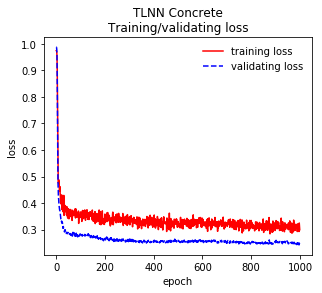

In [14]:
#----------------------------------------
# Summarize history for loss.

plt.figure('TLNN Concrete loss', figsize = (4.8, 4.0))
plt.plot(history.history['loss'], "r-")
plt.plot(history.history['val_loss'], "b--")
plt.title('TLNN Concrete' + '\n' + 'Training/validating loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validating loss'], loc = "best", frameon = False)
plt.show()


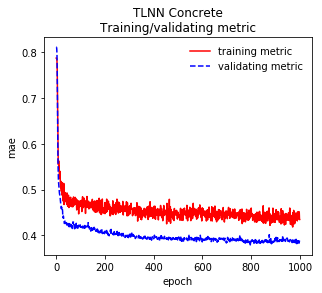

In [15]:
#----------------------------------------
# Summarize history for metric.

plt.figure('TLNN Concrete metric', figsize = (4.8, 4.0))
plt.plot(history.history['mean_absolute_error'], "r-")
plt.plot(history.history['val_mean_absolute_error'], "b--")
plt.title('TLNN Concrete' + '\n' + 'Training/validating metric')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['training metric', 'validating metric'], loc = "best", frameon = False)
plt.show()


In [16]:
#----------------------------------------
# Plot the observed and fitted response values.

fitted = model.predict([X1_train, X2_train, X3_train, X4_train, X5_train, X6_train, X7_train])  # Here, this is used to compute fitted response values.
fitted = fitted[:, 0]

print(fitted.shape)
print(Y_train.shape)

all = np.concatenate((Y_train, fitted))
draw_min = np.floor(np.min(all))
draw_max = np.ceil(np.max(all))


(1030,)
(1030,)


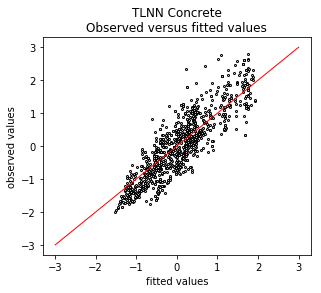

In [17]:
plt.figure('TLNN Concrete', figsize = (4.8, 4.0))
plt.plot(fitted, Y_train, "wo", markersize = 2, markeredgecolor = "black")
plt.plot([draw_min, draw_max], [draw_min, draw_max], '-', linewidth = 1, color = 'red')
plt.title('TLNN Concrete' + '\n' + 'Observed versus fitted values')
plt.ylabel('observed values')
plt.xlabel('fitted values')
plt.show()
